In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Cases in U.S.

### Extract Files 

In [2]:
confirmed = pd.read_csv('files/time_series_covid19_confirmed_US.csv')
death = pd.read_csv('files/time_series_covid19_deaths_US.csv')

In [3]:
confirmed

UID iso2 iso3  code3     FIPS          Admin2  \
0           16   AS  ASM     16     60.0             NaN   
1          316   GU  GUM    316     66.0             NaN   
2          580   MP  MNP    580     69.0             NaN   
3     63072001   PR  PRI    630  72001.0        Adjuntas   
4     63072003   PR  PRI    630  72003.0          Aguada   
...        ...  ...  ...    ...      ...             ...   
3335  84070016   US  USA    840      NaN    Central Utah   
3336  84070017   US  USA    840      NaN  Southeast Utah   
3337  84070018   US  USA    840      NaN  Southwest Utah   
3338  84070019   US  USA    840      NaN       TriCounty   
3339  84070020   US  USA    840      NaN    Weber-Morgan   

                Province_State Country_Region        Lat       Long_  ...  \
0               American Samoa             US -14.271000 -170.132000  ...   
1                         Guam             US  13.444300  144.793700  ...   
2     Northern Mariana Islands             US  15.097900  145.673900  ...   
3                  Puerto Rico             US  18.180117  -66.754367  ...   
4                  Puerto Rico             US  18.360255  -67.175131  ...   
...                        ...            ...        ...         ...  ...   
3335                      Utah             US  39.372319 -111.575868  ...   
3336                      Utah             US  38.996171 -110.701396  ...   
3337                      Utah             US  37.854472 -111.441876  ...   
3338                      Utah             US  40.124915 -109.517442  ...   
3339                      Utah             US  41.271160 -111.914512  ...   

     7/19/20  7/20/20  7/21/20  7/22/20  7/23/20  7/24/20  7/25/20  7/26/20  \
0          0        0        0        0        0        0        0        0   
1        314      319      319      330      337      337      337      337   
2         37       38       38       38       38       38       40       40   
3         72       72       72       72       72       73       74       77   
4         70       71       75       78       82       84       89       91   
...      ...      ...      ...      ...      ...      ...      ...      ...   
3335     306      306      309      312      318      328      333      341   
3336      58       60       63       63       67       69       70       70   
3337    2437     2497     2526     2563     2594     2672     2733     2750   
3338     103      109      115      123      128      132      134      137   
3339    2054     2071     2112     2149     2201     2268     2313     2352   

      7/27/20  7/28/20  
0           0        0  
1         349      351  
2          40       40  
3          77       77  
4          92       95  
...       ...      ...  
3335      347      353  
3336       70       71  
3337     2781     2814  
3338      142      144  
3339     2375     2427  

[3340 rows x 200 columns]

### Data Wrangling

In [4]:
dates = [x for x in list(confirmed.columns) if re.search('/',x)]

In [5]:
confirmed_clean = confirmed.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Cases'})
confirmed_clean['Date'] = pd.to_datetime(confirmed_clean['Date'], errors ='coerce')
confirmed_clean.set_index('Date',inplace = True)
confirmed_clean

County            Province_State Country_Region  \
Date                                                                  
2020-01-22             NaN            American Samoa             US   
2020-01-22             NaN                      Guam             US   
2020-01-22             NaN  Northern Mariana Islands             US   
2020-01-22        Adjuntas               Puerto Rico             US   
2020-01-22          Aguada               Puerto Rico             US   
...                    ...                       ...            ...   
2020-07-28    Central Utah                      Utah             US   
2020-07-28  Southeast Utah                      Utah             US   
2020-07-28  Southwest Utah                      Utah             US   
2020-07-28       TriCounty                      Utah             US   
2020-07-28    Weber-Morgan                      Utah             US   

                  Lat       Long_                  Combined_Key  Total Cases  
Date                                                                          
2020-01-22 -14.271000 -170.132000            American Samoa, US            0  
2020-01-22  13.444300  144.793700                      Guam, US            0  
2020-01-22  15.097900  145.673900  Northern Mariana Islands, US            0  
2020-01-22  18.180117  -66.754367     Adjuntas, Puerto Rico, US            0  
2020-01-22  18.360255  -67.175131       Aguada, Puerto Rico, US            0  
...               ...         ...                           ...          ...  
2020-07-28  39.372319 -111.575868        Central Utah, Utah, US          353  
2020-07-28  38.996171 -110.701396      Southeast Utah, Utah, US           71  
2020-07-28  37.854472 -111.441876      Southwest Utah, Utah, US         2814  
2020-07-28  40.124915 -109.517442           TriCounty, Utah, US          144  
2020-07-28  41.271160 -111.914512        Weber-Morgan, Utah, US         2427  

[631260 rows x 7 columns]

In [6]:
death_clean = death.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Death'})
death_clean['Date'] = pd.to_datetime(death_clean['Date'])
death_clean.set_index('Date',inplace = True)
death_clean

County            Province_State Country_Region  \
Date                                                                  
2020-01-22             NaN            American Samoa             US   
2020-01-22             NaN                      Guam             US   
2020-01-22             NaN  Northern Mariana Islands             US   
2020-01-22        Adjuntas               Puerto Rico             US   
2020-01-22          Aguada               Puerto Rico             US   
...                    ...                       ...            ...   
2020-07-28    Central Utah                      Utah             US   
2020-07-28  Southeast Utah                      Utah             US   
2020-07-28  Southwest Utah                      Utah             US   
2020-07-28       TriCounty                      Utah             US   
2020-07-28    Weber-Morgan                      Utah             US   

                  Lat       Long_                  Combined_Key  Total Death  
Date                                                                          
2020-01-22 -14.271000 -170.132000            American Samoa, US            0  
2020-01-22  13.444300  144.793700                      Guam, US            0  
2020-01-22  15.097900  145.673900  Northern Mariana Islands, US            0  
2020-01-22  18.180117  -66.754367     Adjuntas, Puerto Rico, US            0  
2020-01-22  18.360255  -67.175131       Aguada, Puerto Rico, US            0  
...               ...         ...                           ...          ...  
2020-07-28  39.372319 -111.575868        Central Utah, Utah, US            1  
2020-07-28  38.996171 -110.701396      Southeast Utah, Utah, US            0  
2020-07-28  37.854472 -111.441876      Southwest Utah, Utah, US           24  
2020-07-28  40.124915 -109.517442           TriCounty, Utah, US            0  
2020-07-28  41.271160 -111.914512        Weber-Morgan, Utah, US           24  

[631260 rows x 7 columns]

In [7]:
states = list(confirmed_clean['Province_State'].unique())

In [8]:
data = {}

for state in states:
    
    ### New cases
    state_new = confirmed_clean.loc[confirmed_clean['Province_State'] == state]
    state_new_agg = state_new.groupby('Date')[['Total Cases']].sum().reset_index()
    state_new_agg['New Cases'] = [state_new_agg['Total Cases'][0]] + \
                 [y-x if y>x else 0 for x,y in zip(state_new_agg['Total Cases'][:-1],state_new_agg['Total Cases'][1:])]
    state_new_agg.set_index('Date',inplace = True)
    
    ### Death
    state_death = death_clean.loc[death_clean['Province_State']== state]
    state_death_agg = state_death.groupby('Date')[['Total Death']].sum().reset_index()
    state_death_agg['New Death'] =[state_death_agg['Total Death'][0]]+ \
                   [y-x if y>x else 0 for x,y in zip(state_death_agg['Total Death'][:-1],state_death_agg['Total Death'][1:])]
    state_death_agg.set_index('Date',inplace = True)
    
    data['%s' % state] = state_new_agg.merge(state_death_agg, left_index = True, right_index = True)
    data['%s' % state]['Fatality'] = (data['%s' % state]['Total Death']/data['%s' % state]['Total Cases']*100).fillna(0)
    data['%s' % state]['State'] = state
    data['%s' % state].reset_index(inplace = True)

### Trends of Daily New Cases and Death for Each State

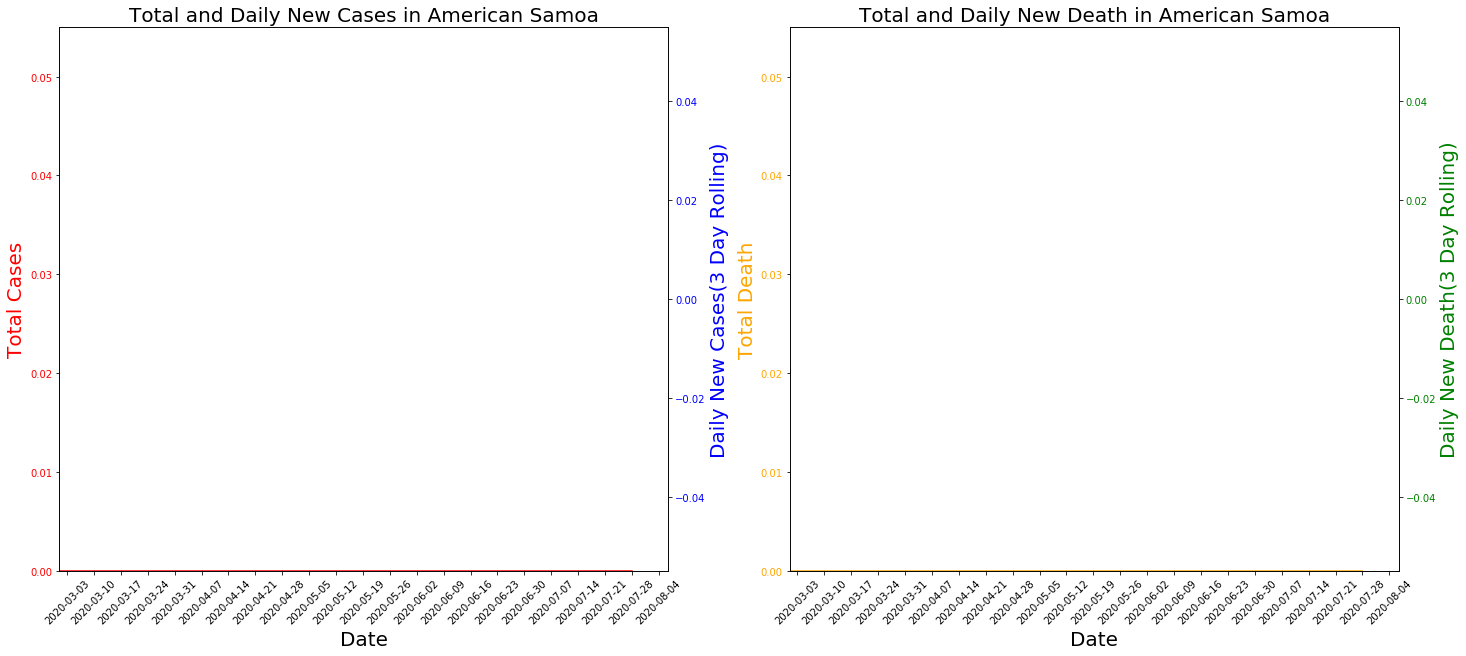

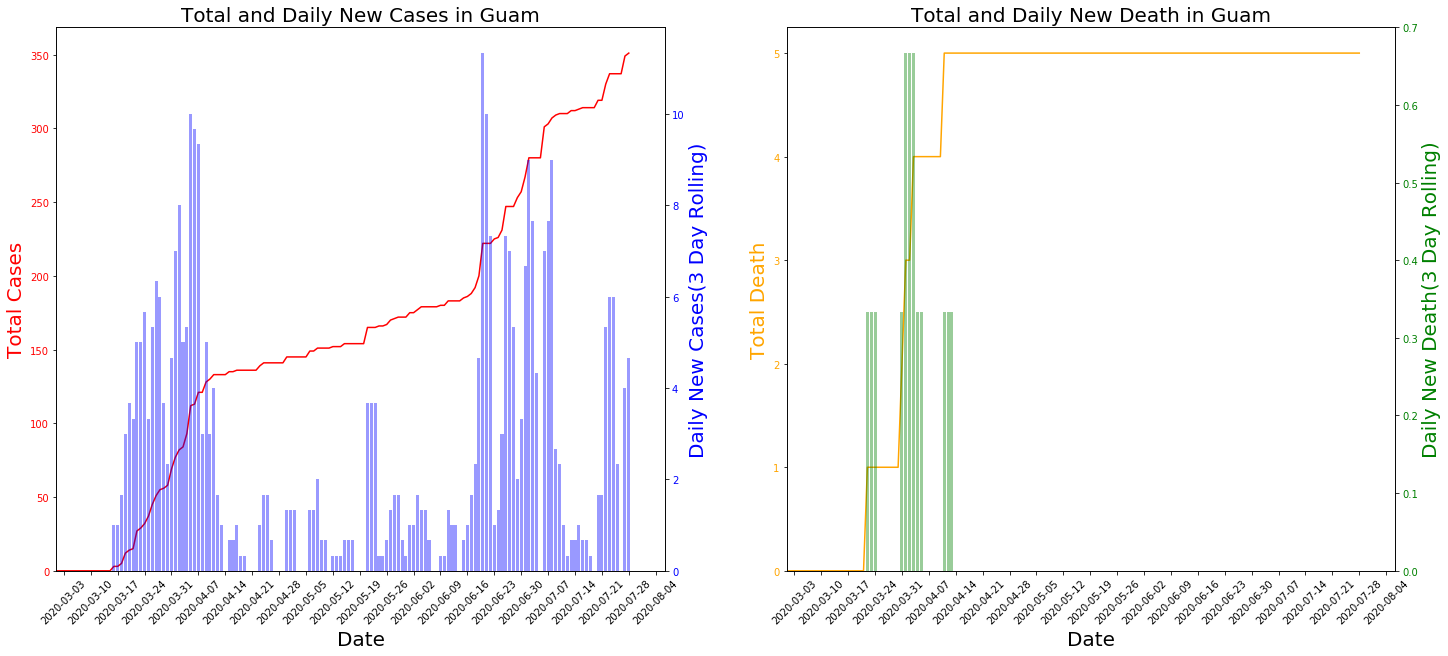

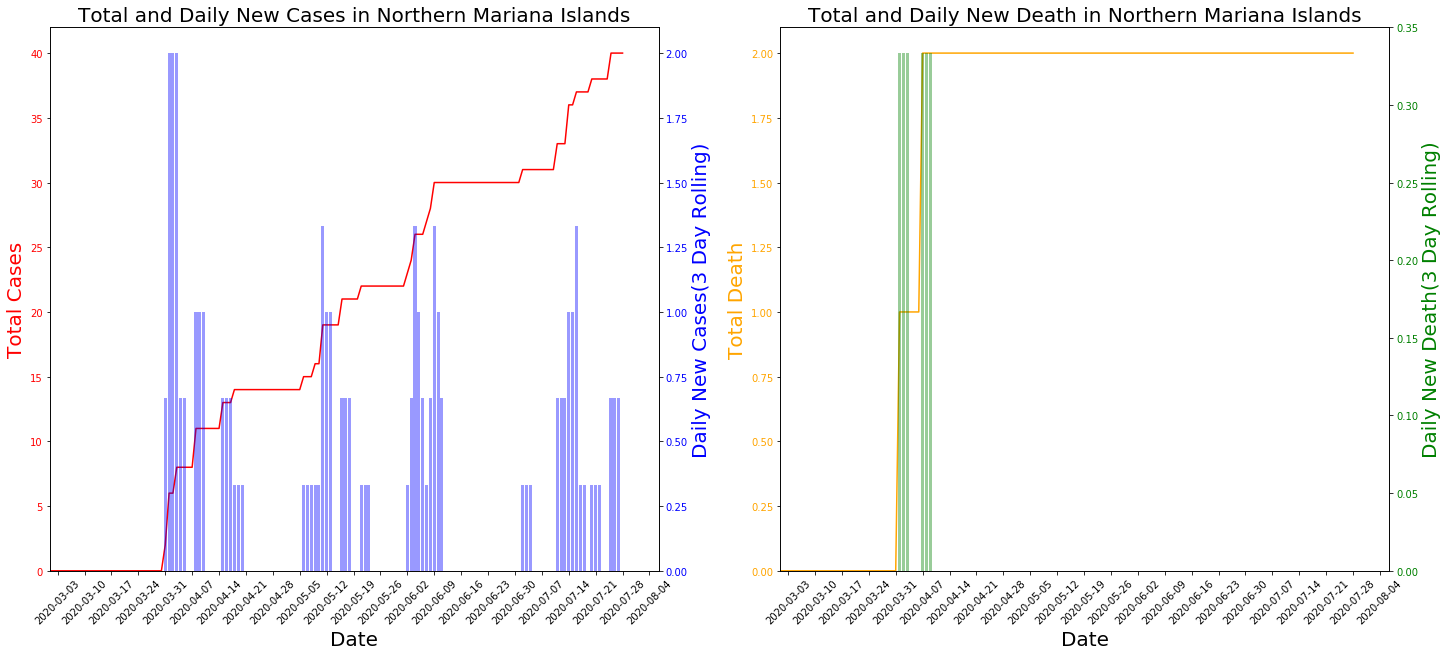

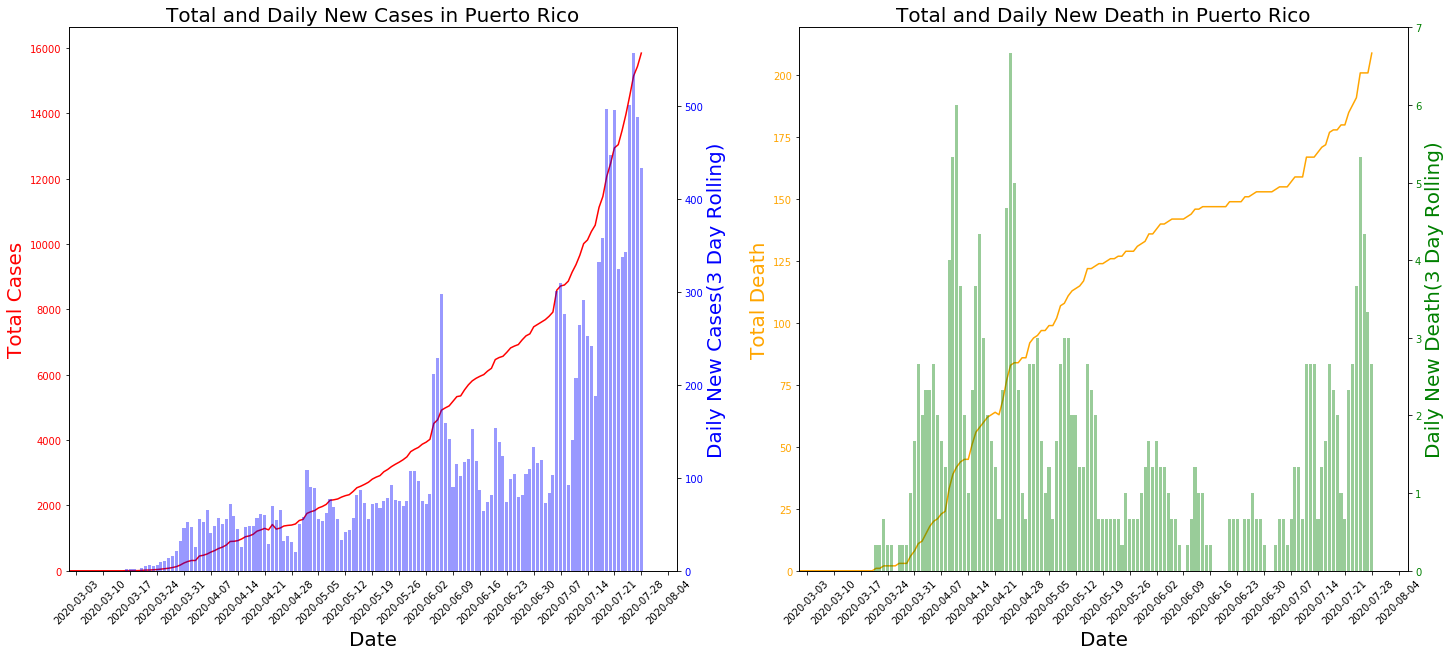

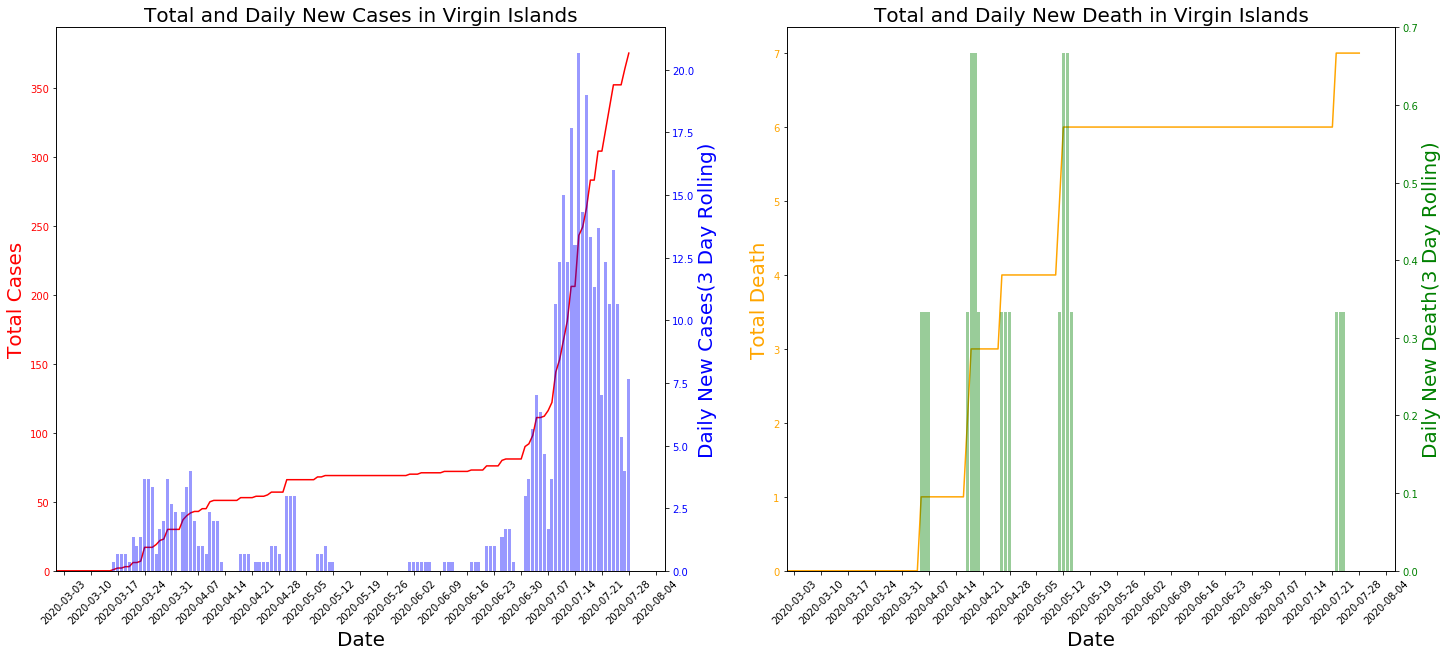

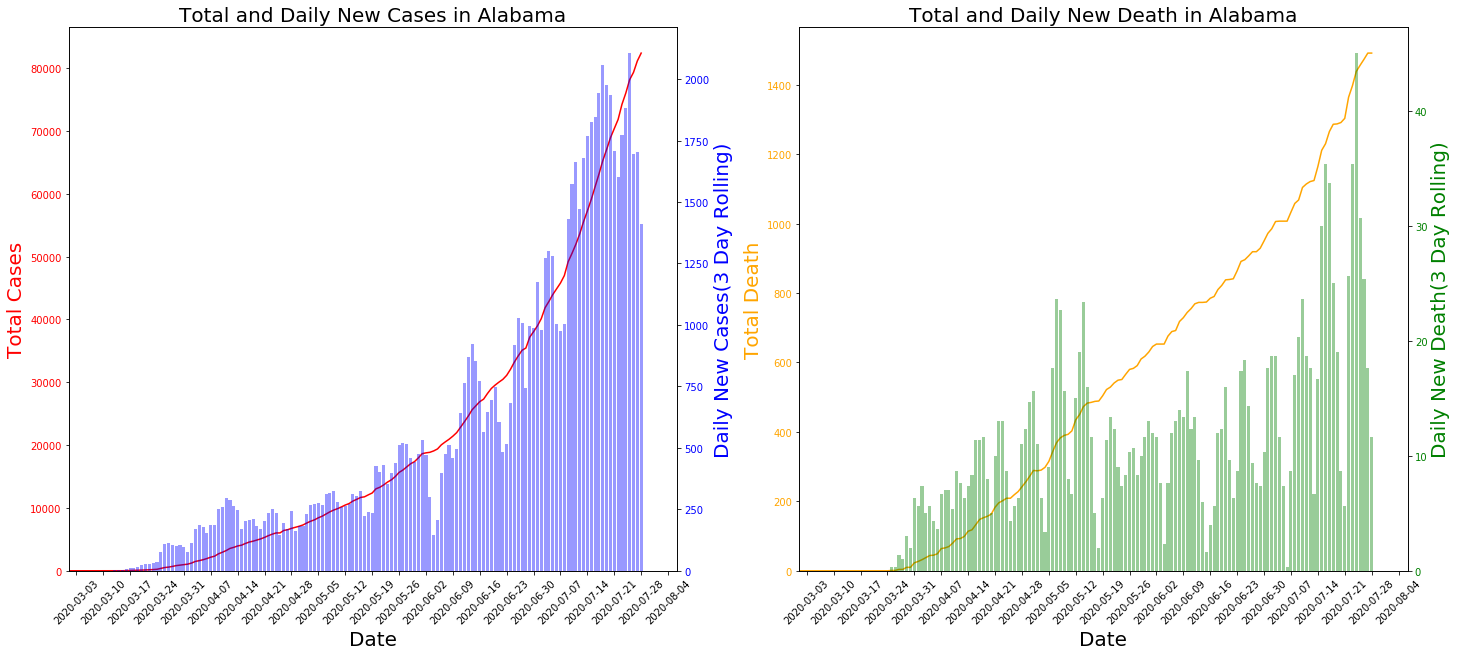

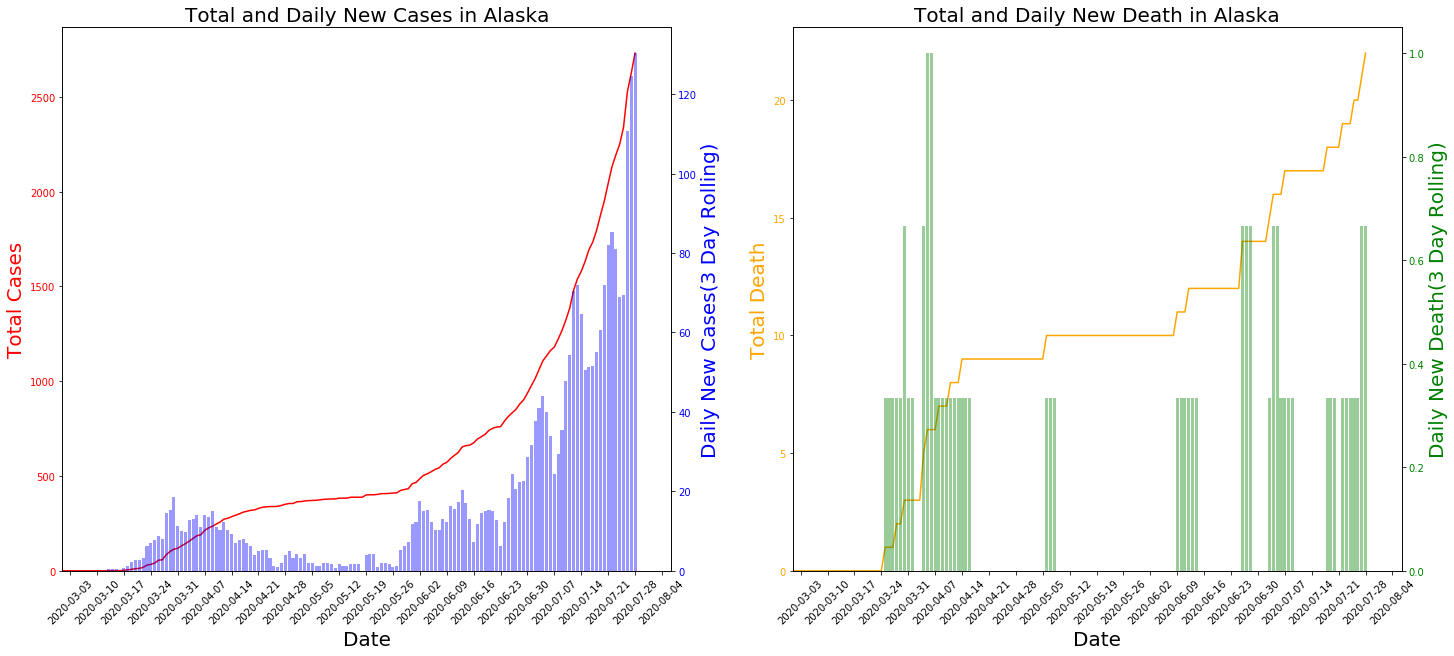

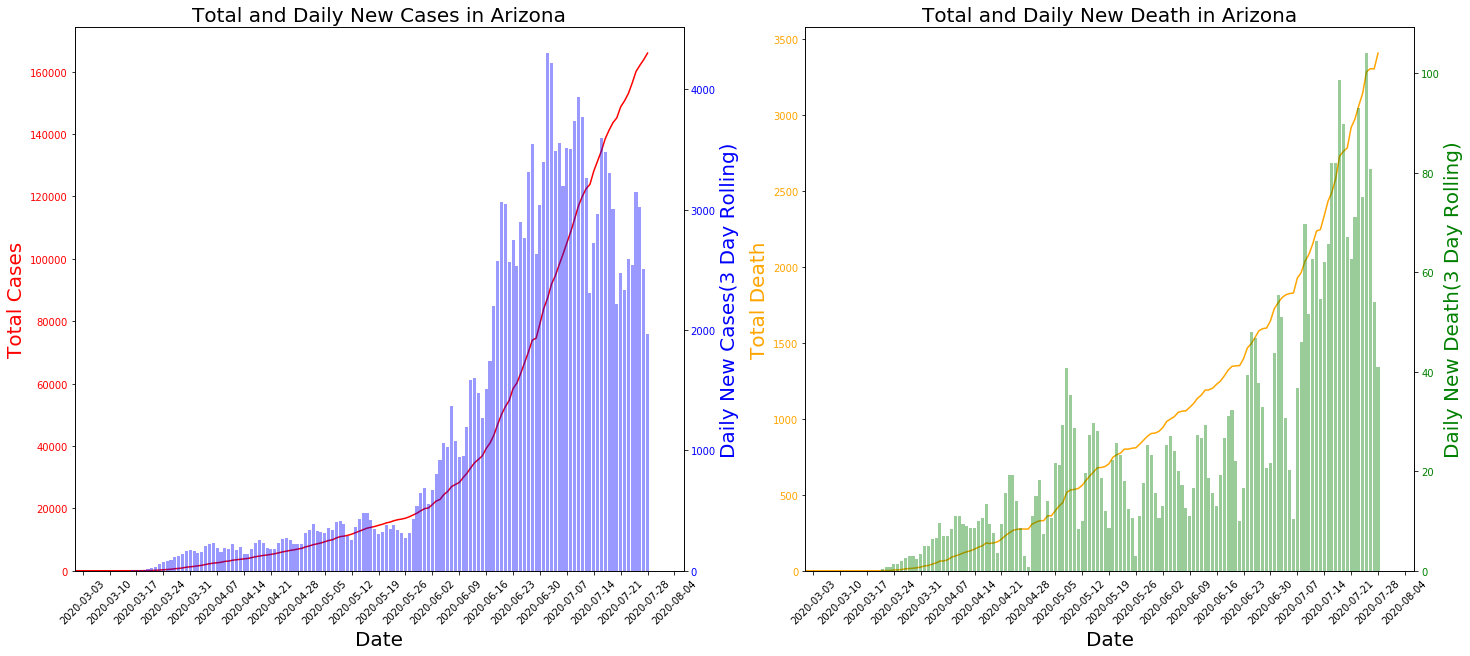

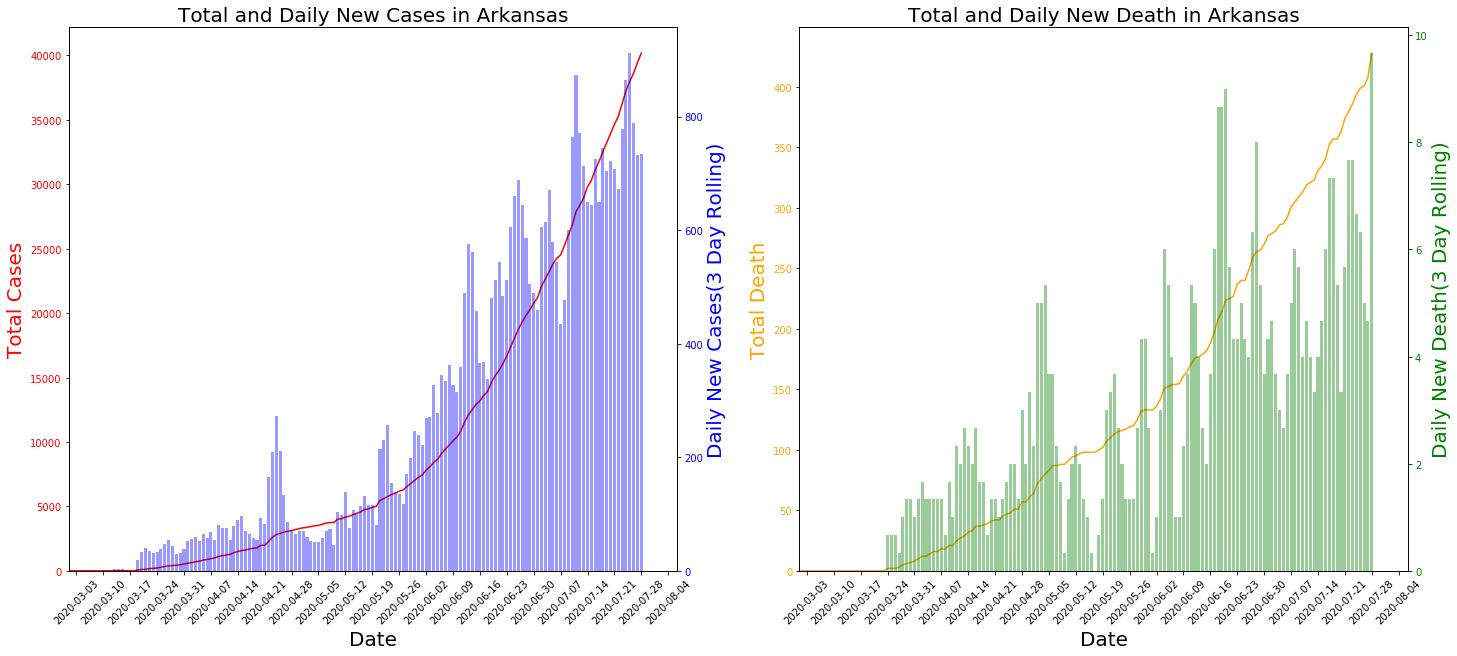

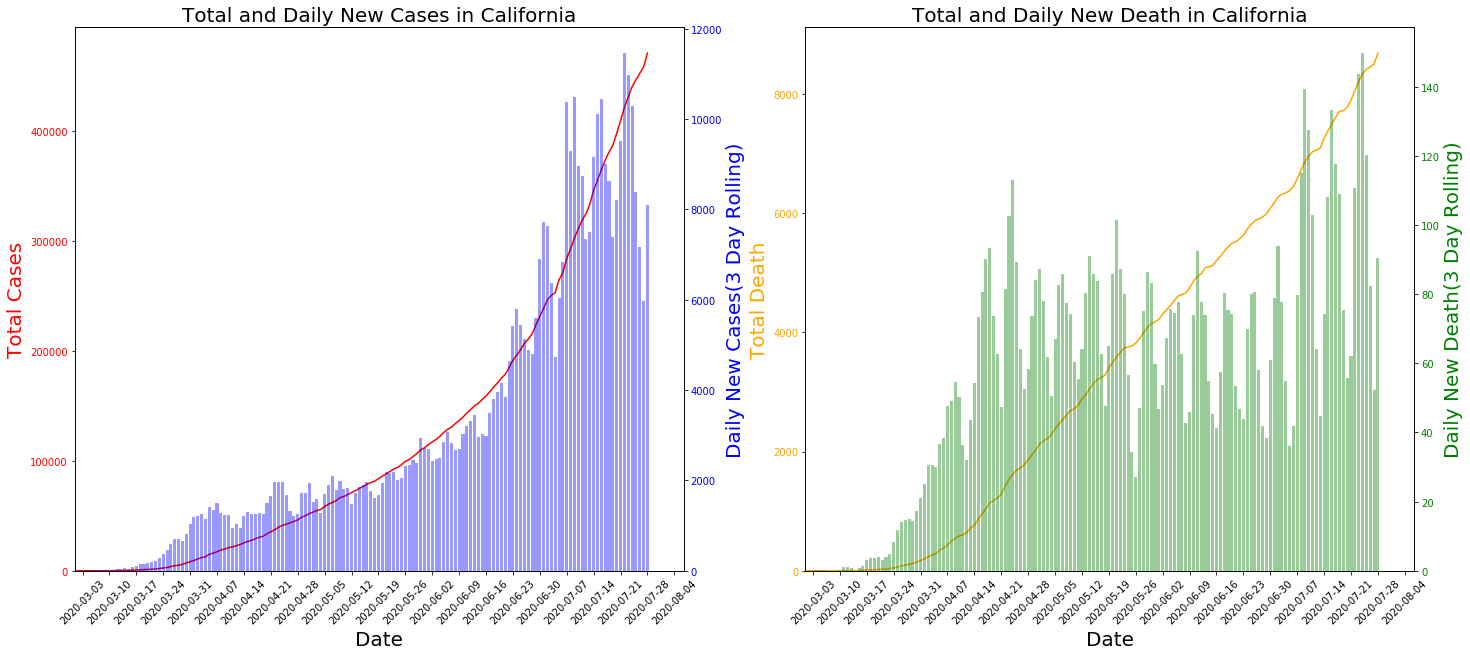

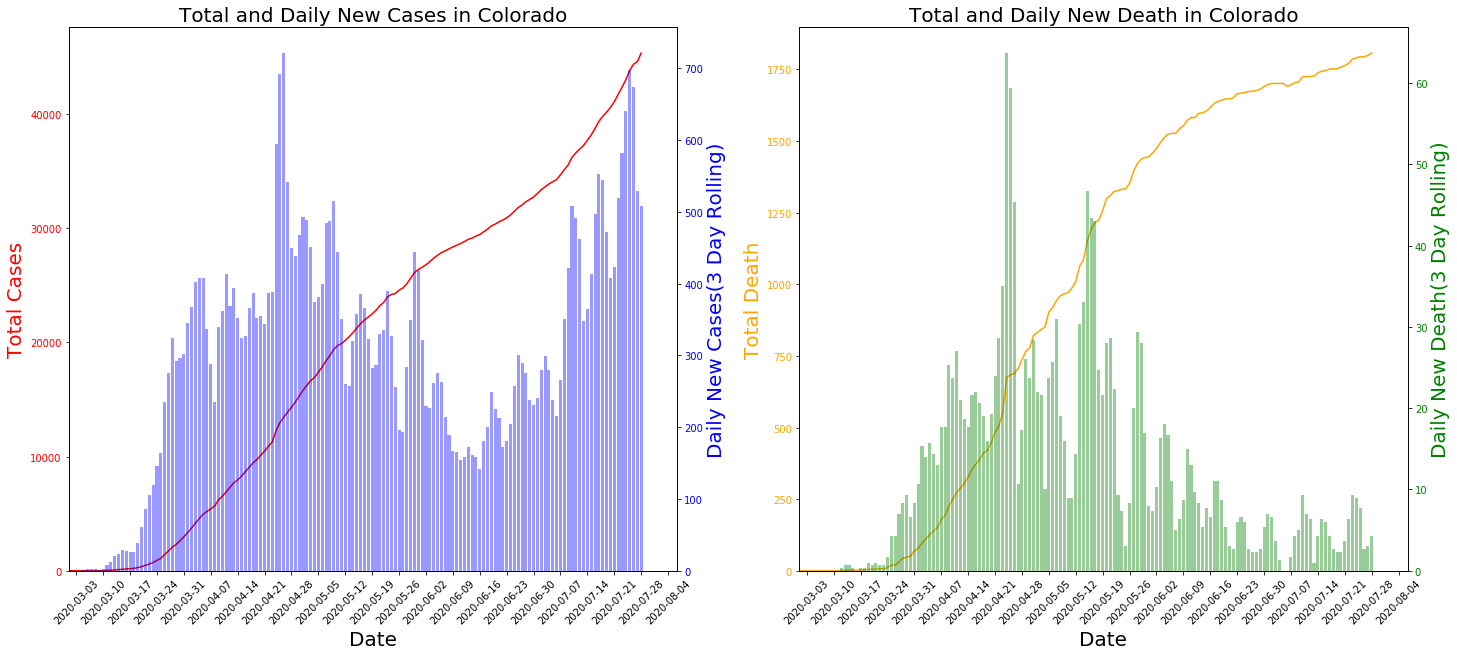

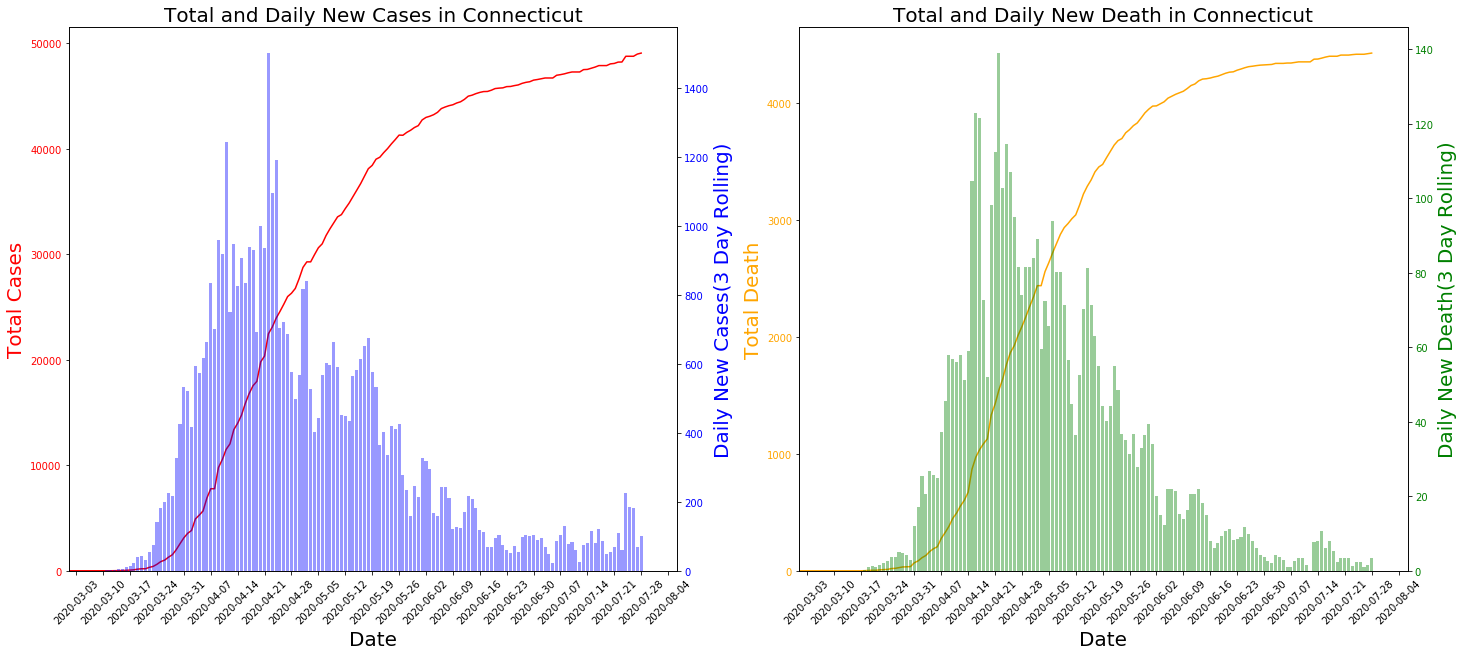

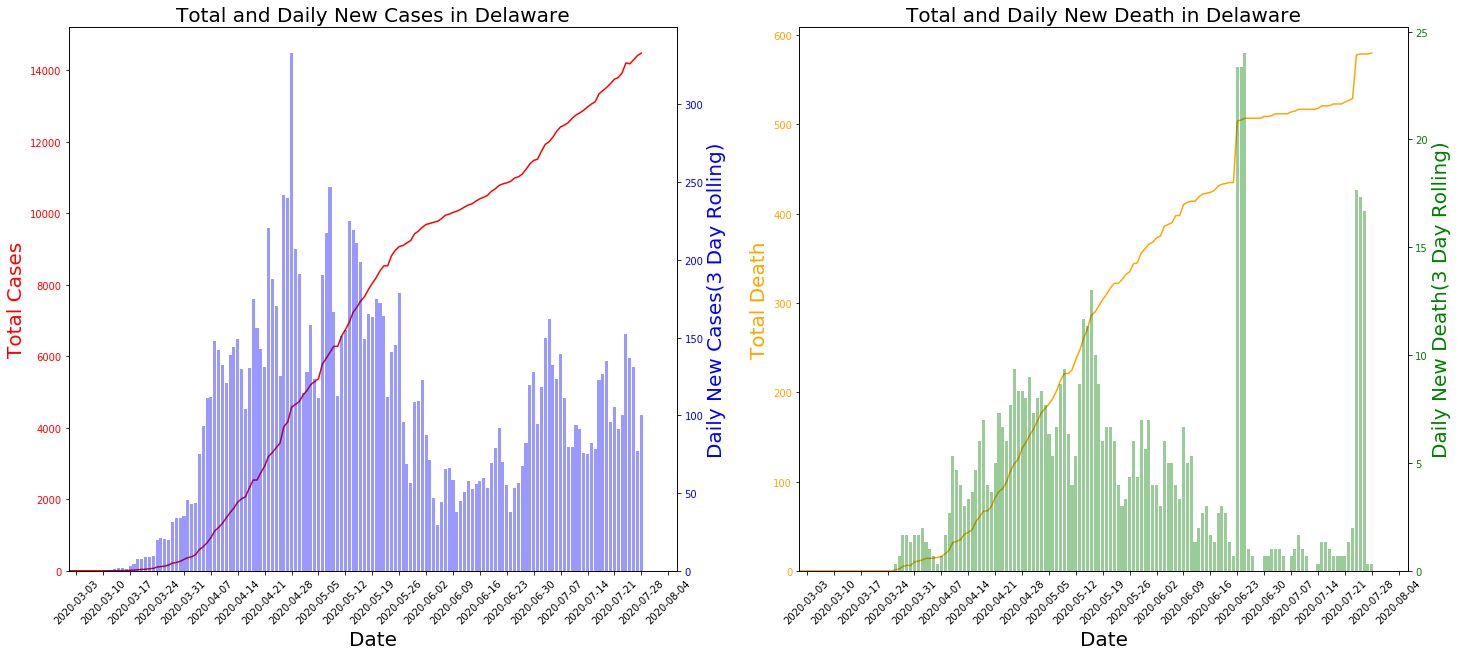

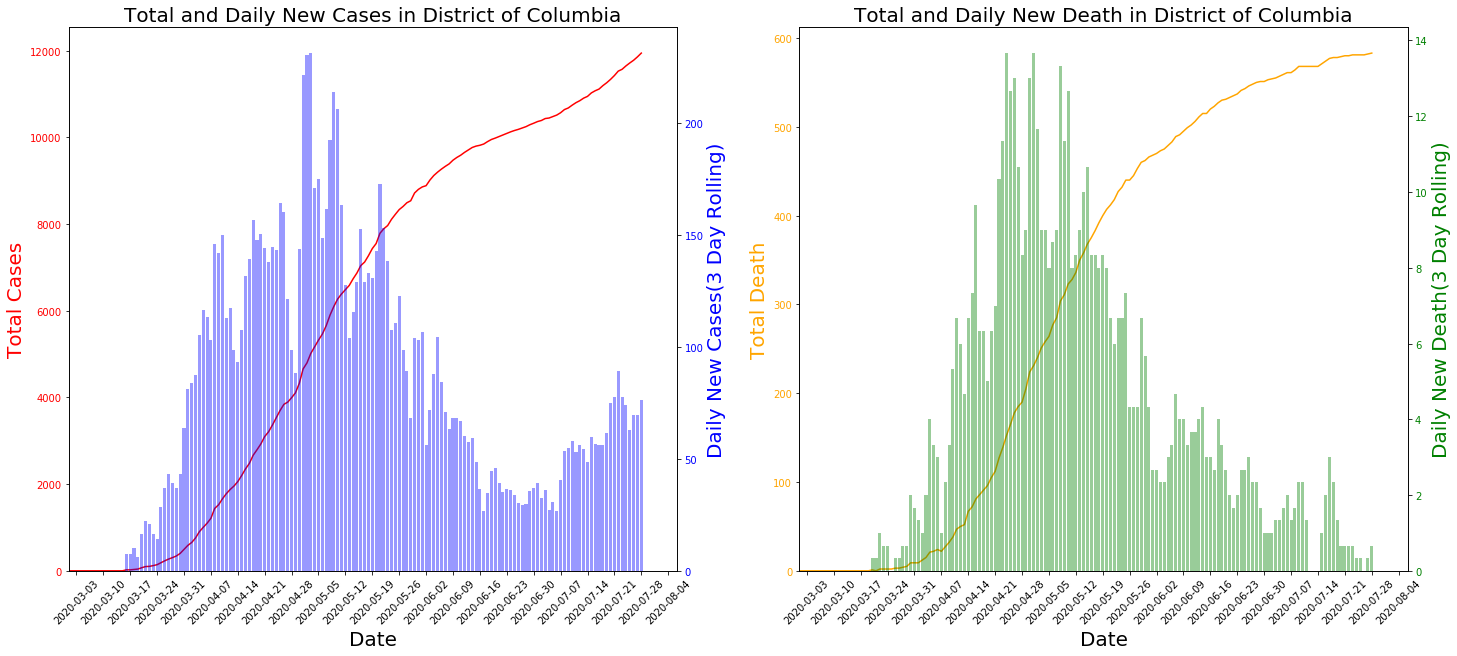

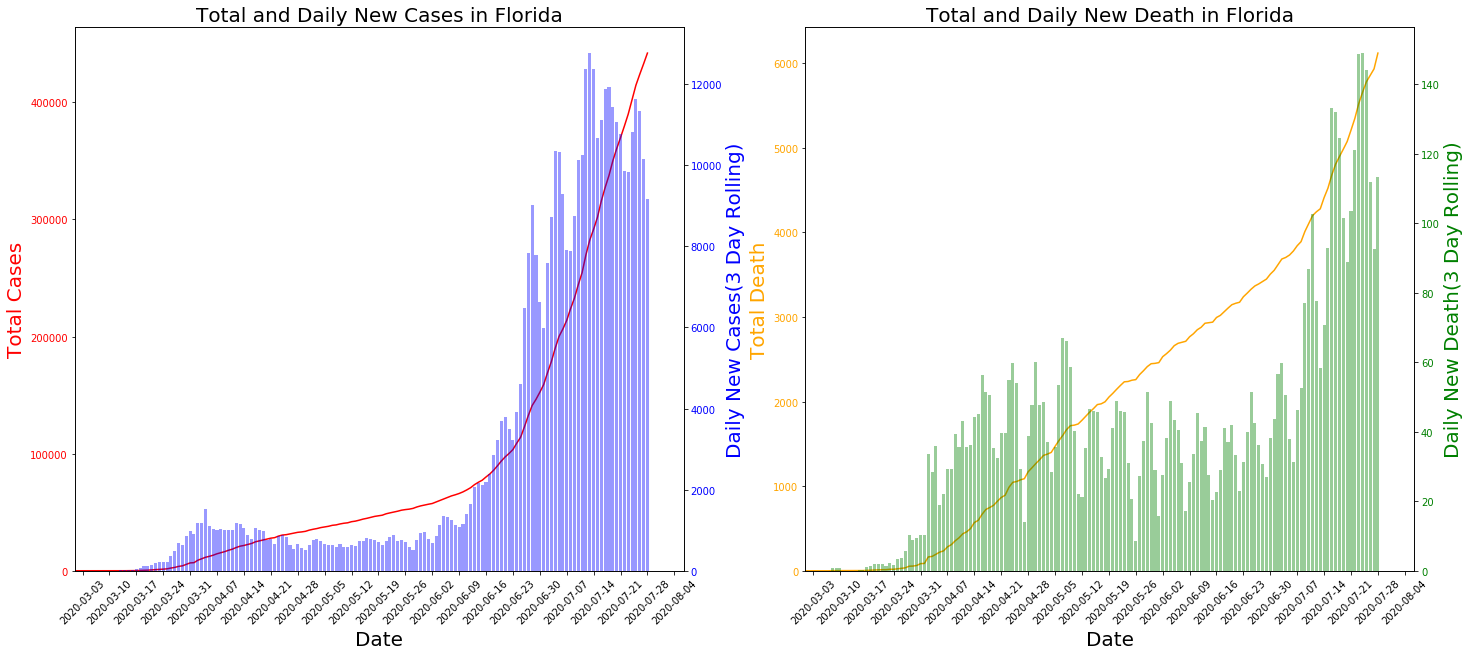

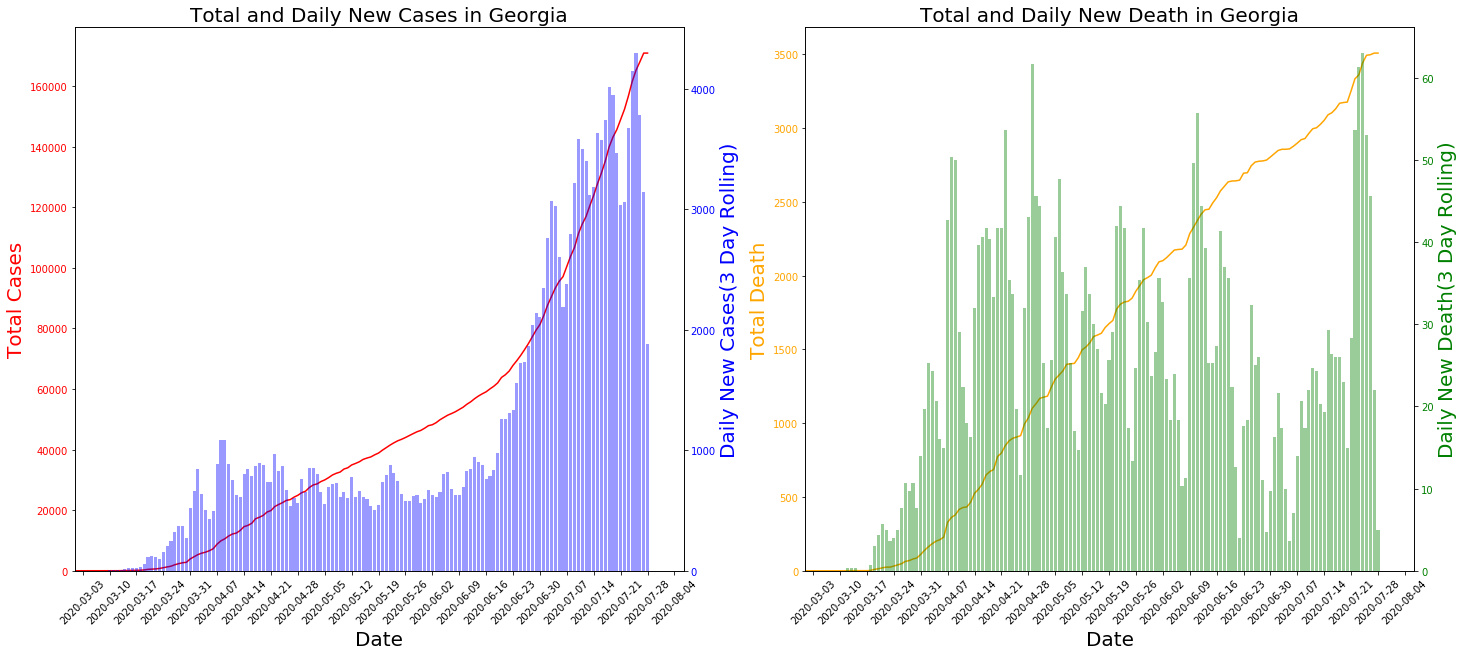

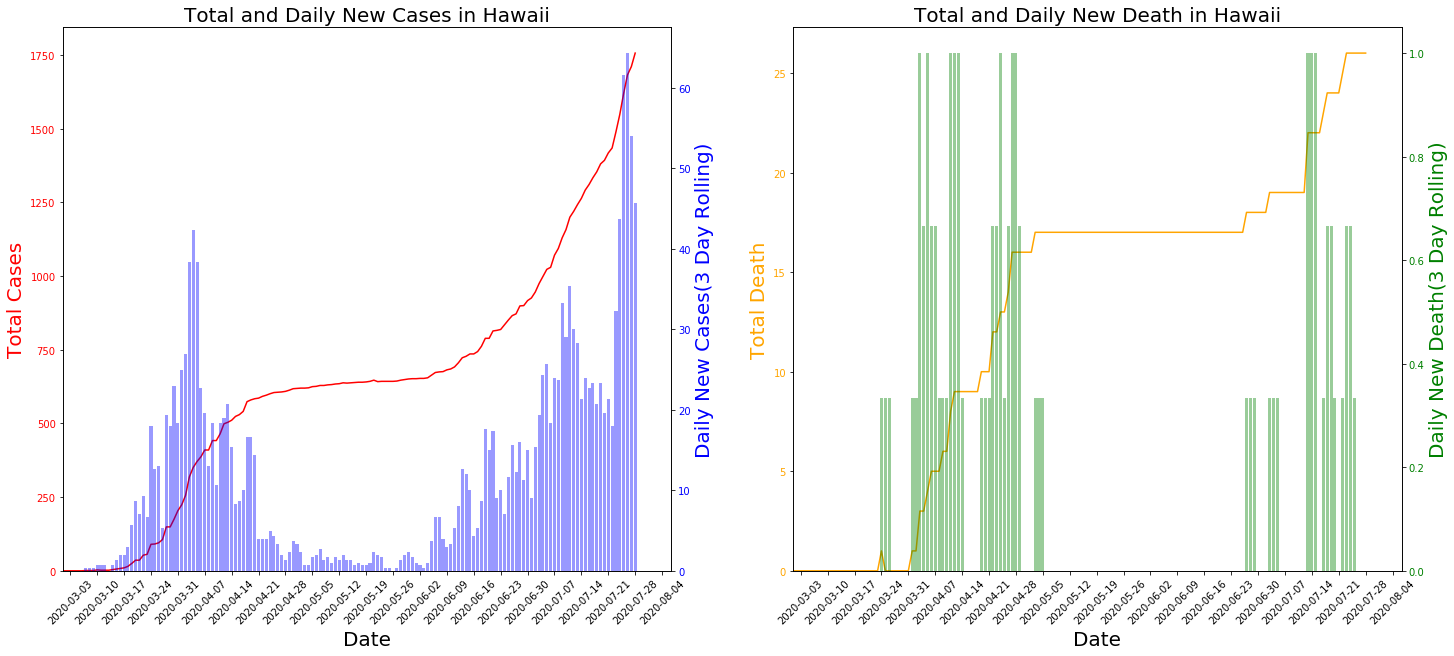

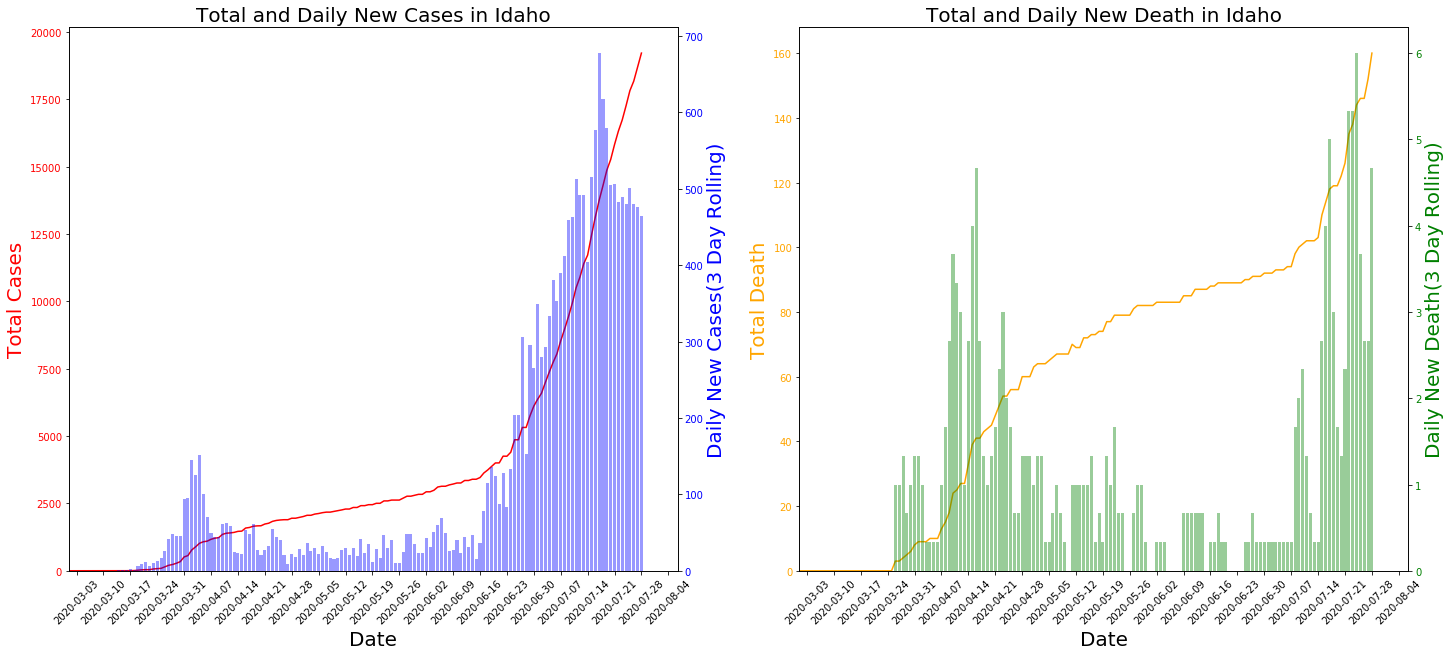

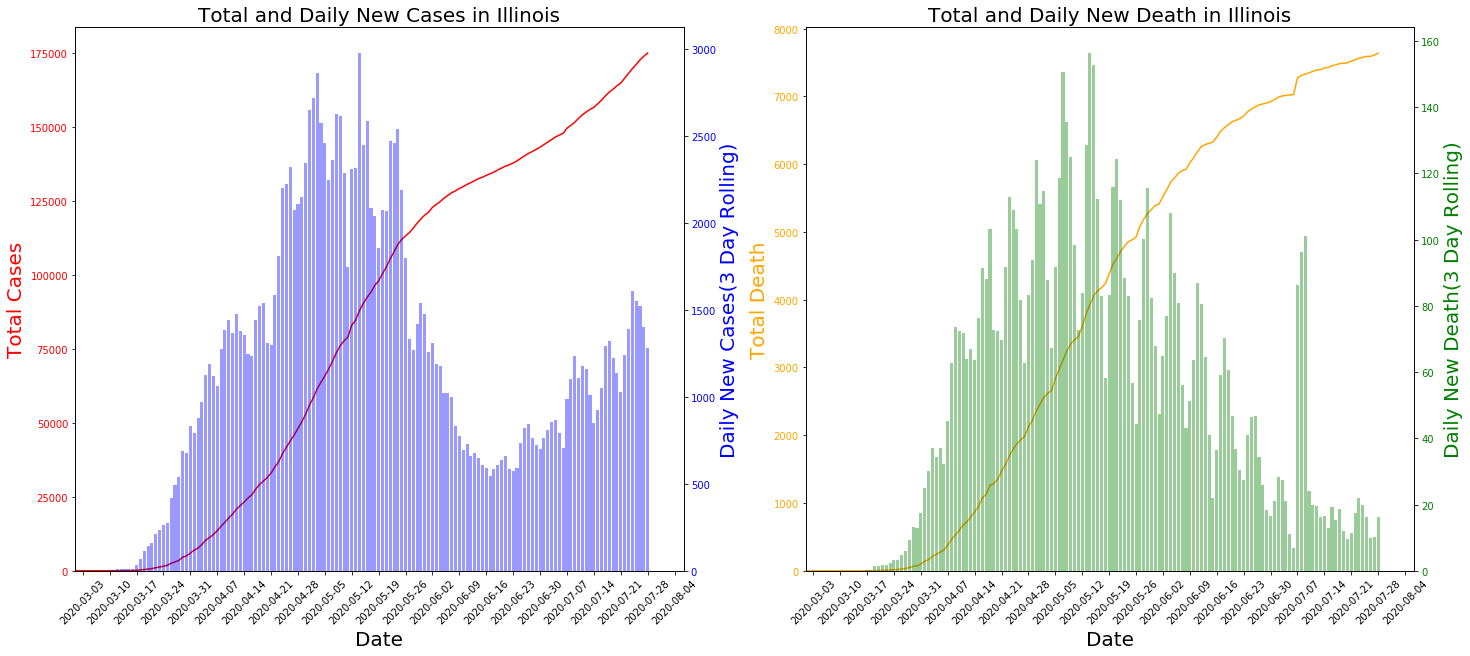

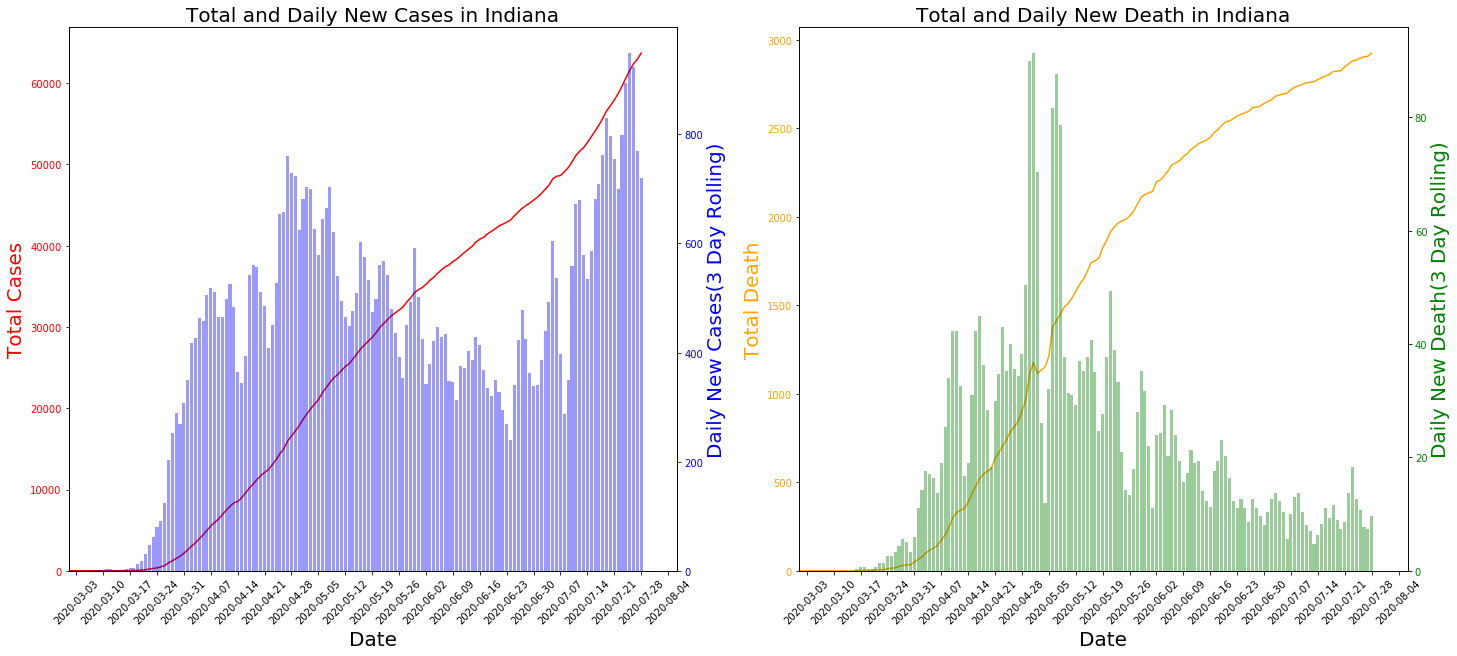

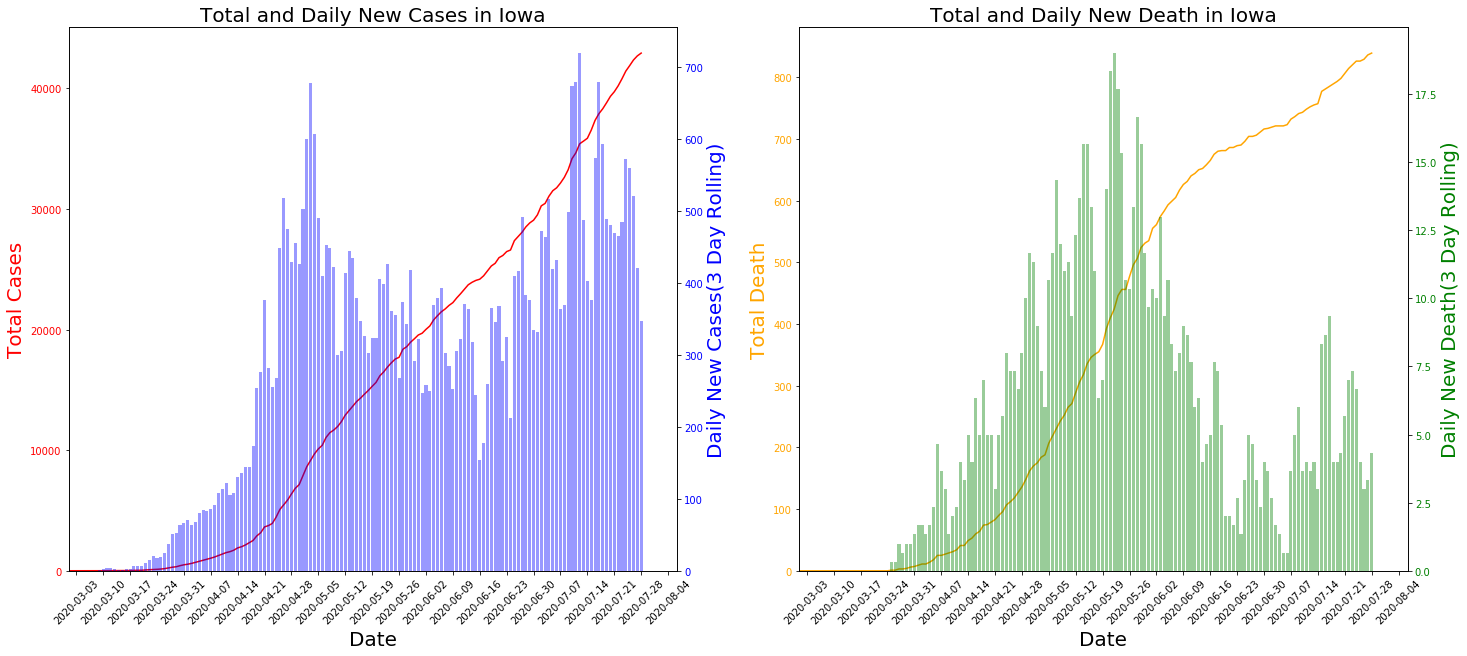

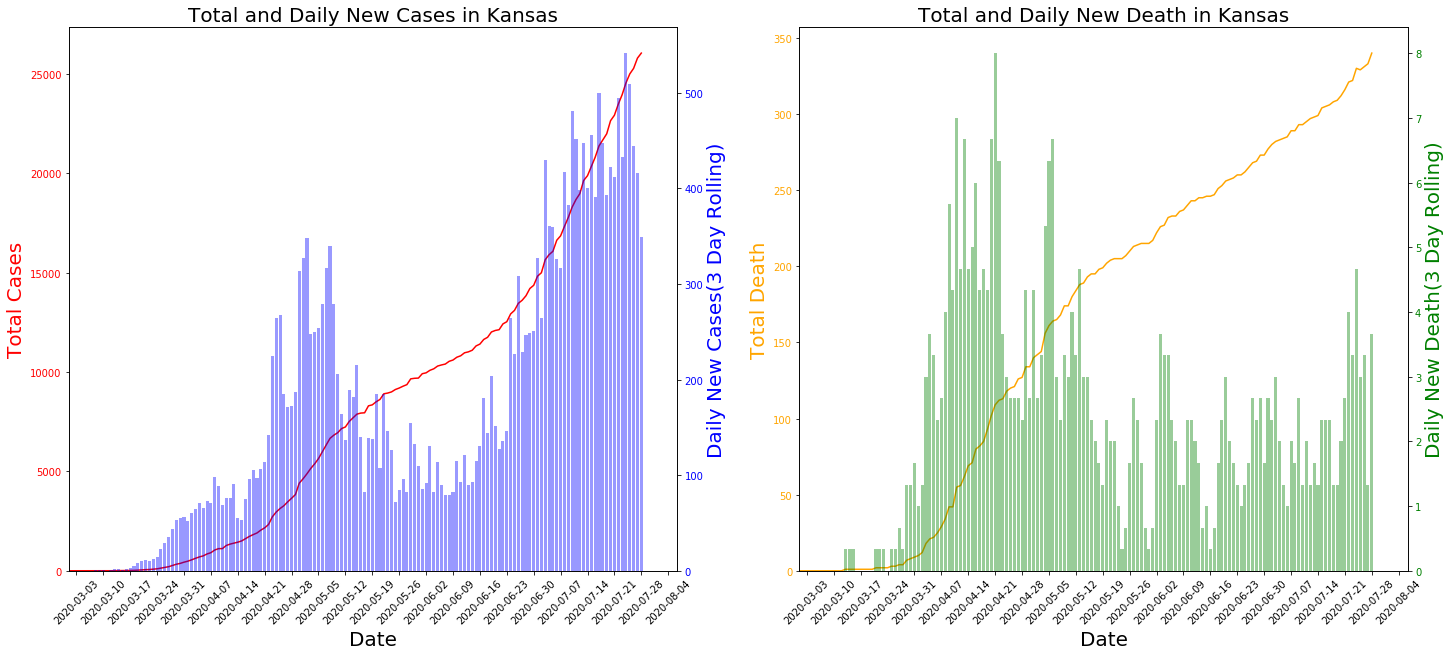

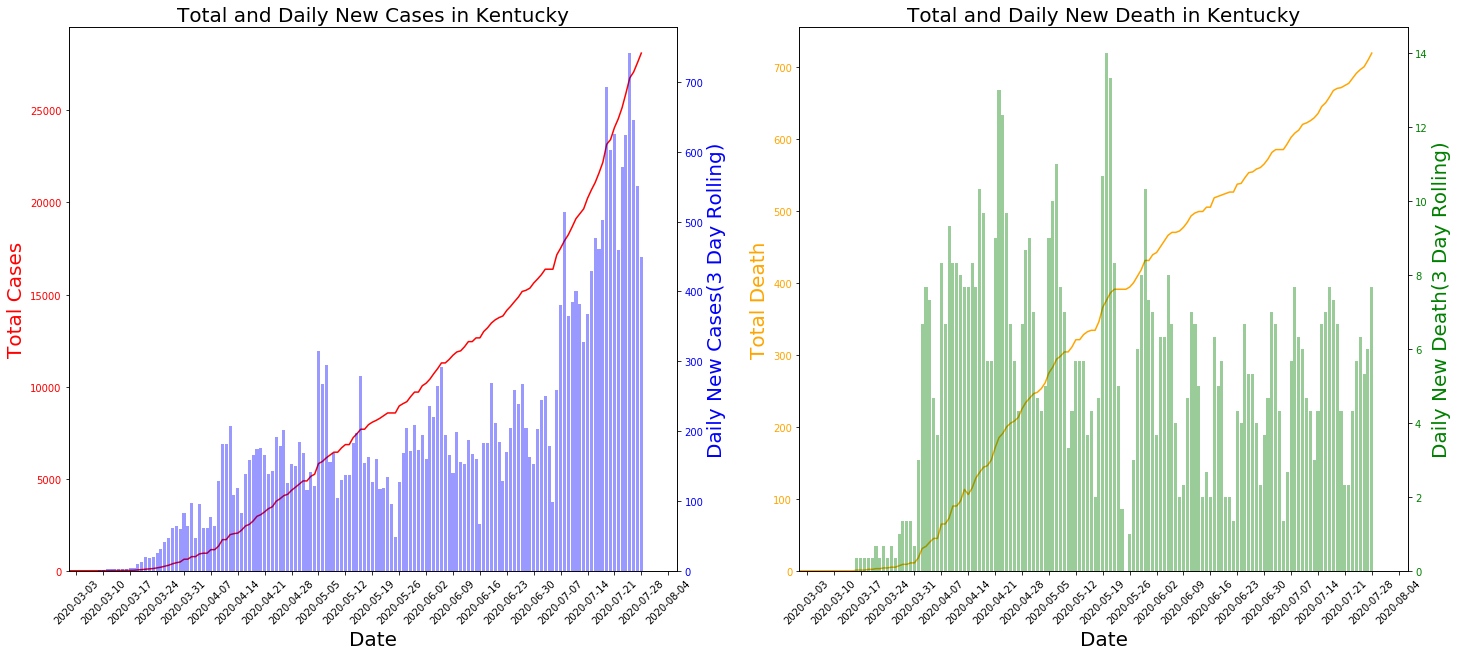

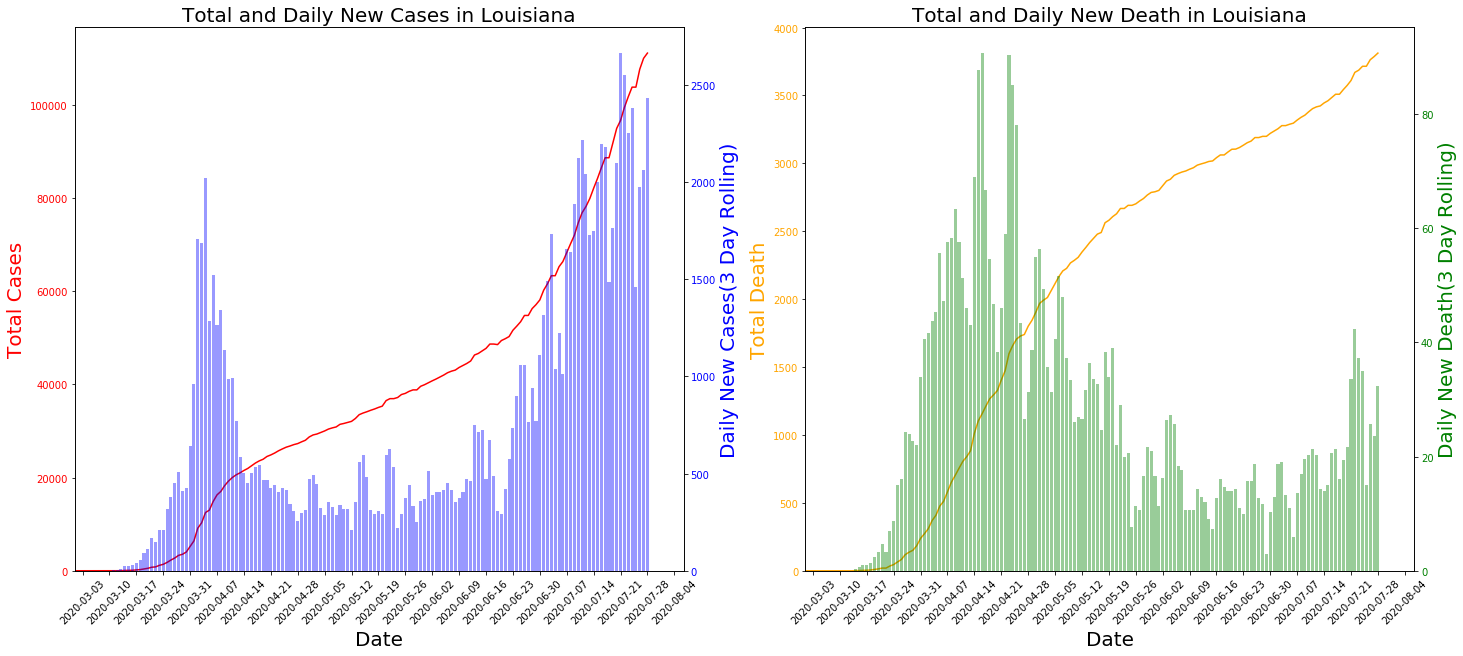

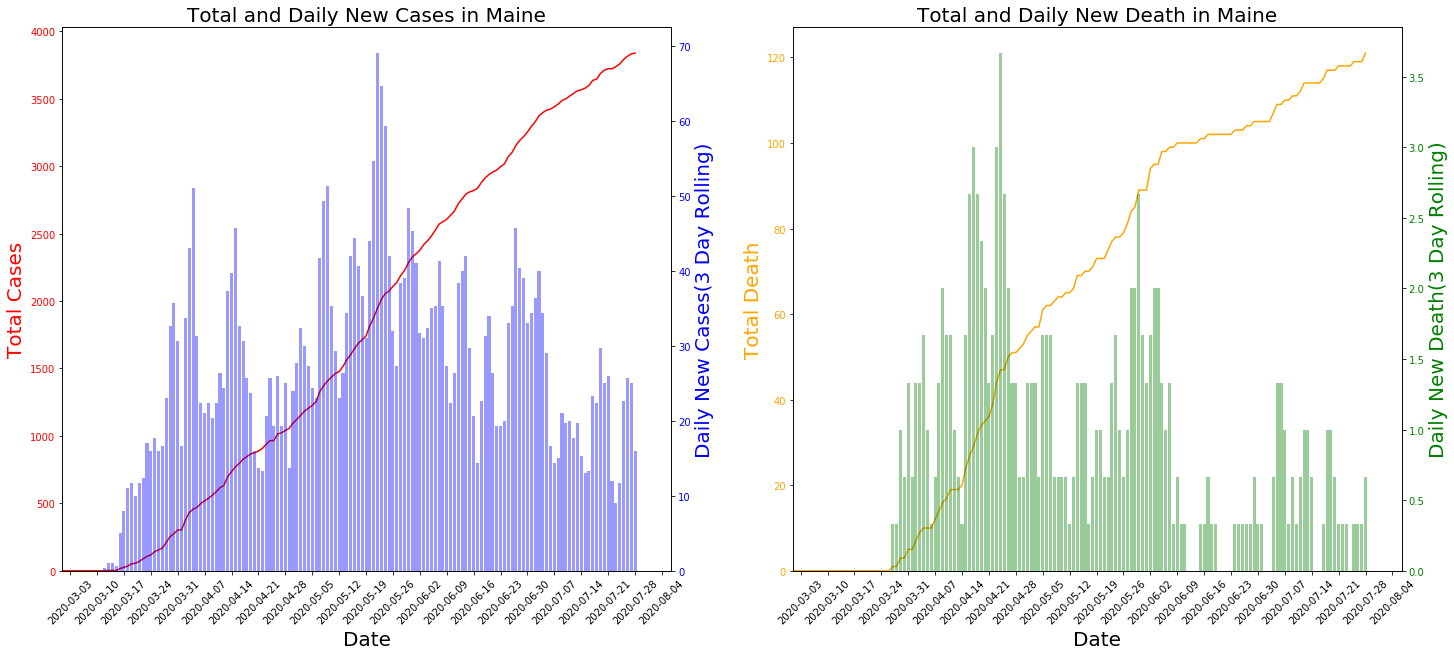

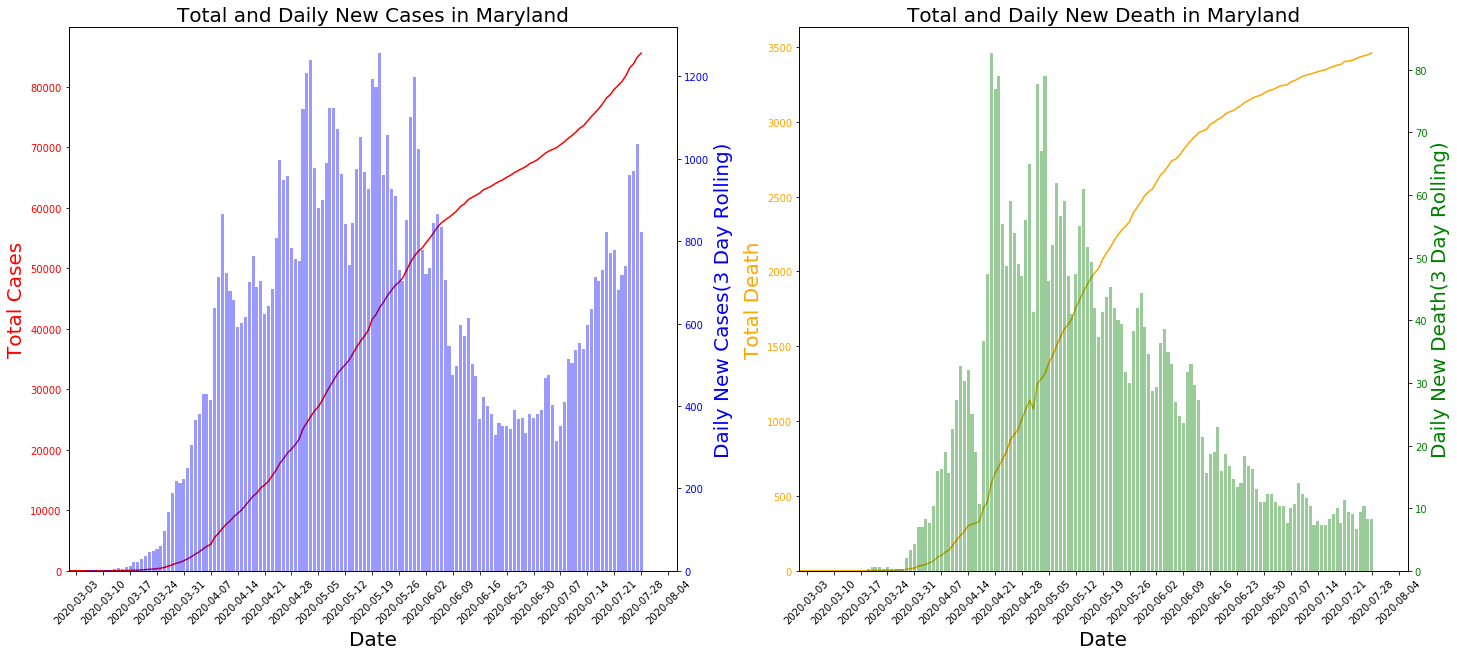

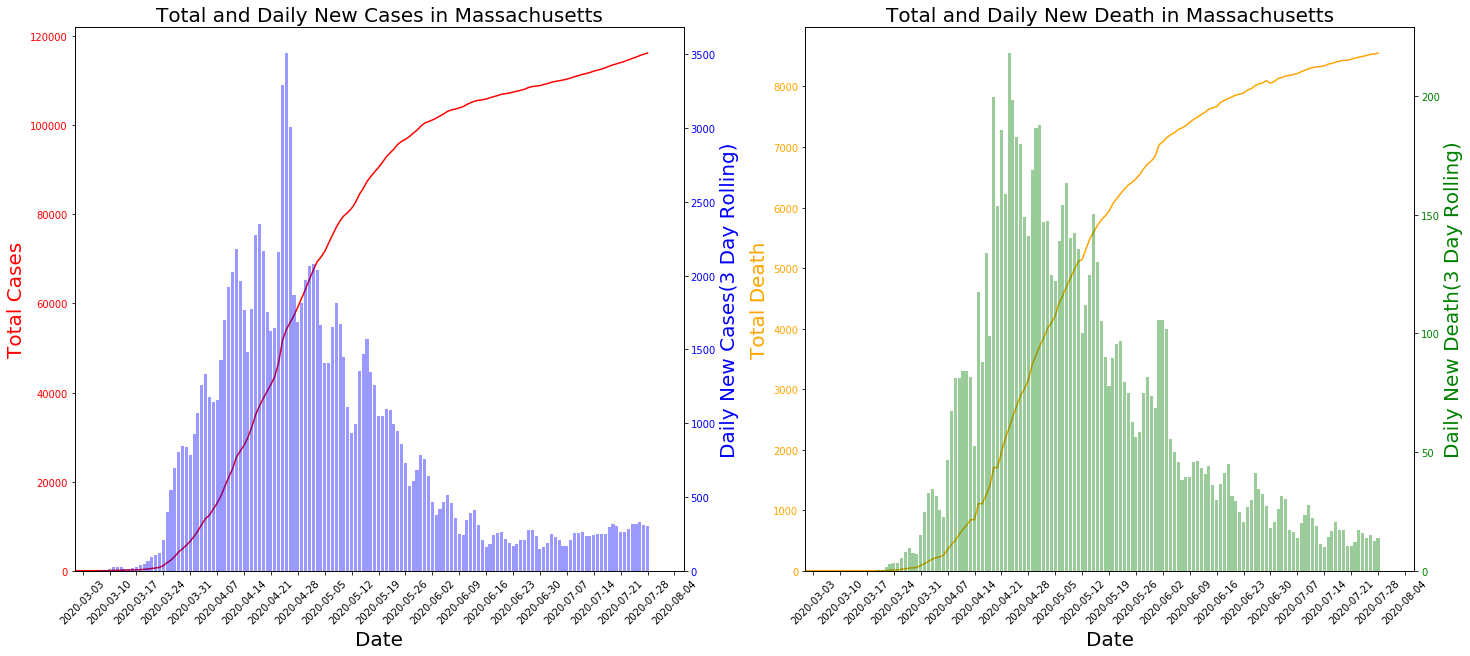

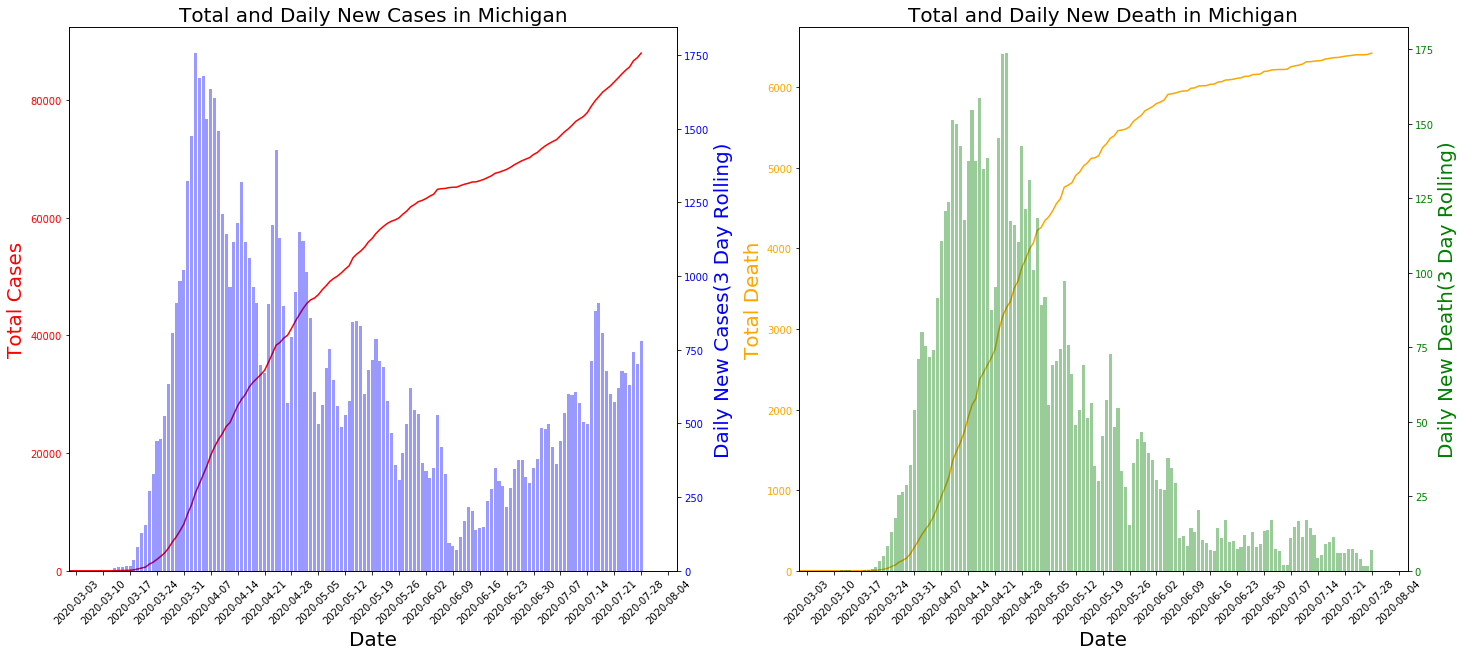

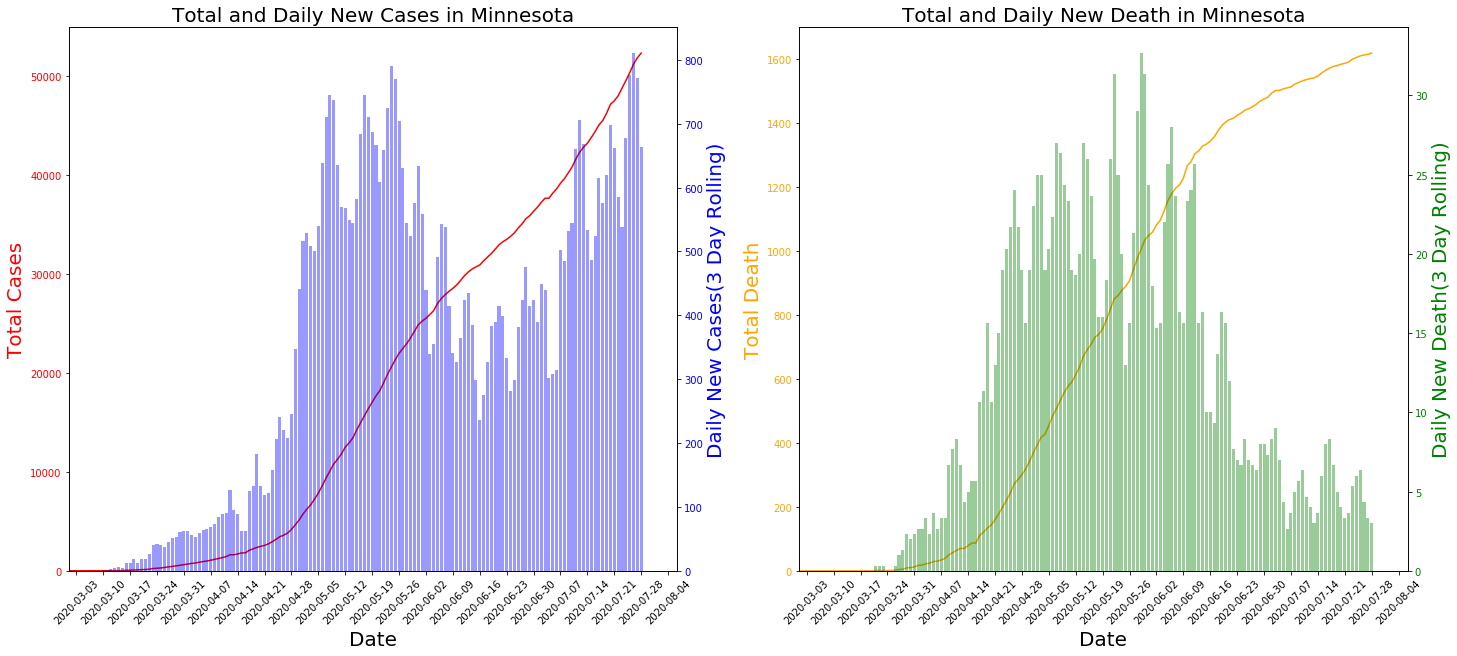

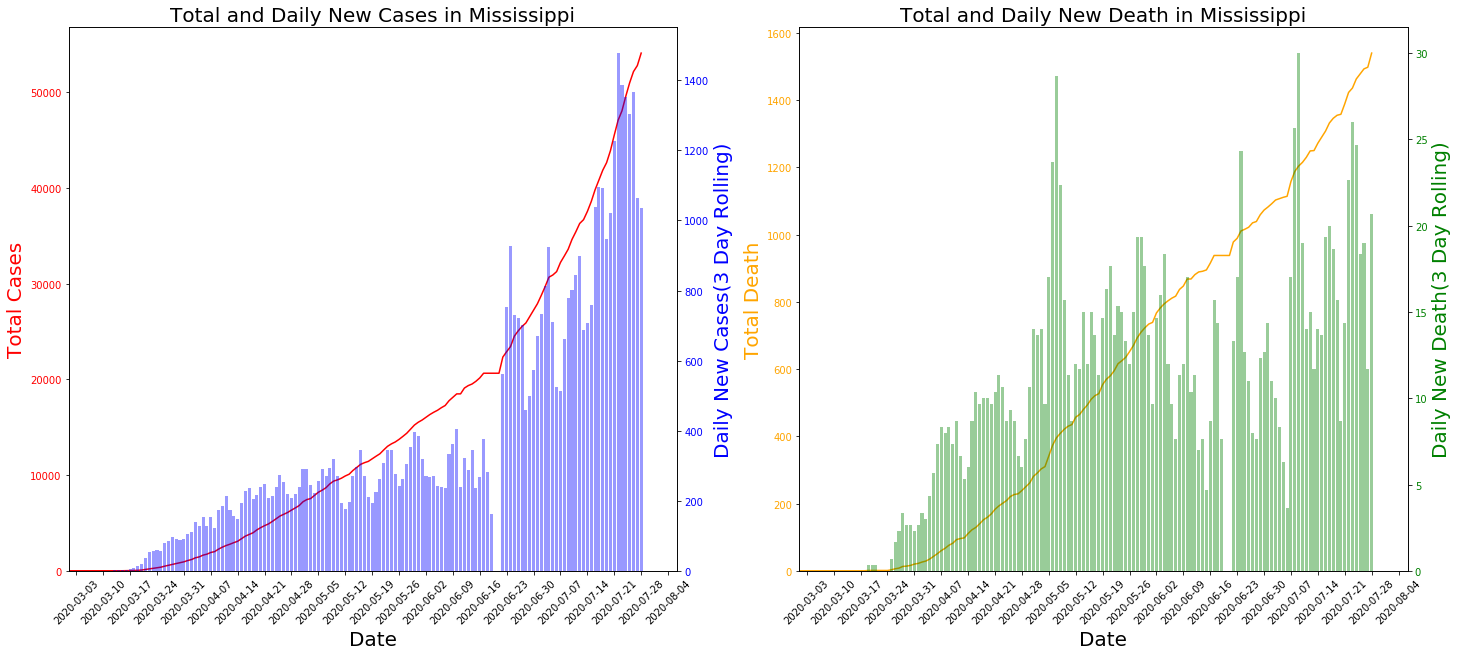

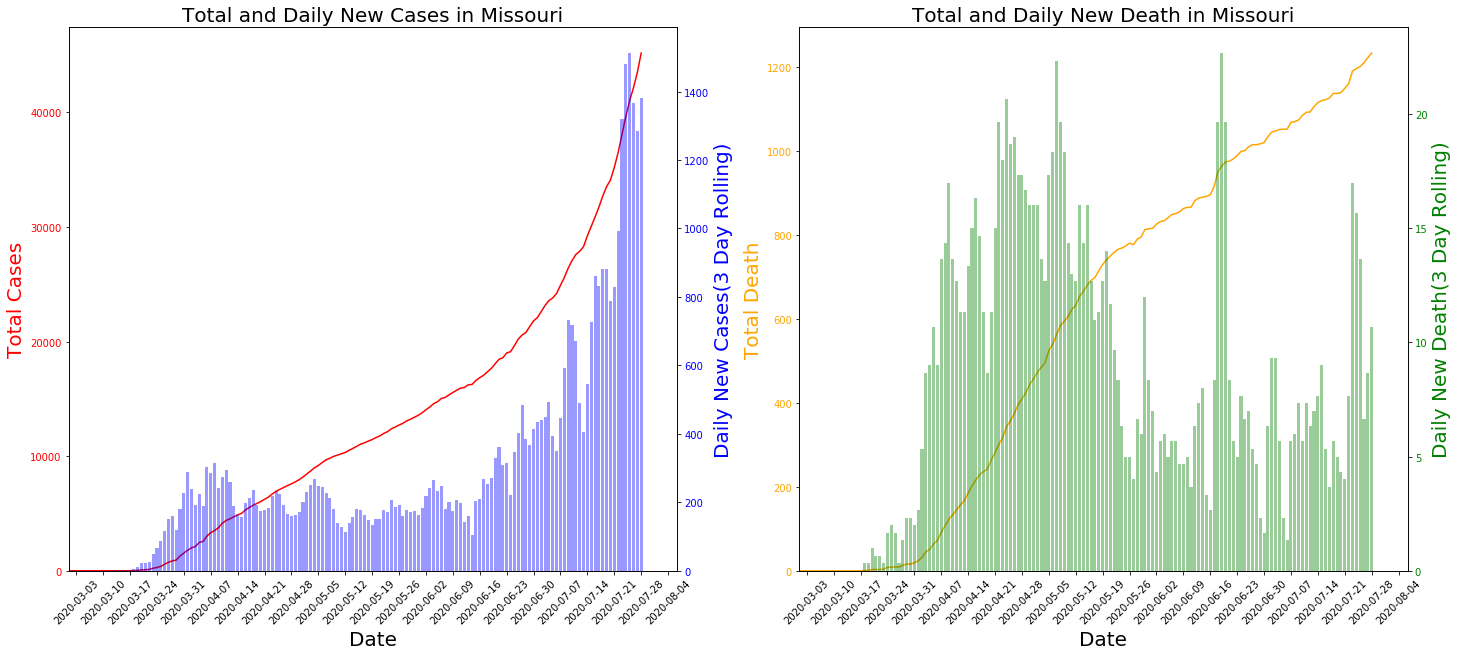

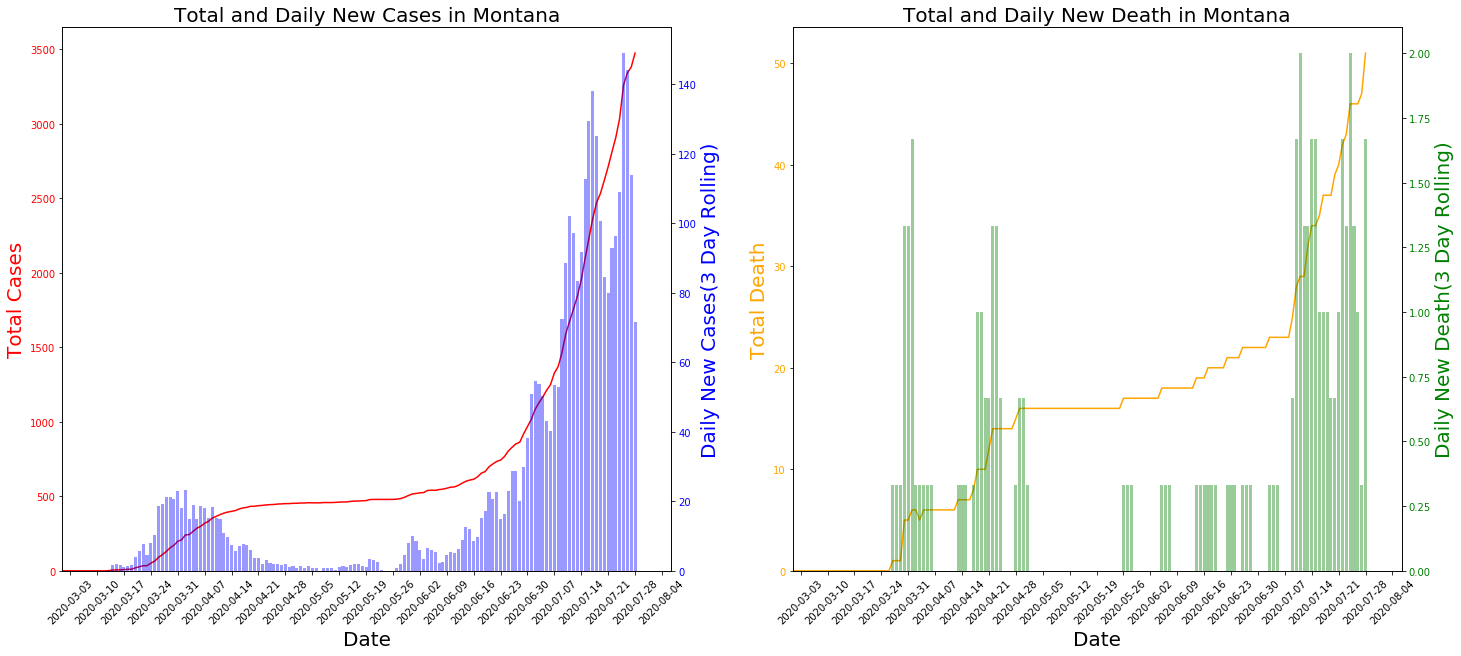

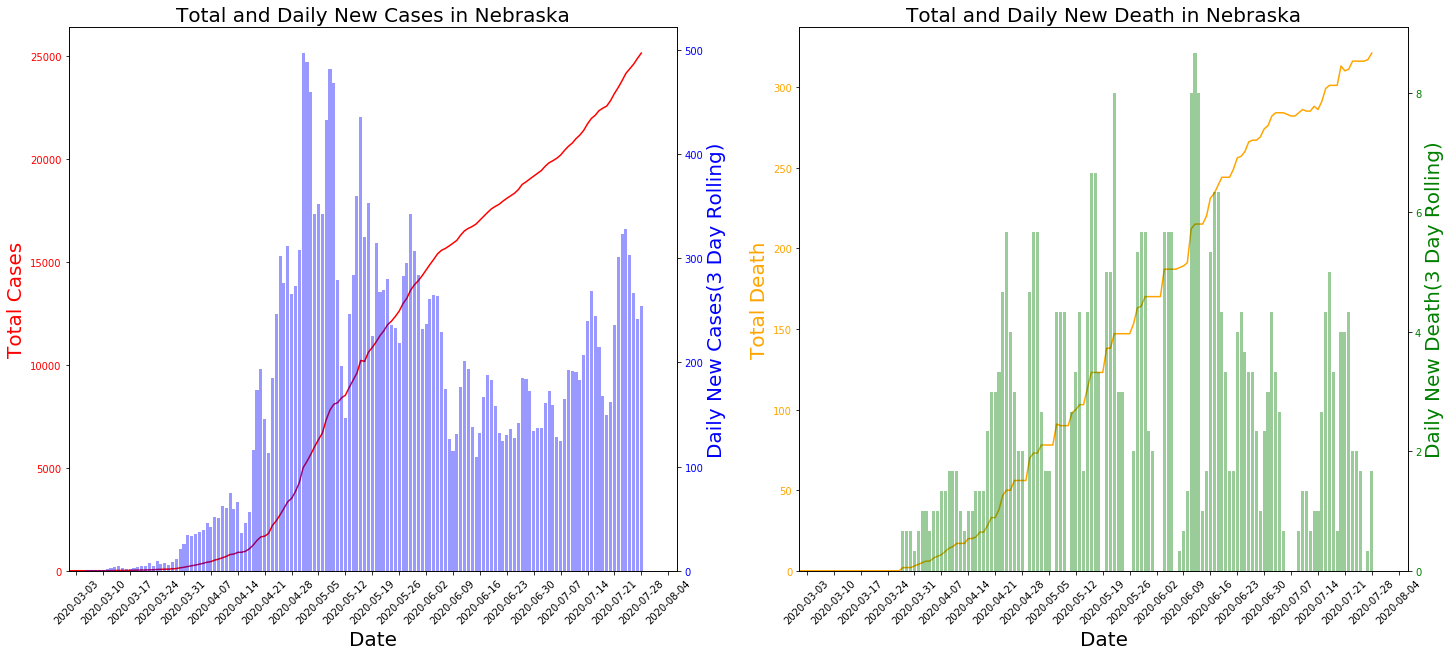

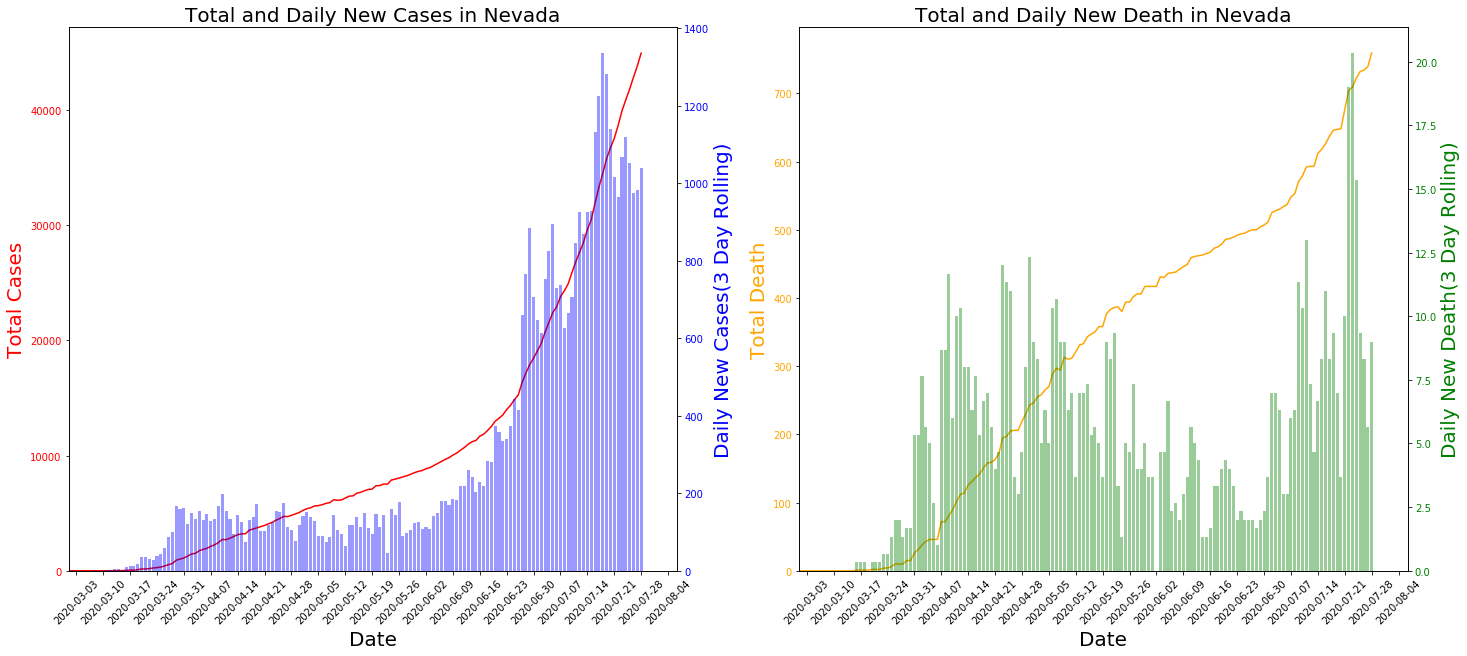

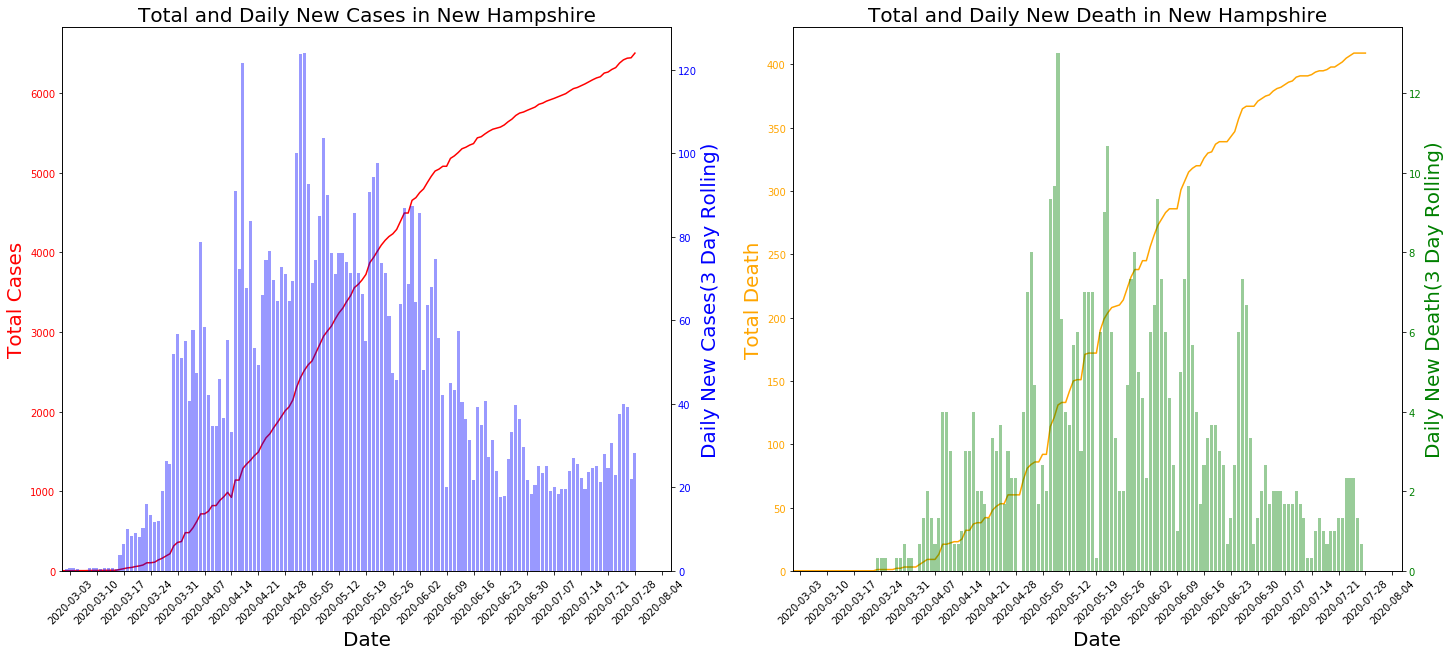

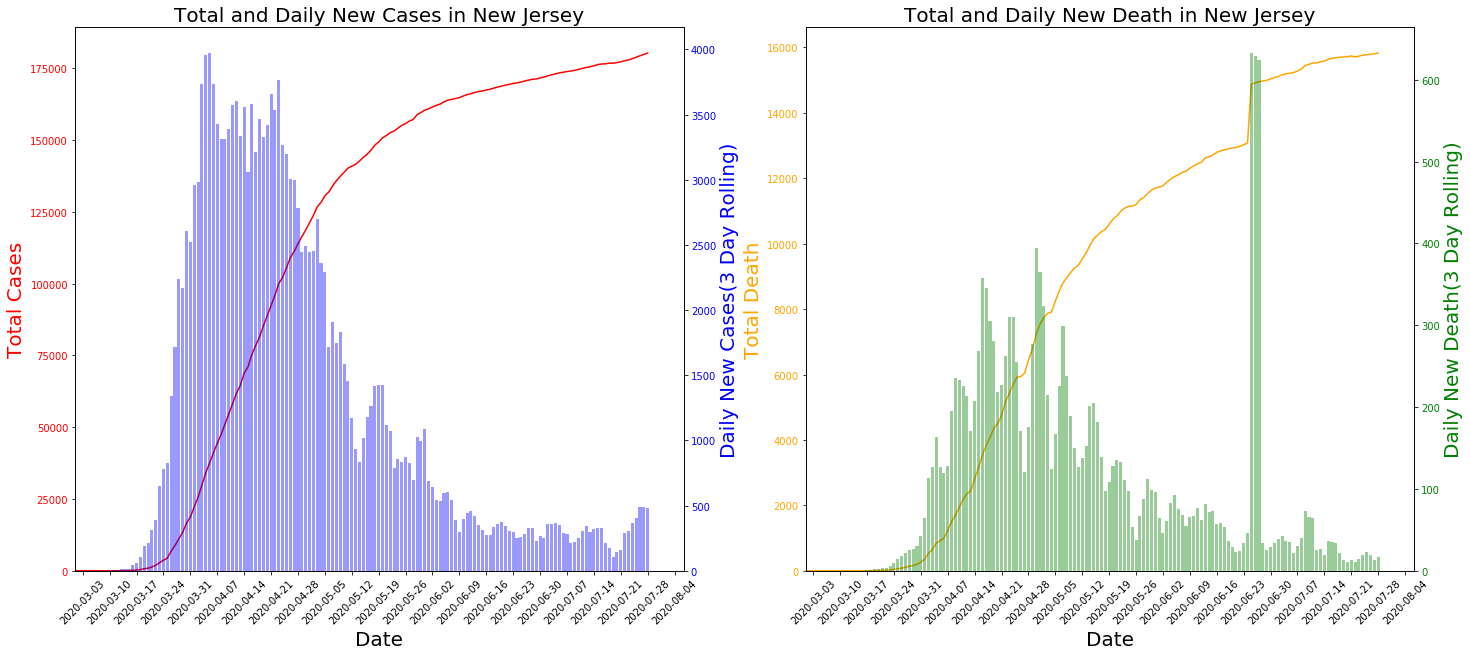

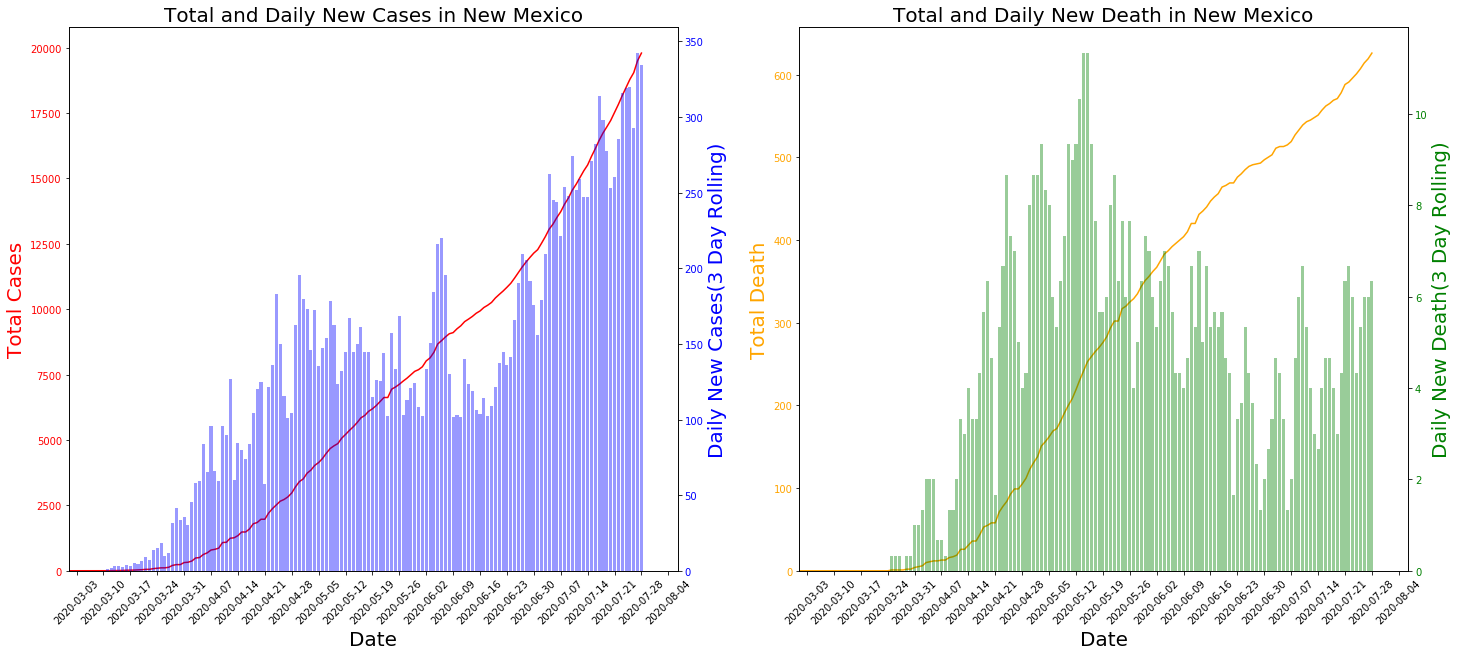

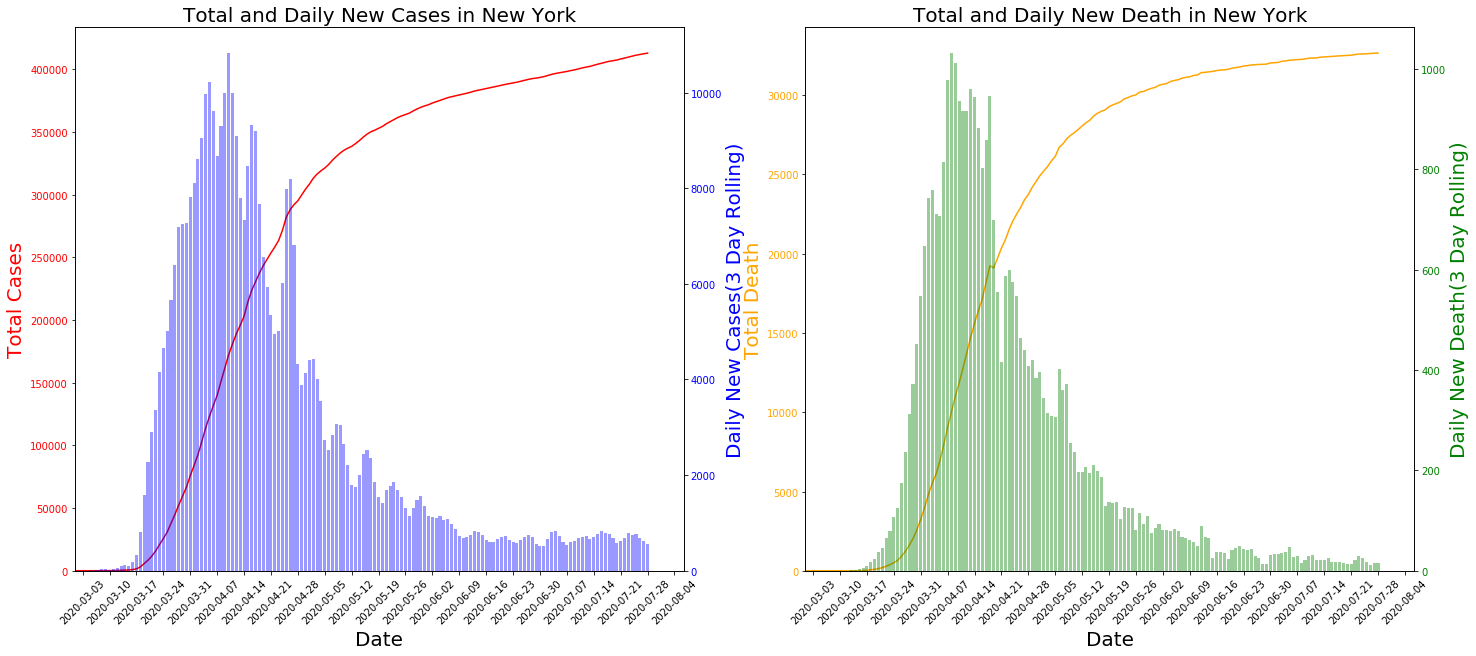

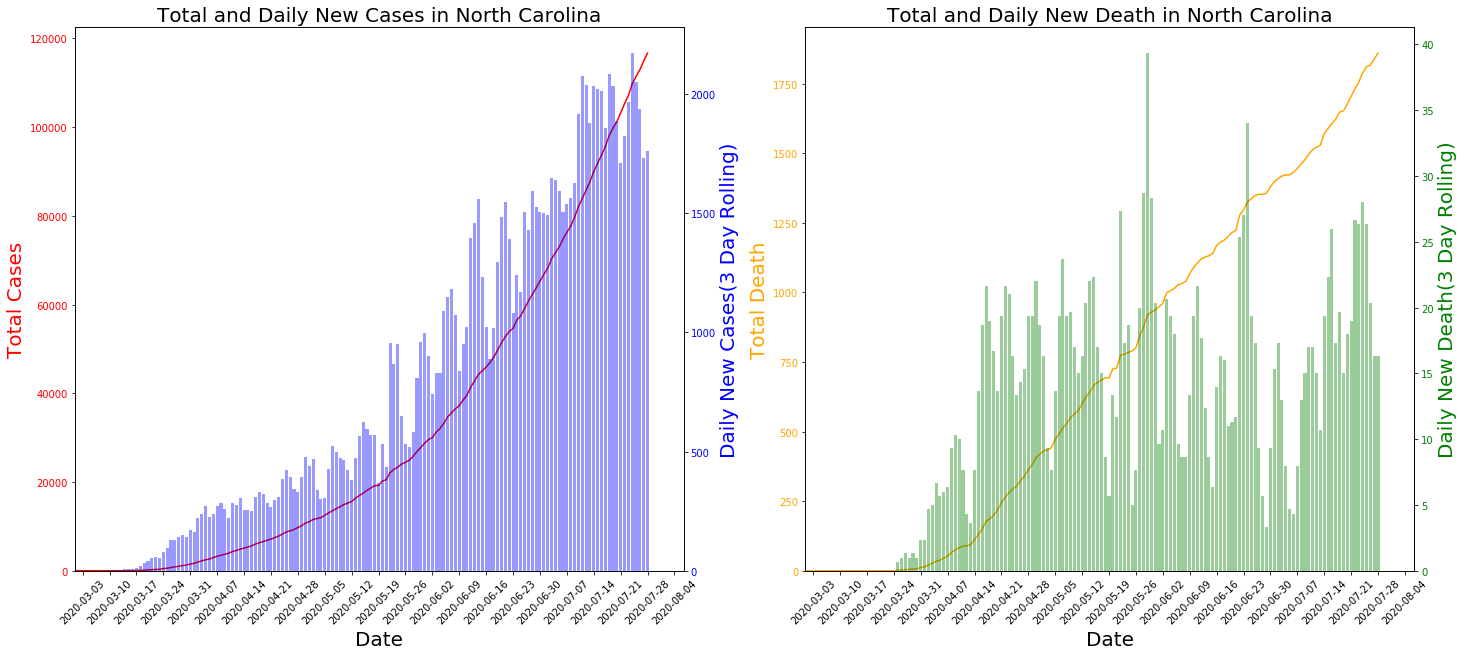

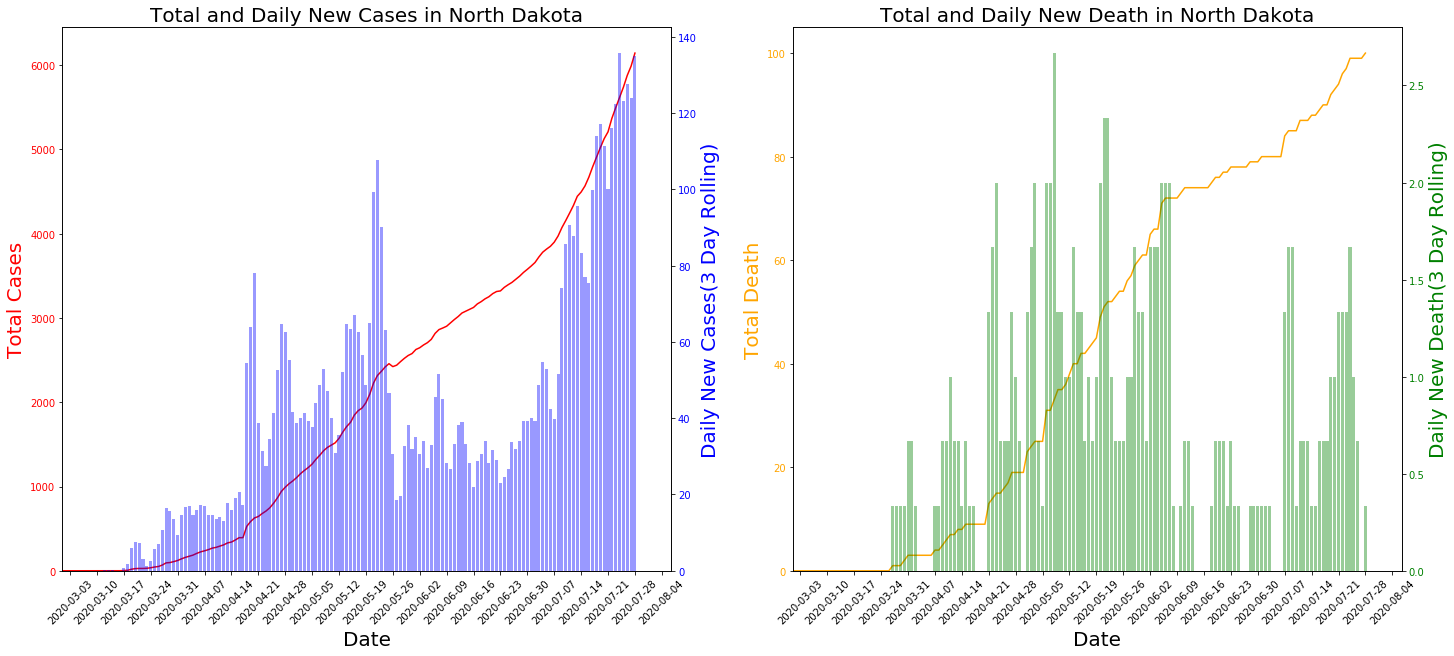

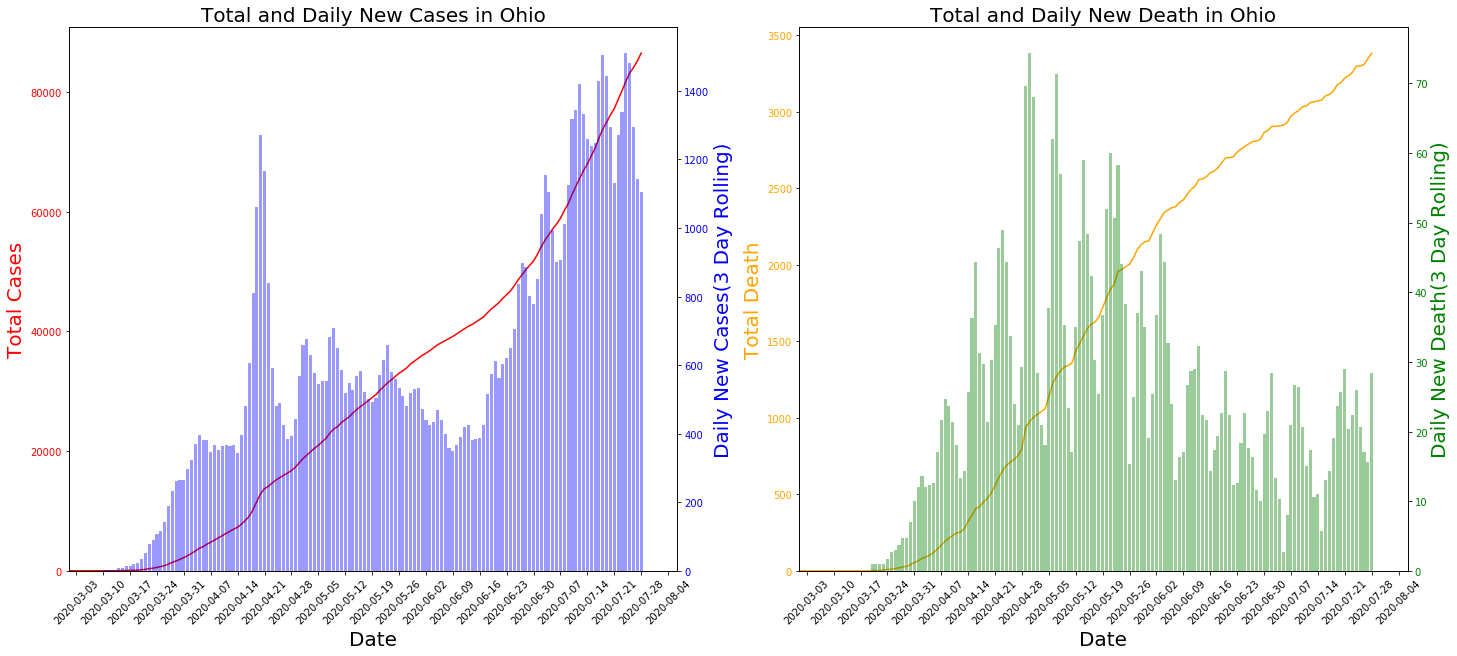

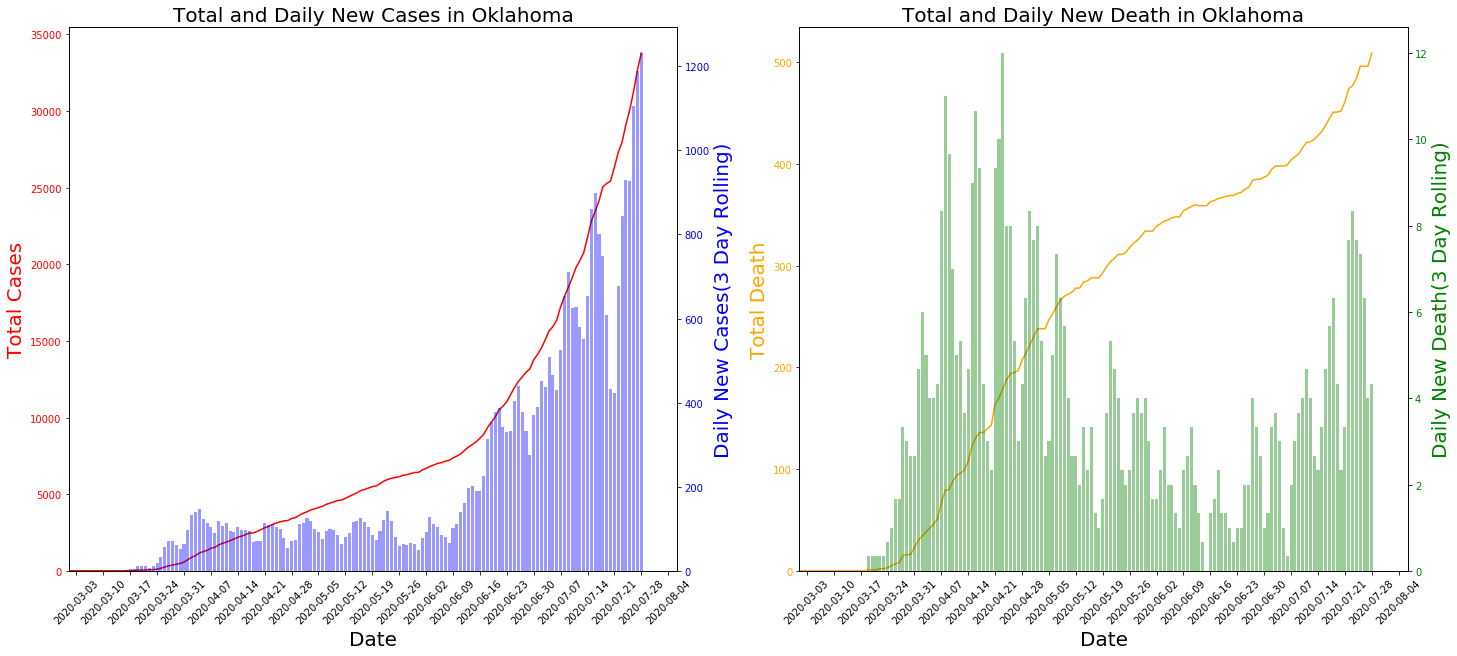

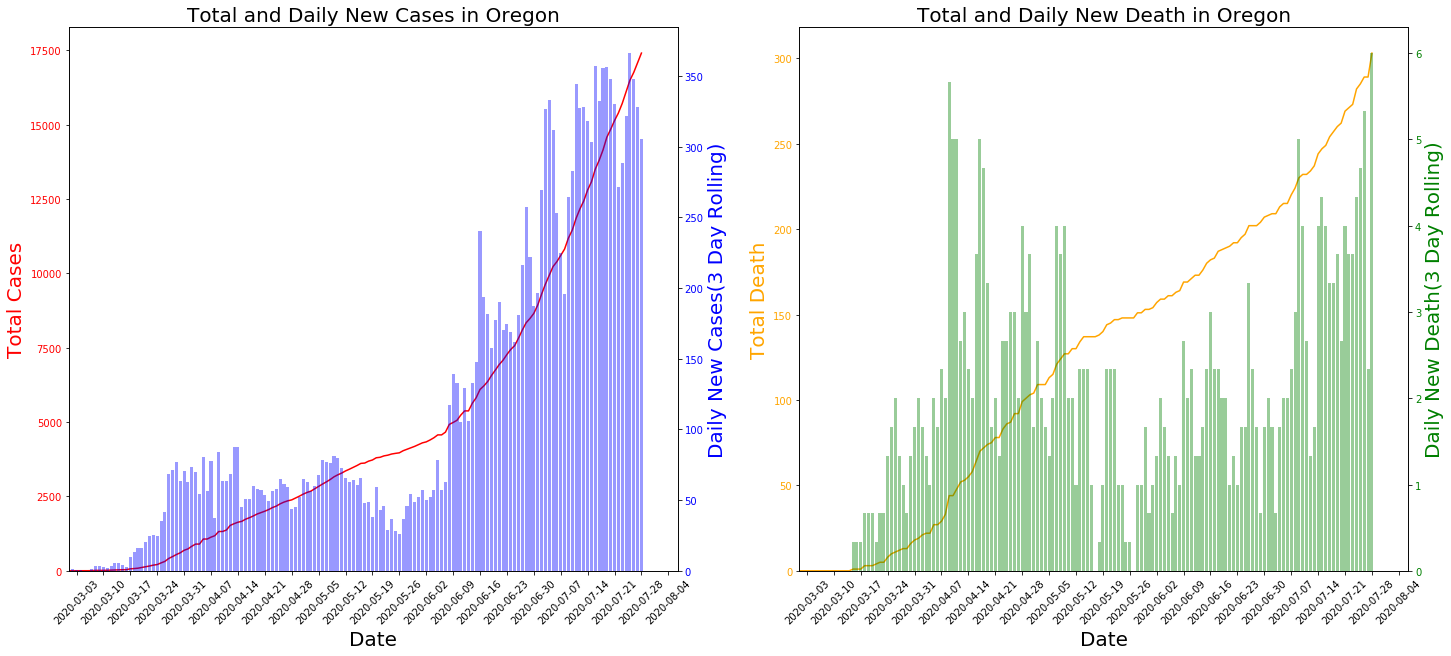

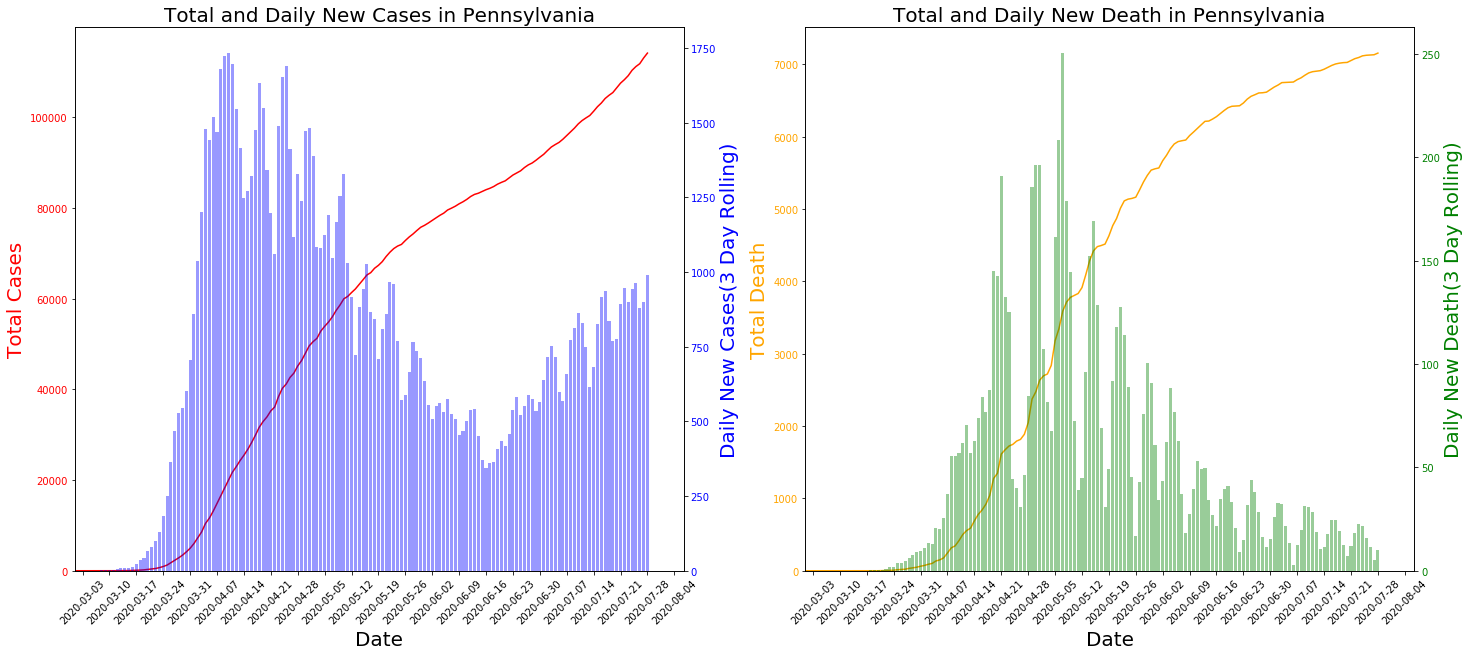

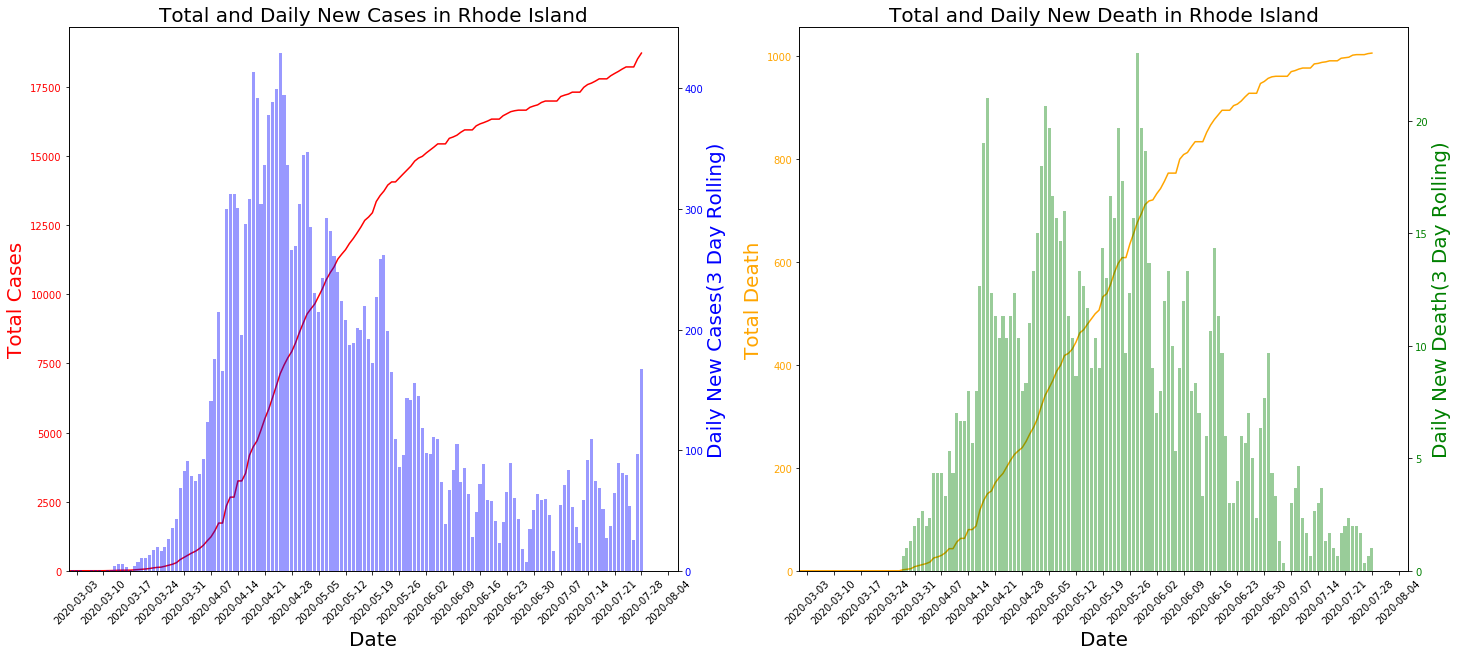

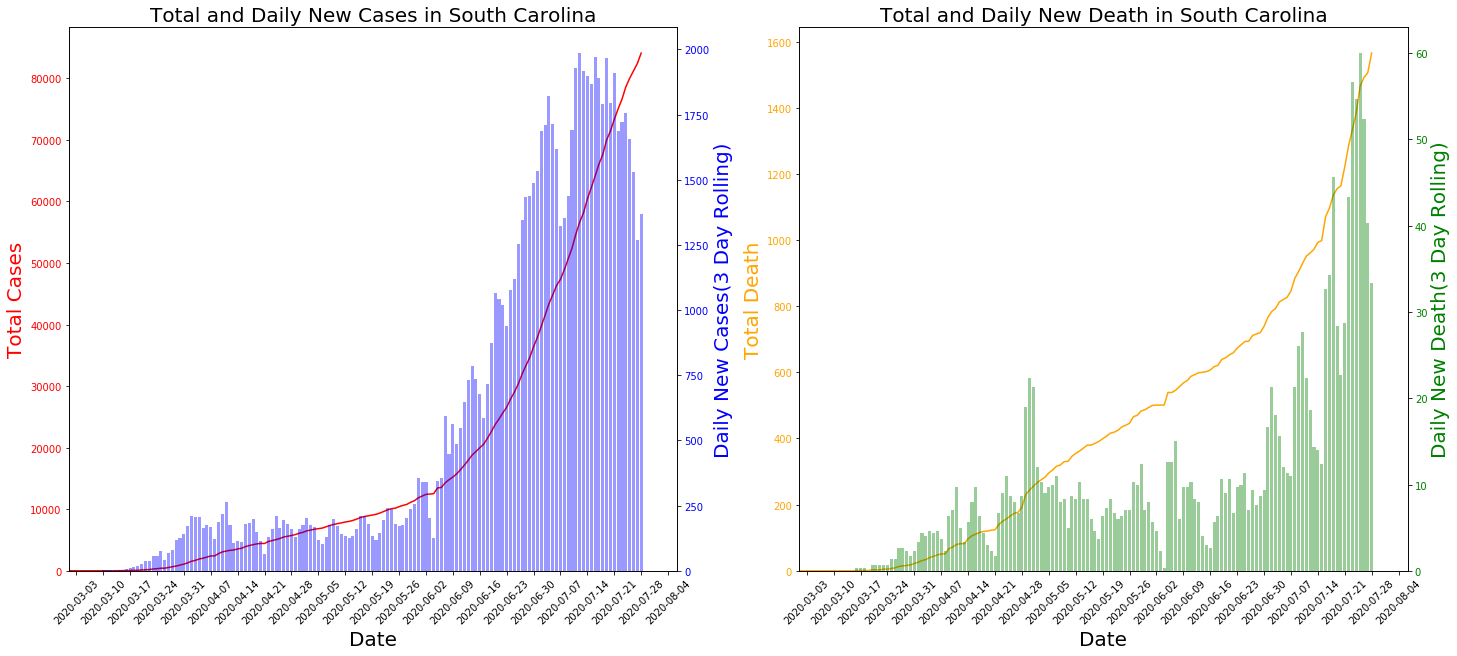

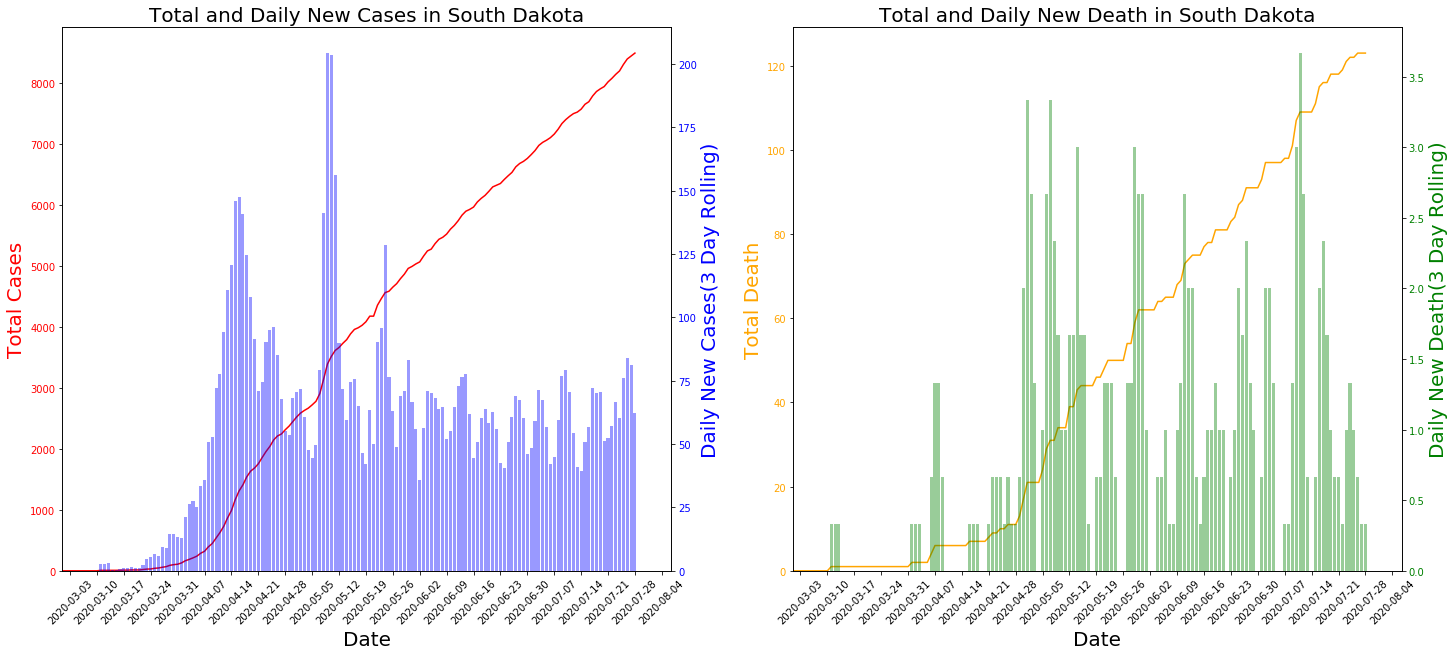

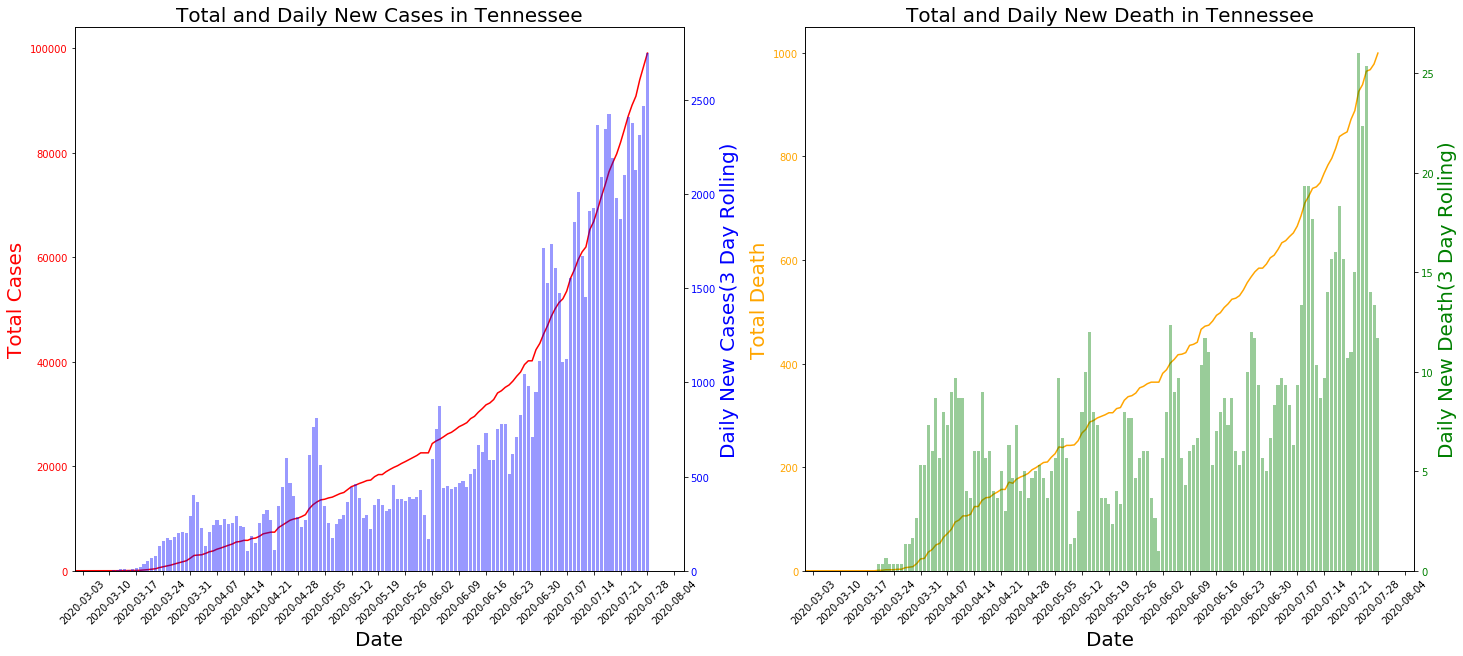

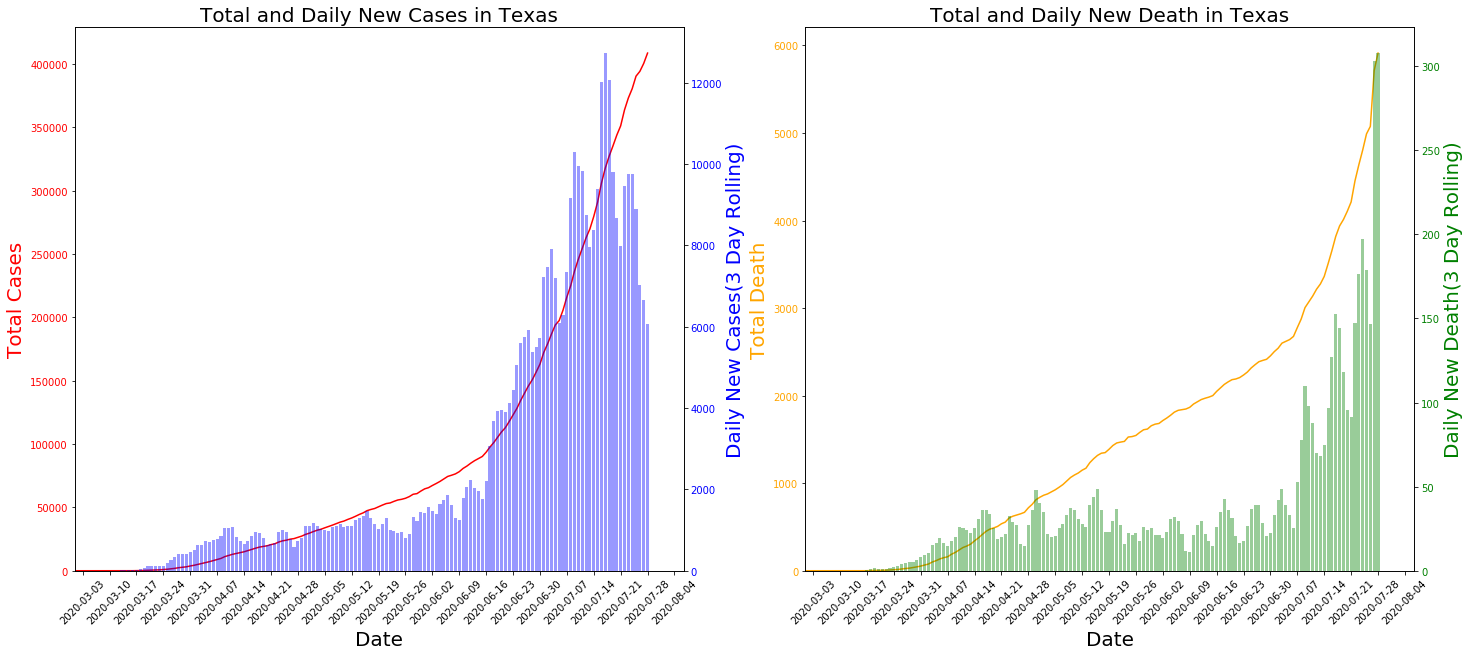

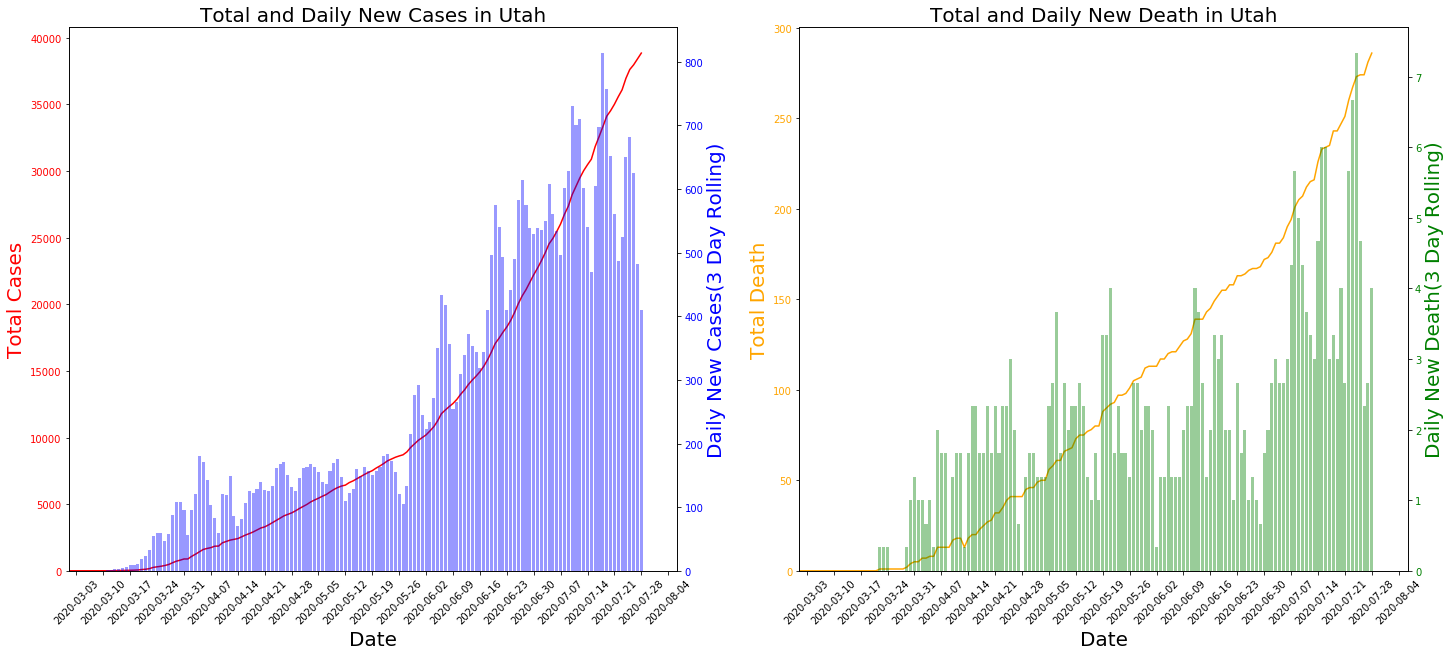

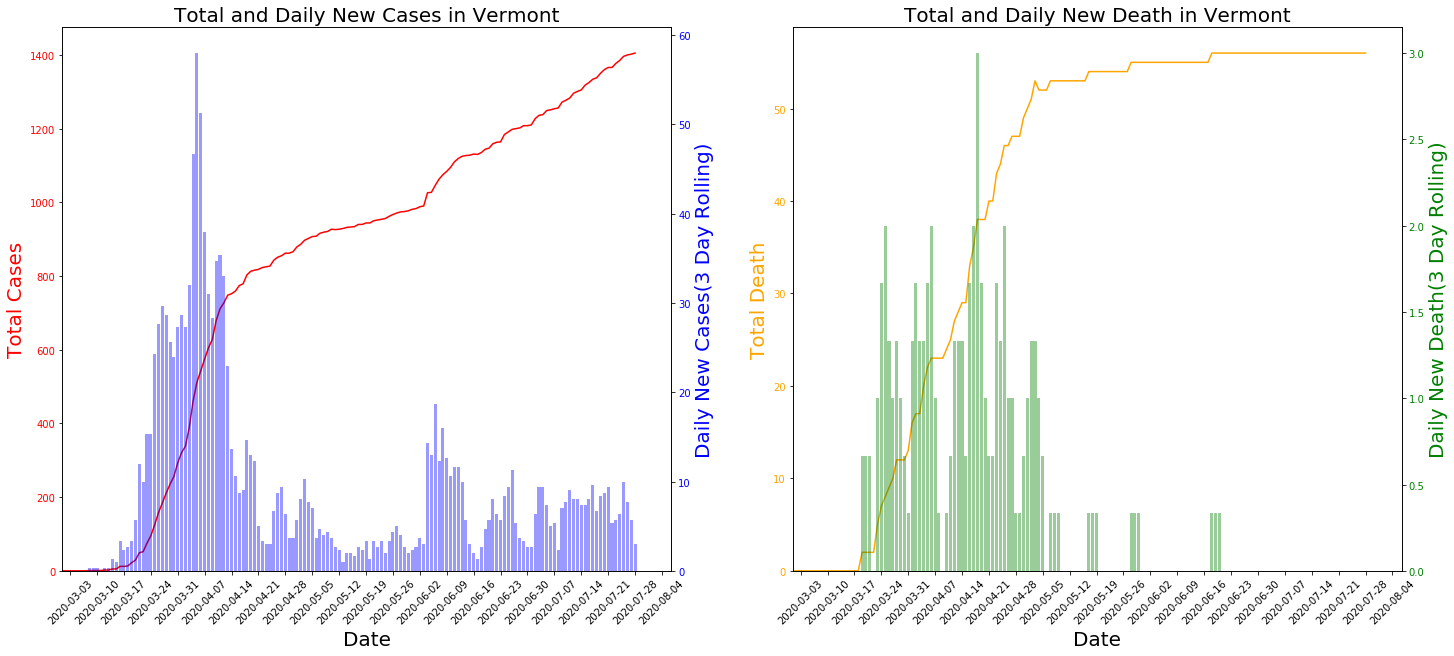

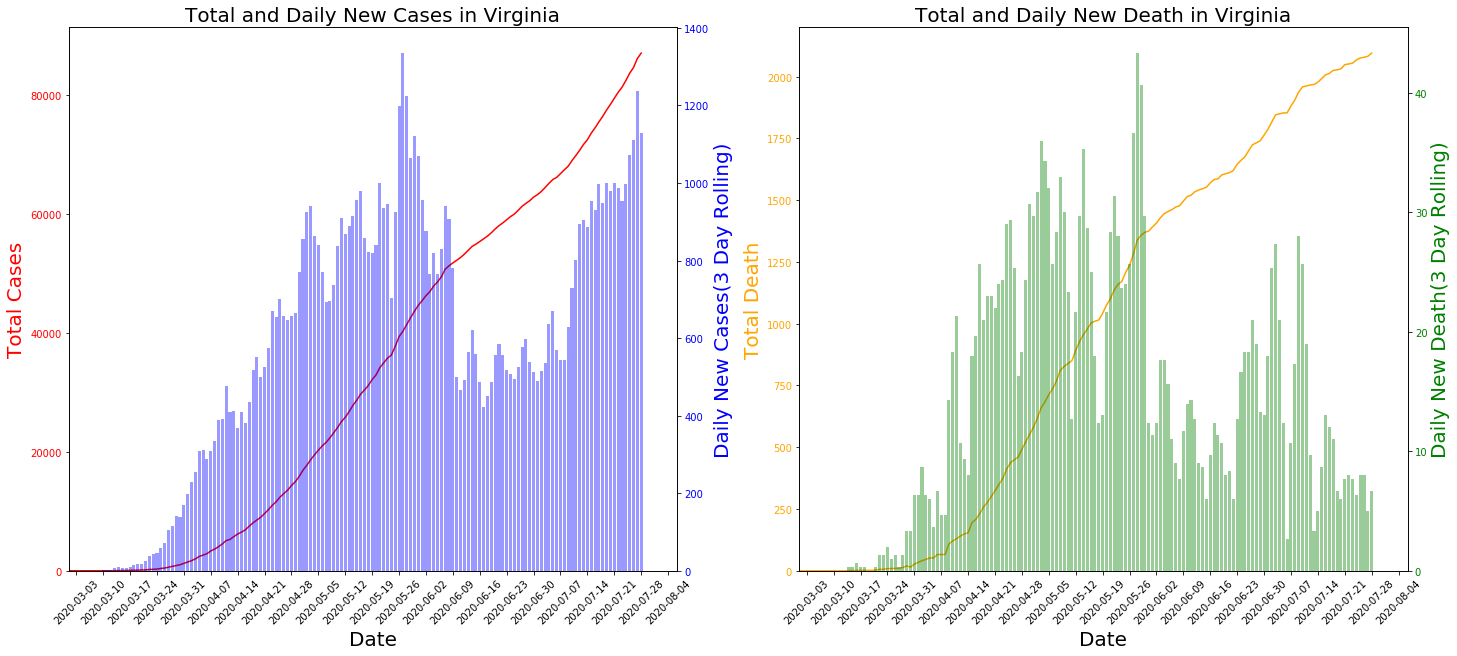

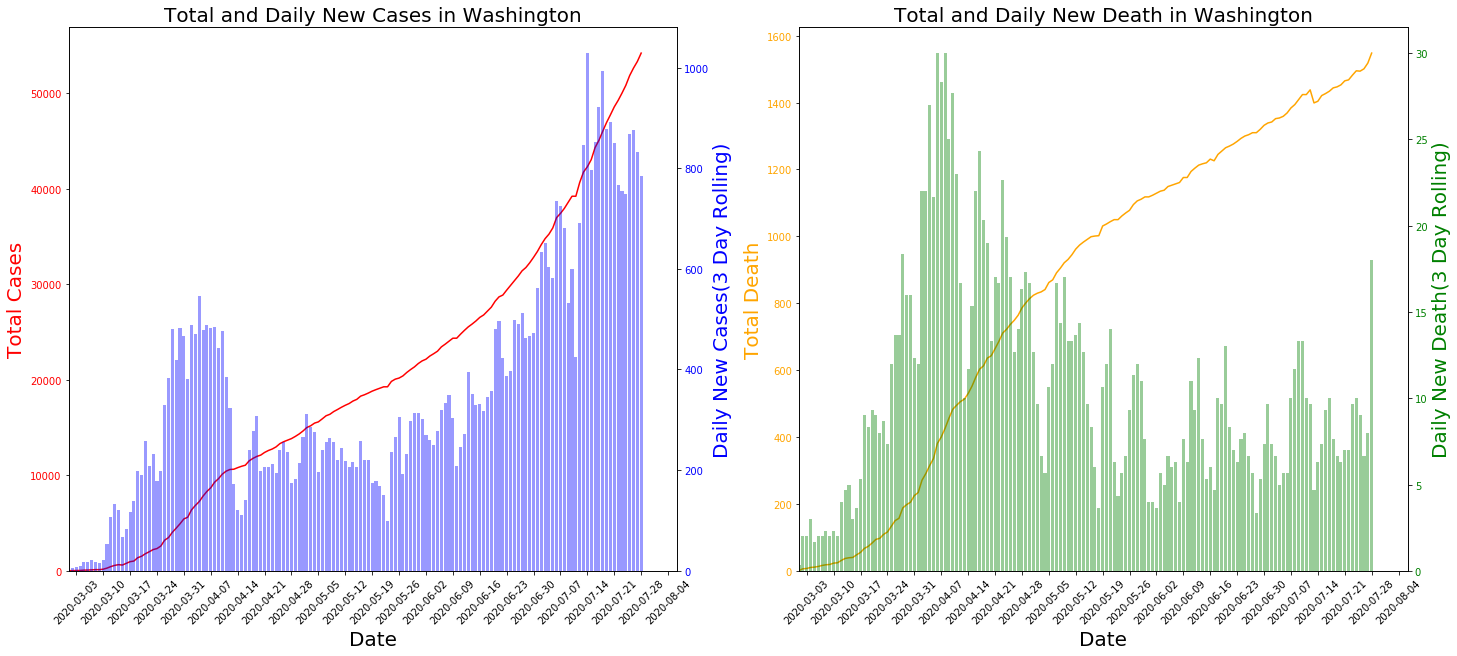

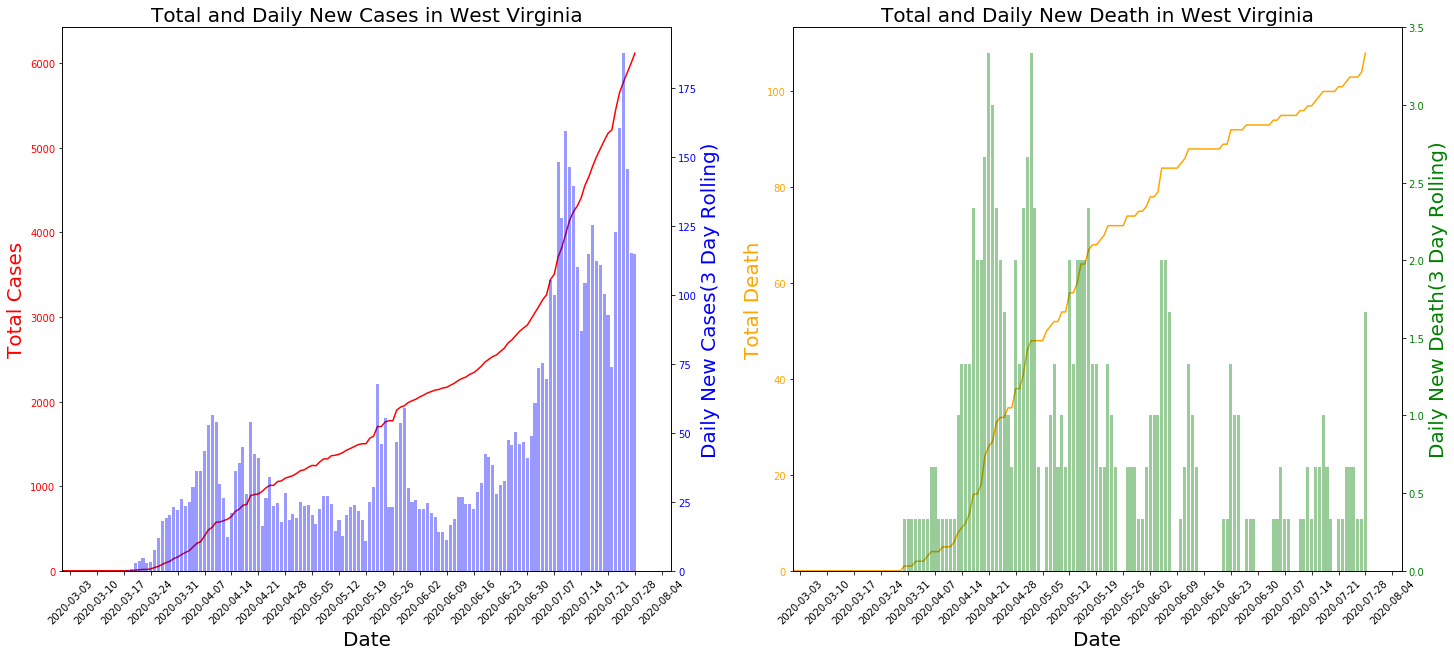

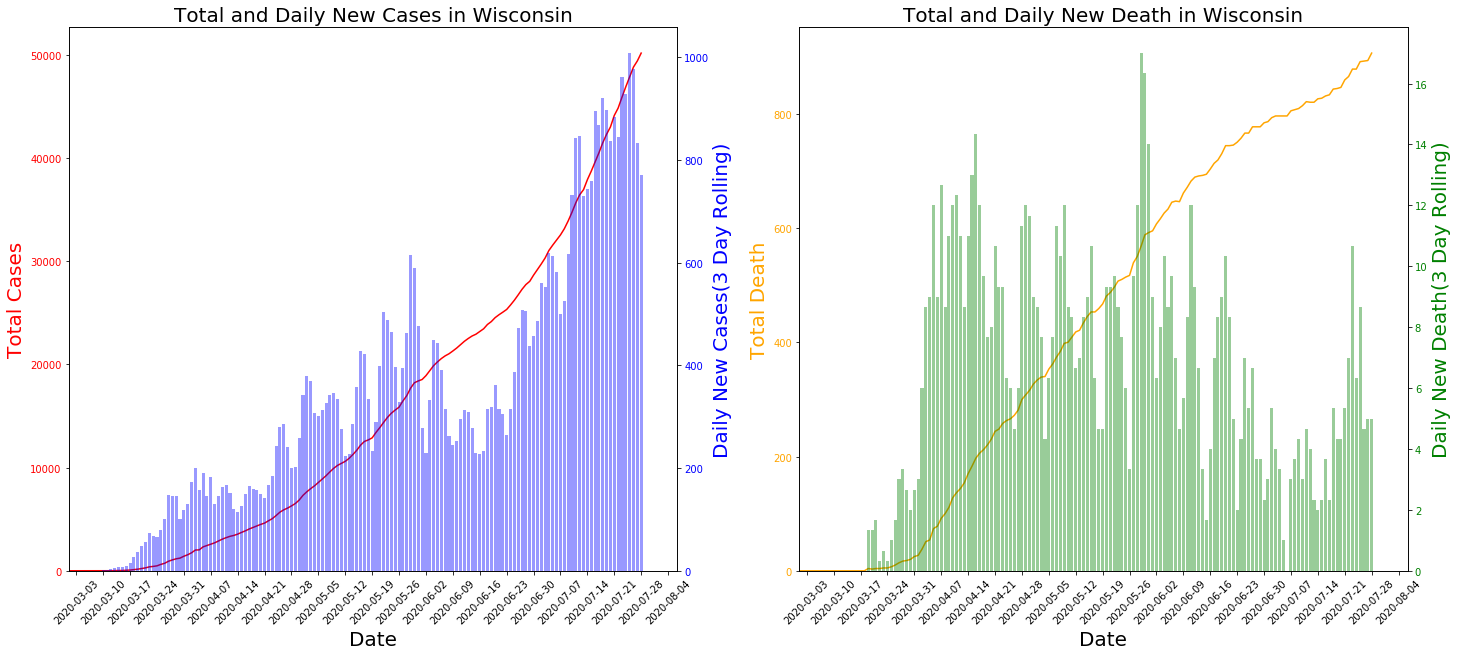

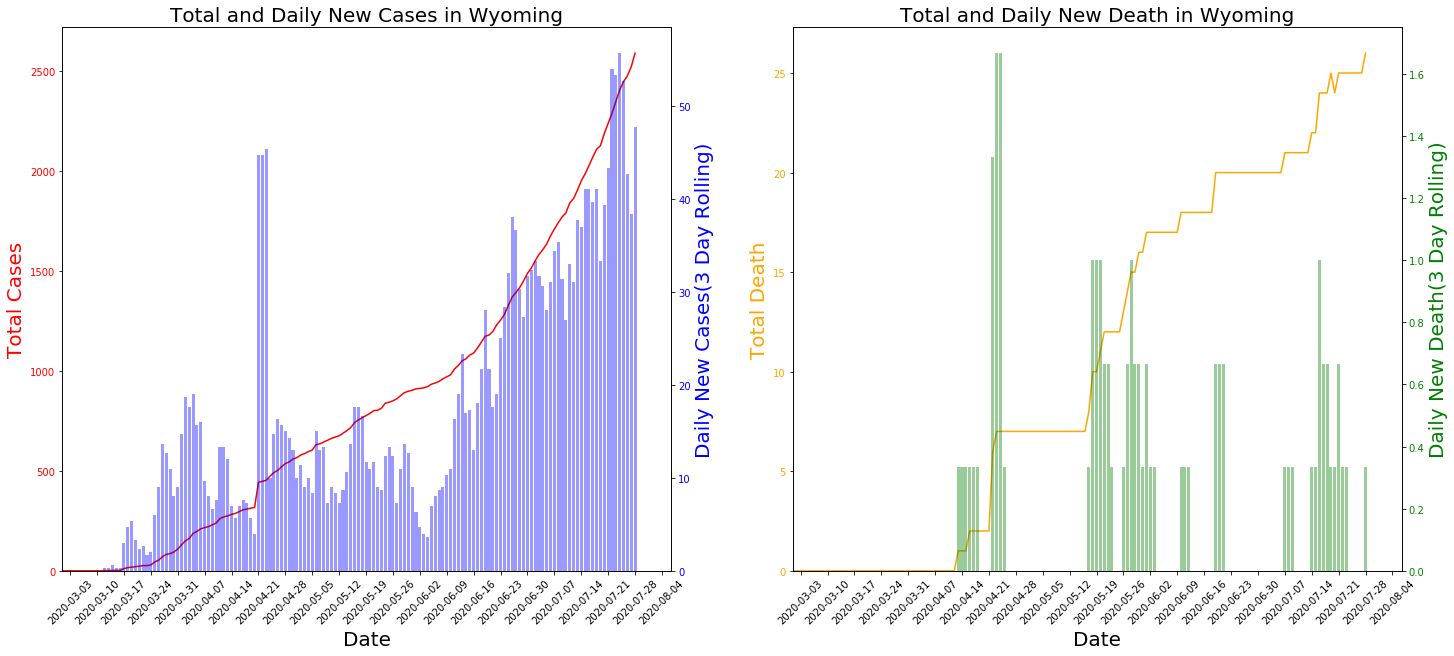

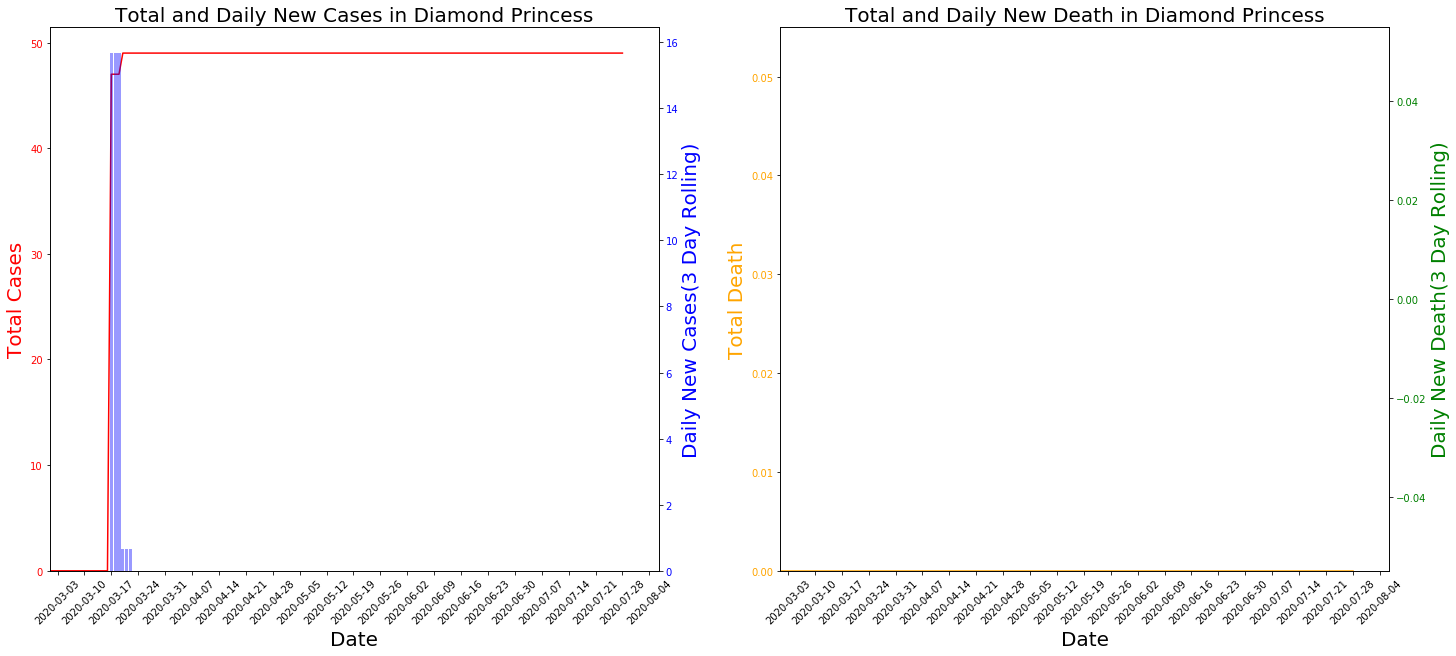

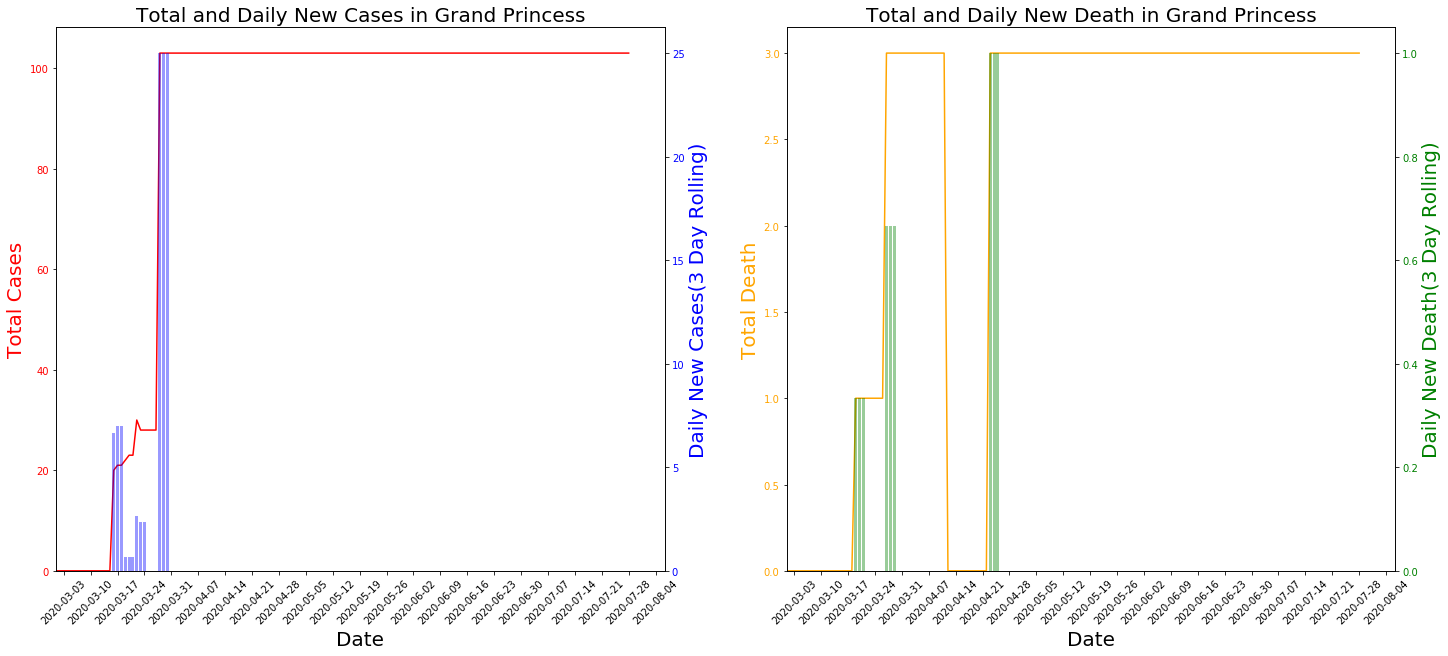

In [9]:
for state in states:
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24,10))
    ax2 = axs[0].twinx()
    ax3 = axs[1].twinx()
    axs[0].plot(data['%s' % state]['Date'], data['%s' % state]['Total Cases'], 'r-')
    axs[0].tick_params(axis = 'y', labelcolor='r')
    axs[0].tick_params(axis = 'x', labelrotation = 45)
    axs[0].set_xlim(datetime.date(2020, 3, 1))
    axs[0].set_ylim(0)
    axs[0].set_xlabel('Date',fontsize = 20)
    axs[0].set_ylabel('Total Cases', color='r',fontsize = 20)
    new_3d_rolling = data['%s' % state]['New Cases'].rolling(3).mean().fillna(0)
    ax2.bar(data['%s' % state]['Date'],new_3d_rolling, color = 'b', alpha= 0.4)
    ax2.tick_params(axis = 'y',labelcolor='b')
    ax2.set_ylabel('Daily New Cases(3 Day Rolling)', color='b',fontsize = 20)
    
    axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[0].set_title('Total and Daily New Cases in %s' %state,fontsize = 20)

    
    axs[1].plot(data['%s' % state]['Date'], data['%s' % state]['Total Death'], '-',color = 'orange')
    axs[1].tick_params(axis = 'y', labelcolor='orange')
    axs[1].tick_params(axis = 'x', labelrotation = 45)
    axs[1].set_xlim(datetime.date(2020, 3, 1))
    axs[1].set_ylim(0)
    axs[1].set_xlabel('Date',fontsize = 20)
    axs[1].set_ylabel('Total Death', color='orange',fontsize = 20)
    death_3d_rolling = data['%s' % state]['New Death'].rolling(3).mean().fillna(0)
    ax3.bar(data['%s' % state]['Date'], death_3d_rolling, color = 'green', alpha= 0.4)
    ax3.tick_params(axis = 'y',labelcolor='green')
    ax3.set_ylabel('Daily New Death(3 Day Rolling)', color='green',fontsize = 20)
    
    axs[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[1].set_title('Total and Daily New Death in %s' %state,fontsize = 20)
    plt.show();

### Trends of Fatality Rate
- Total death as a percent of total cases

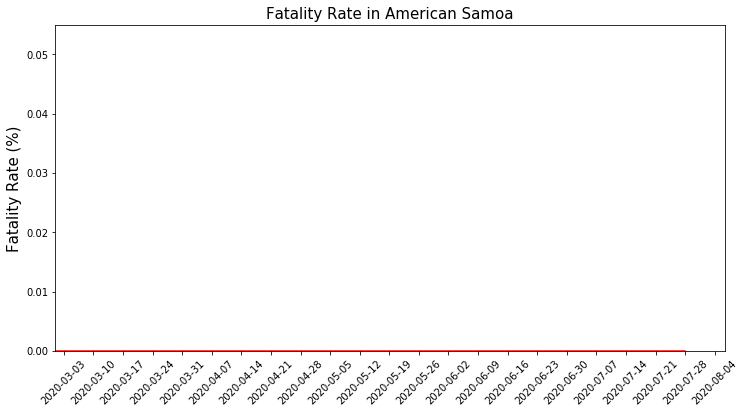

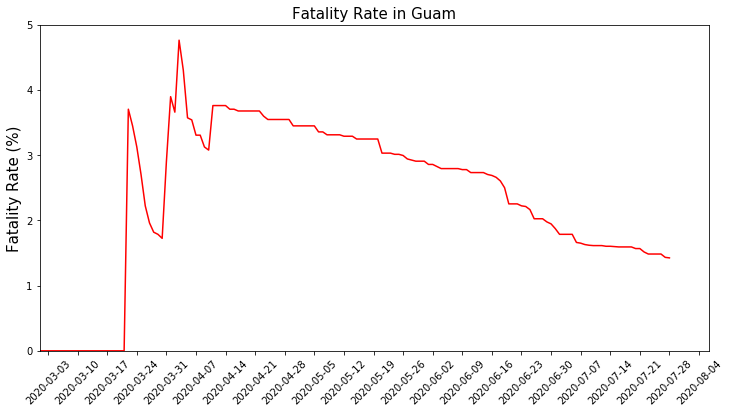

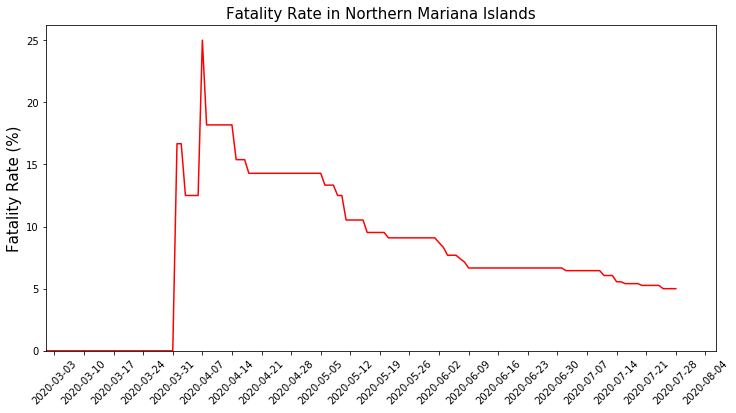

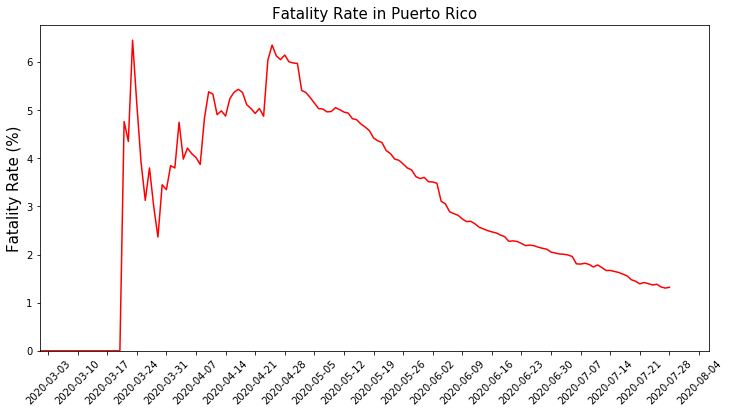

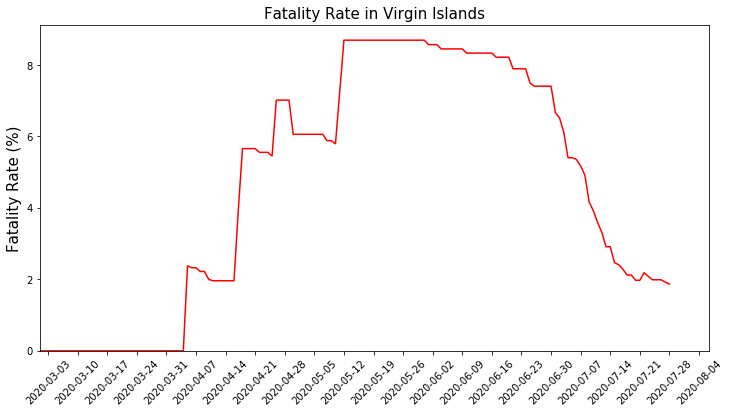

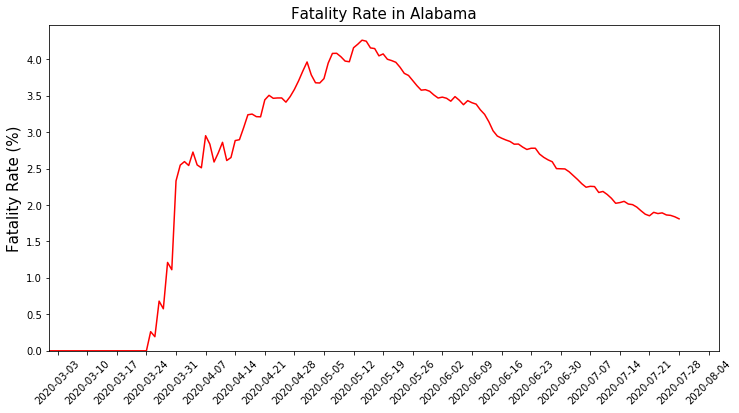

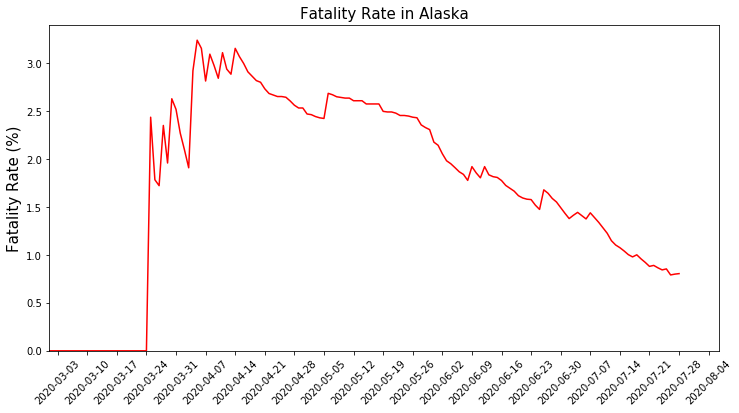

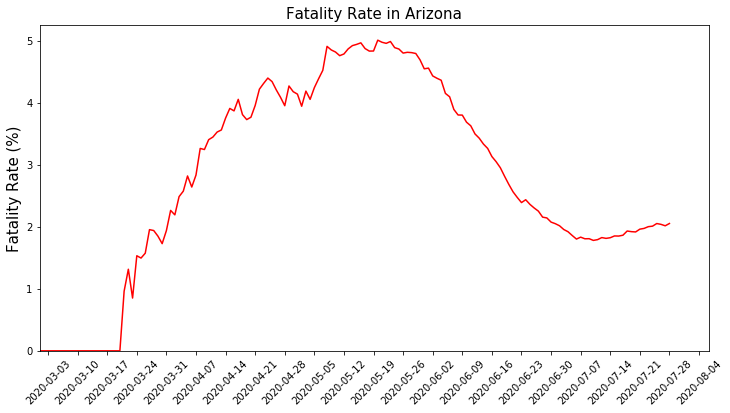

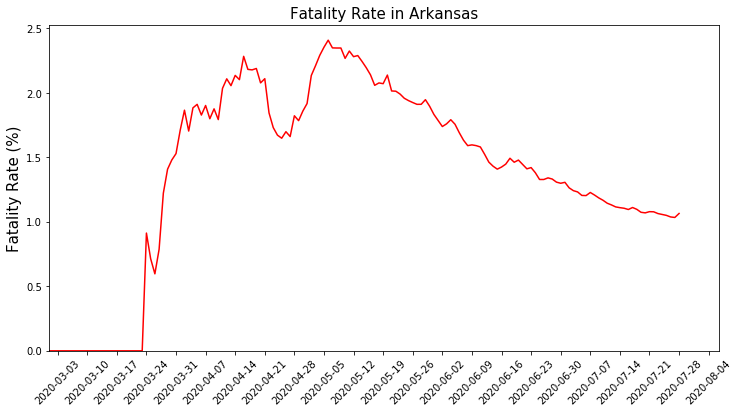

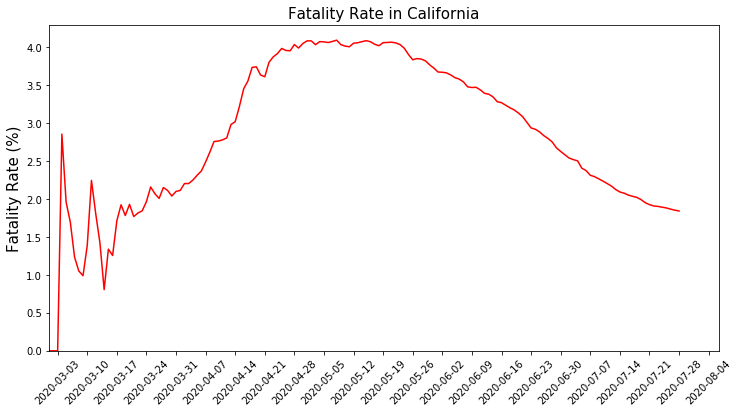

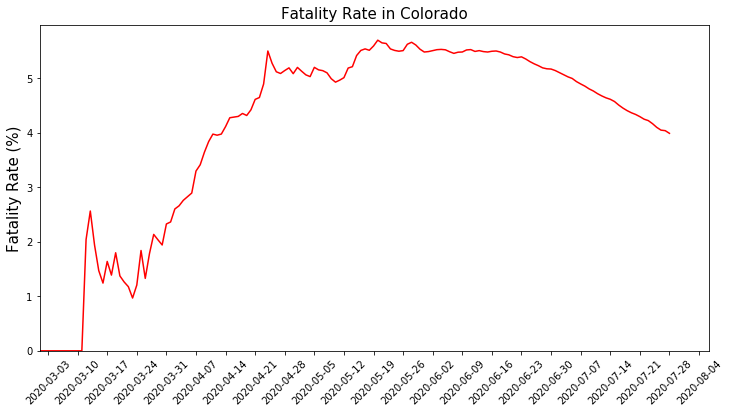

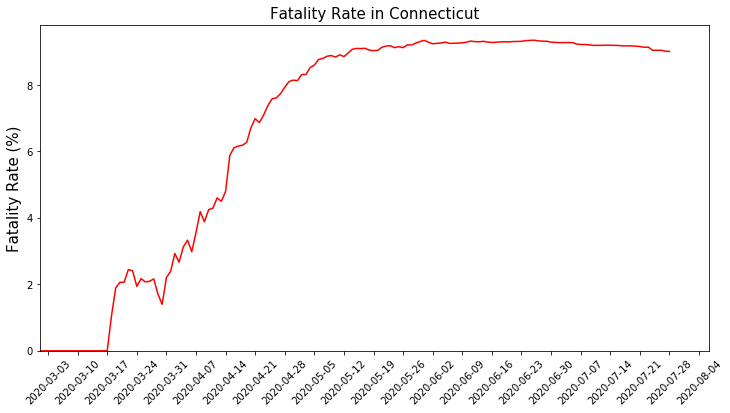

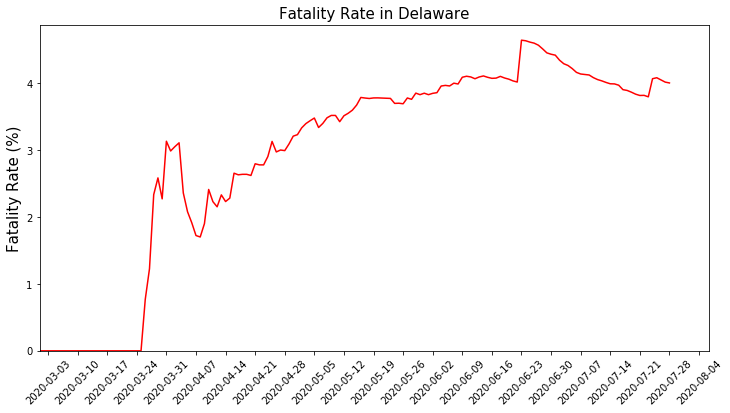

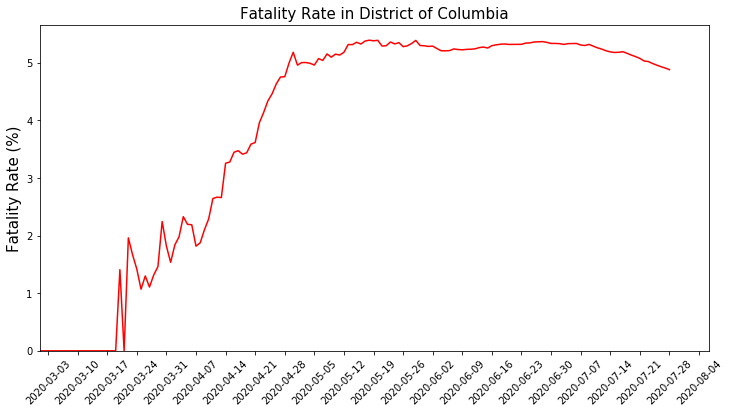

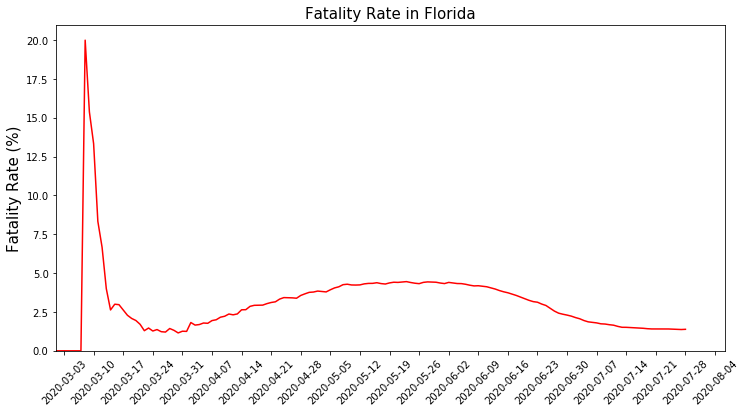

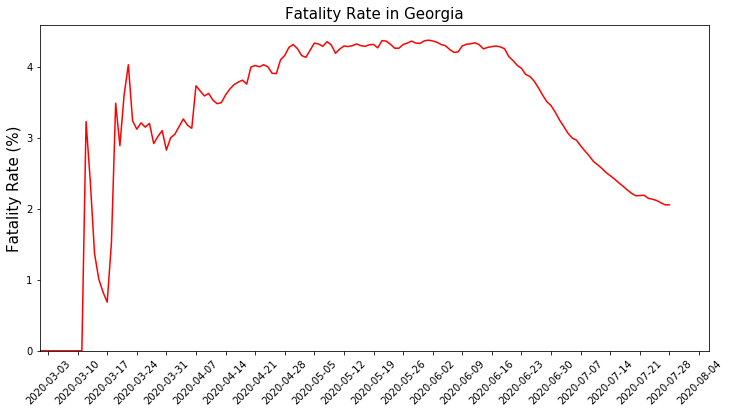

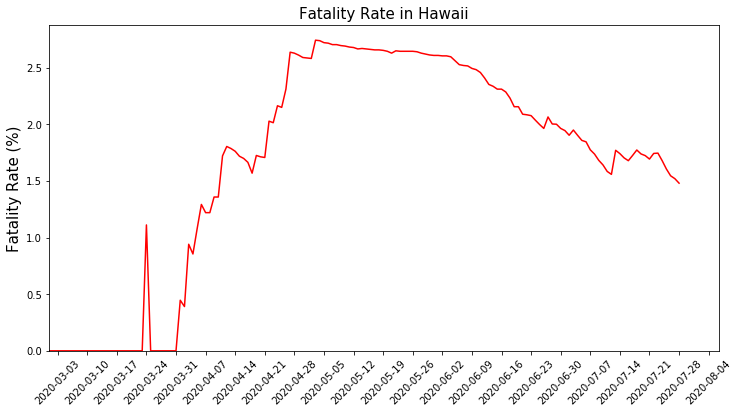

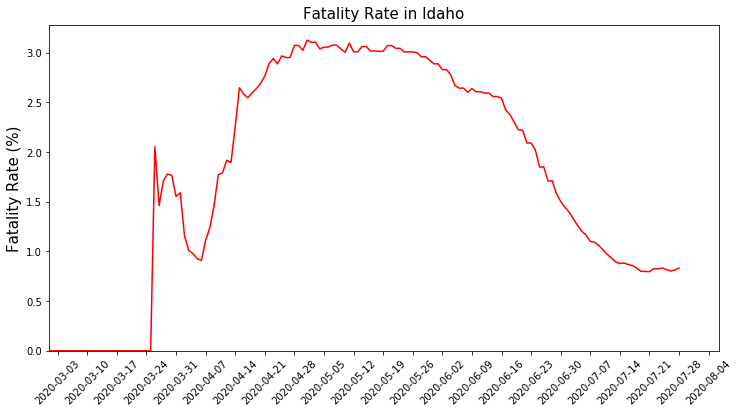

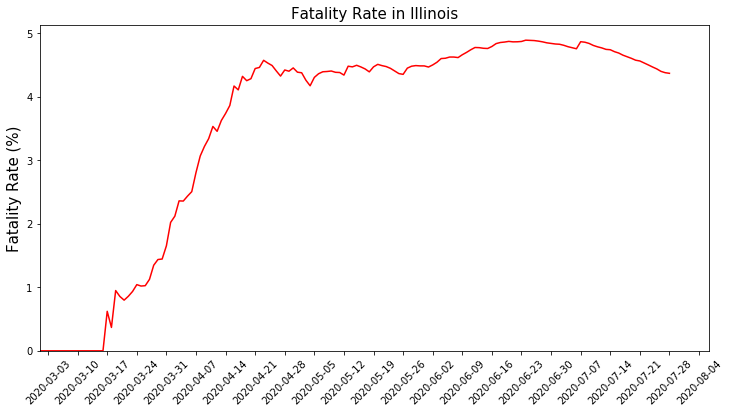

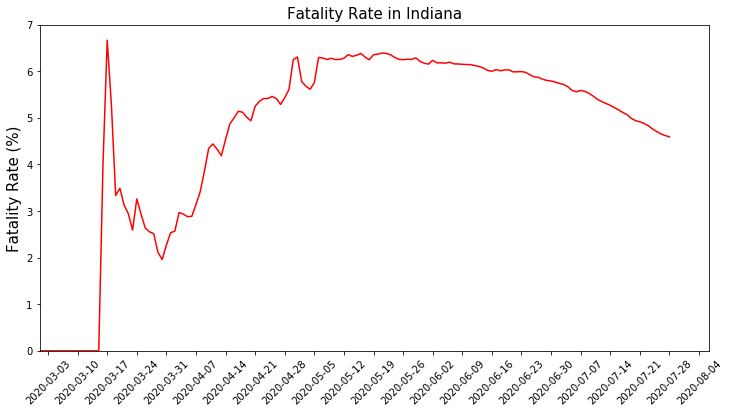

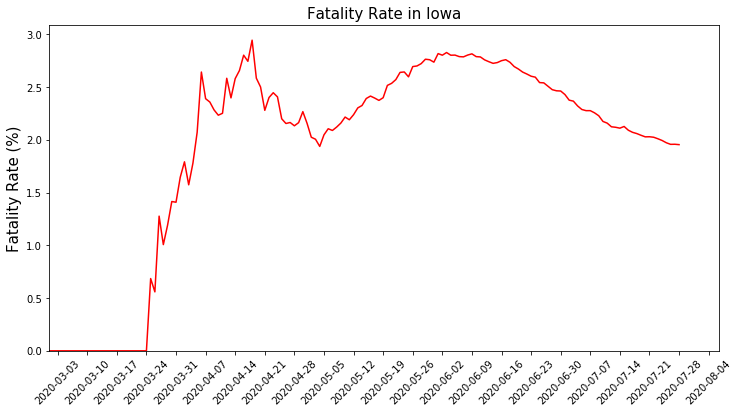

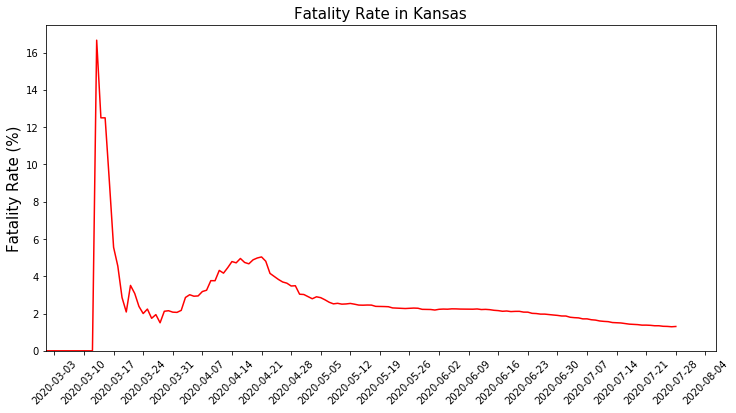

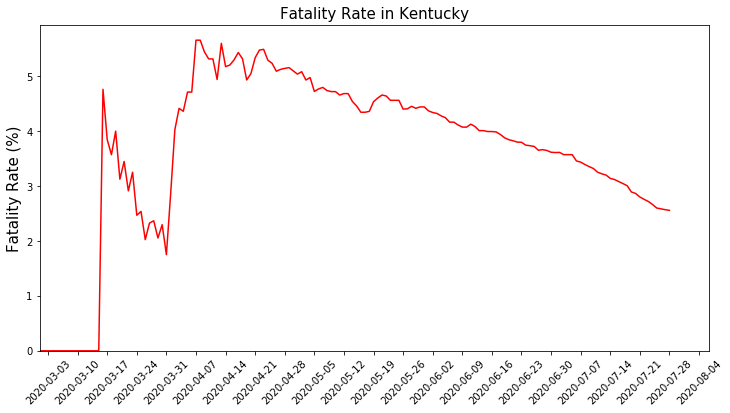

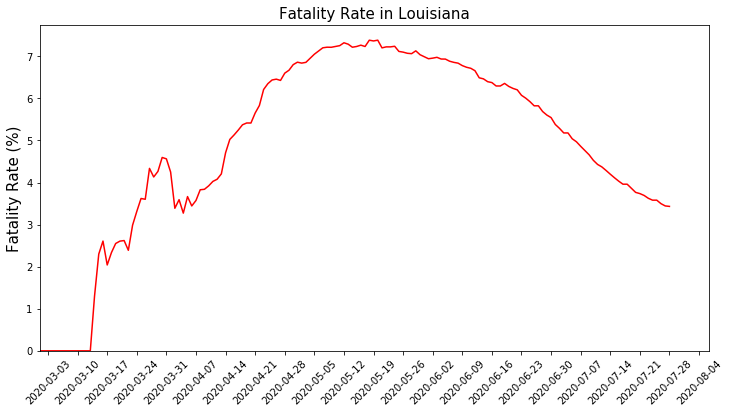

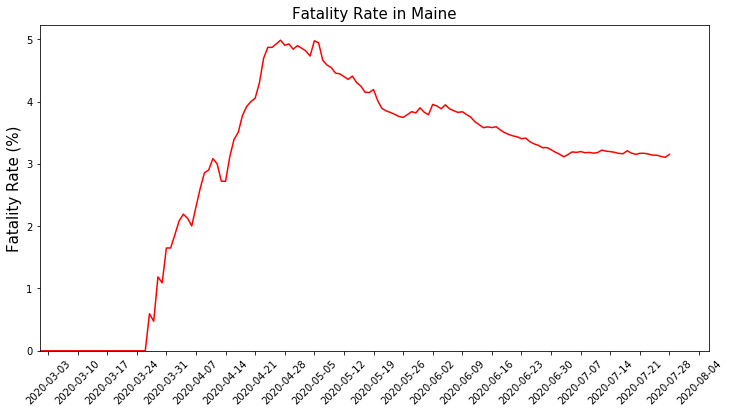

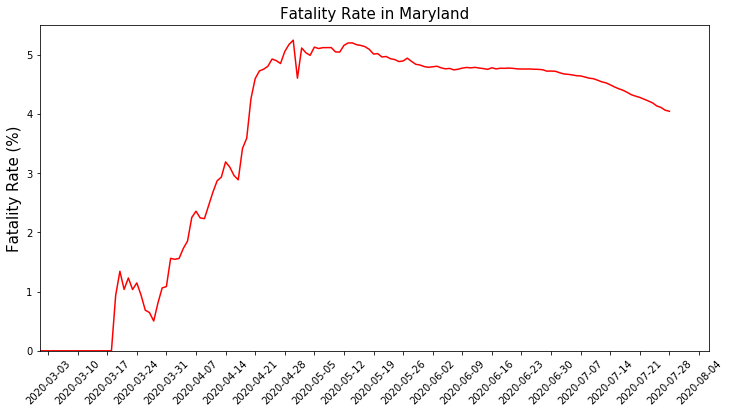

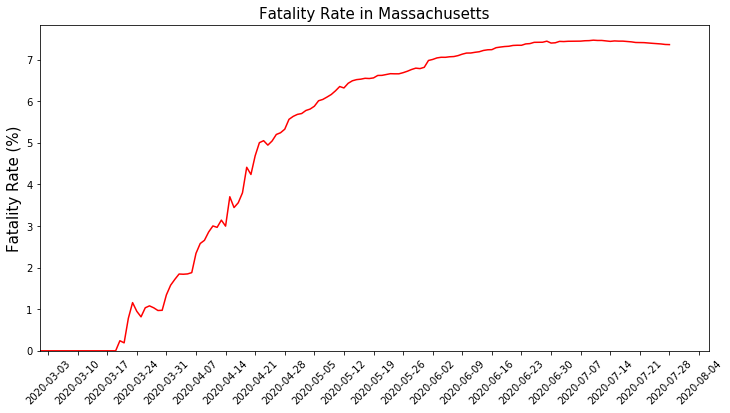

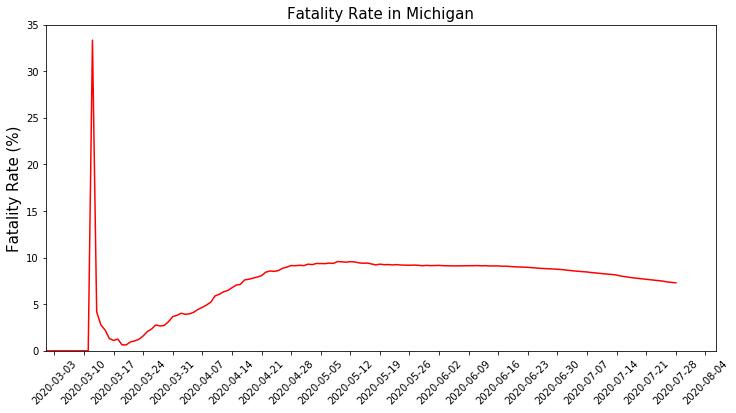

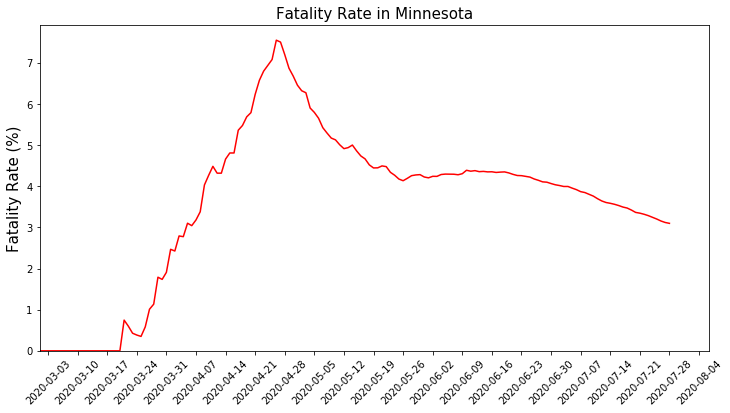

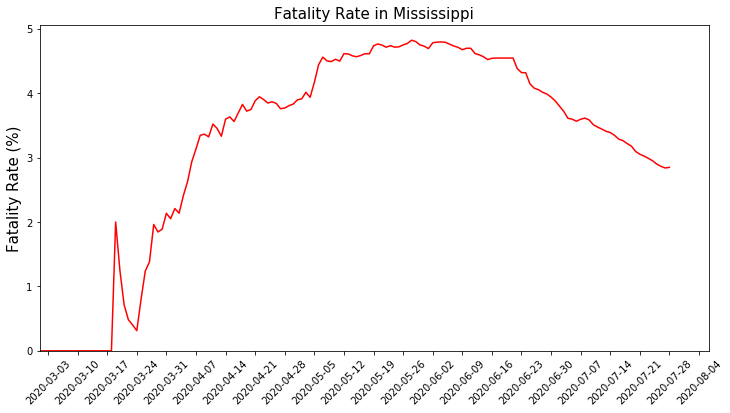

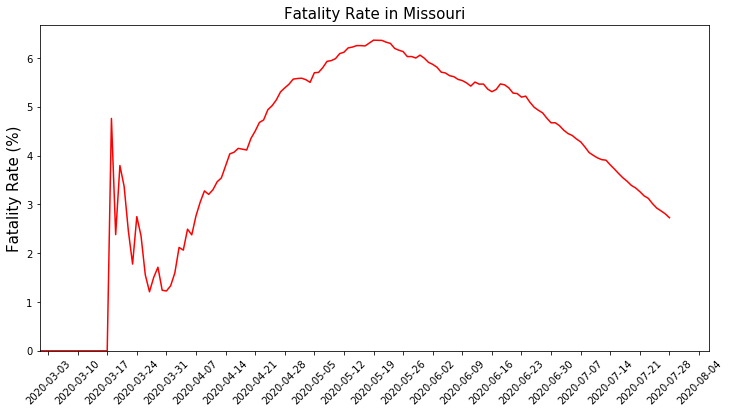

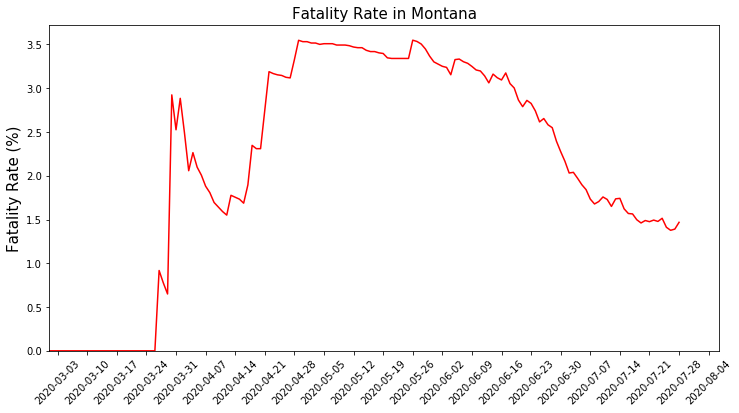

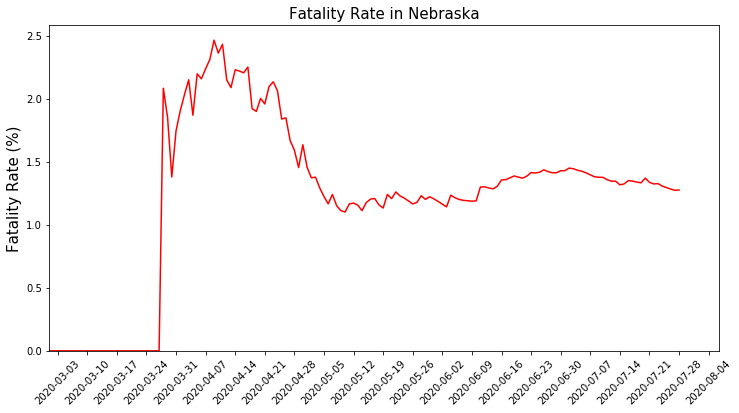

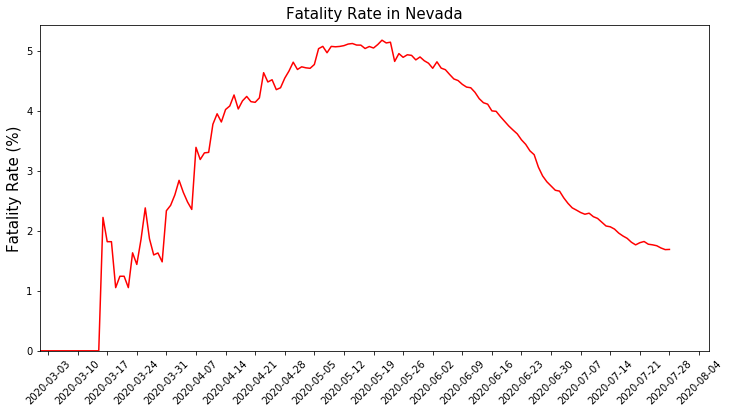

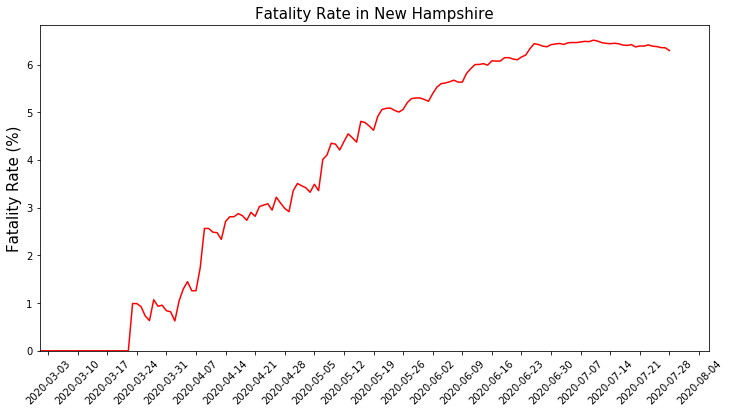

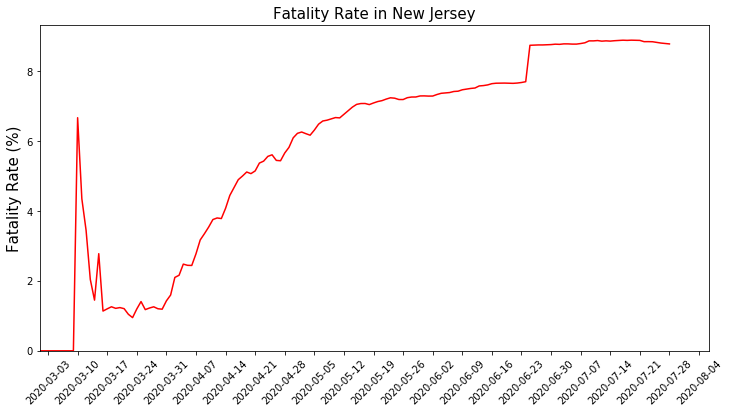

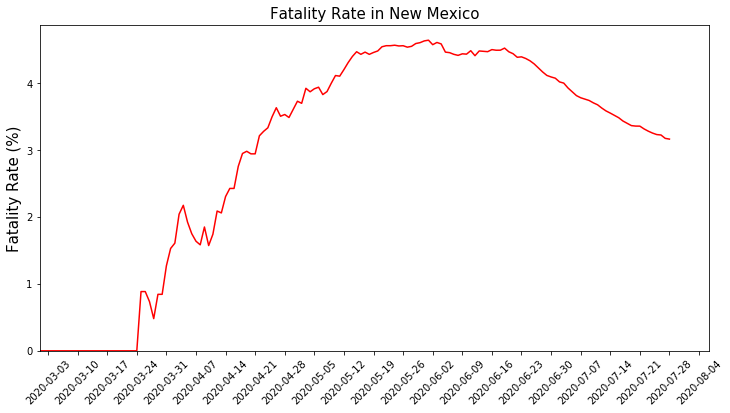

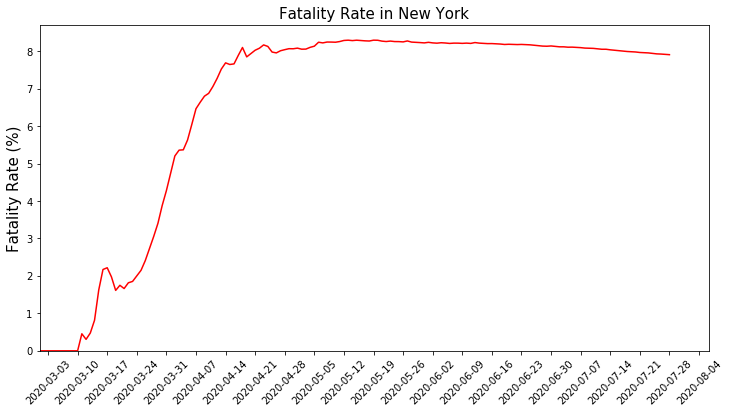

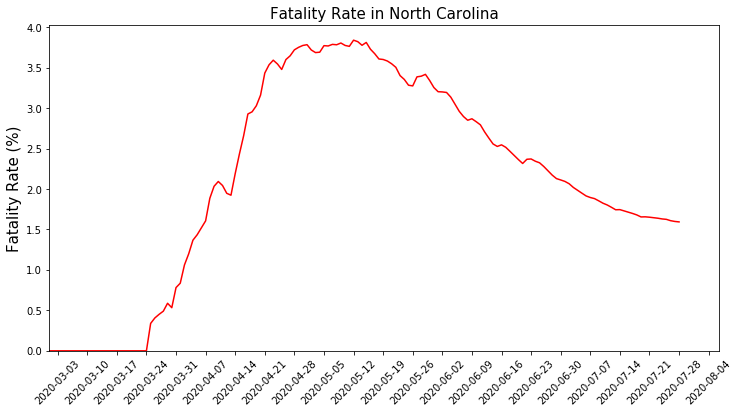

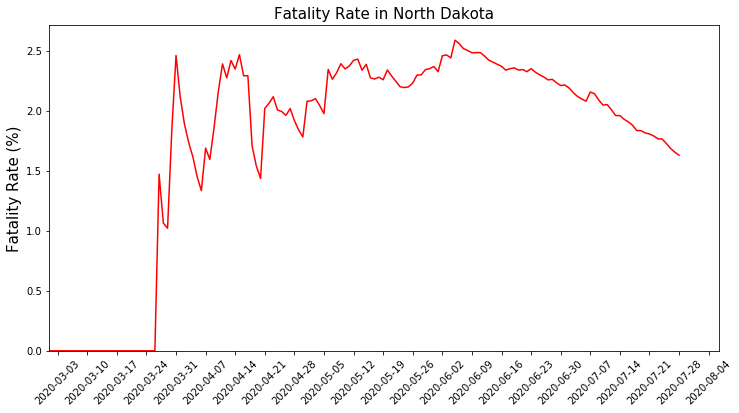

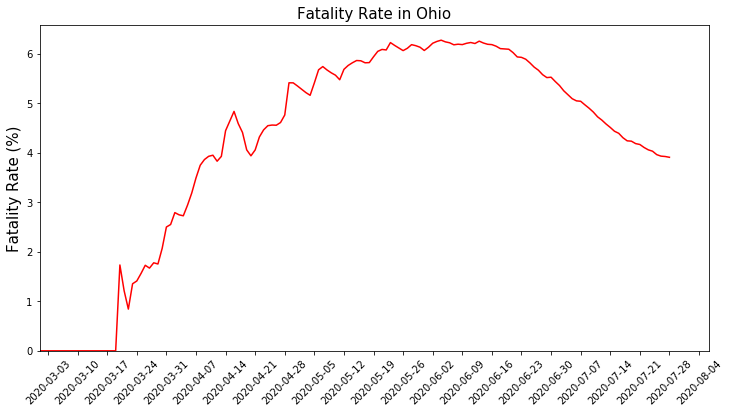

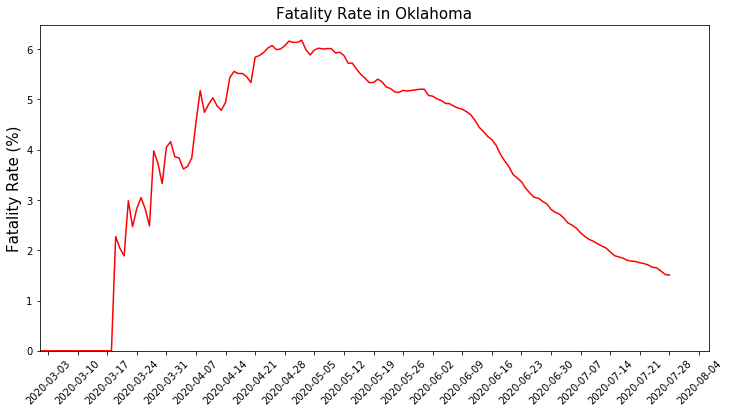

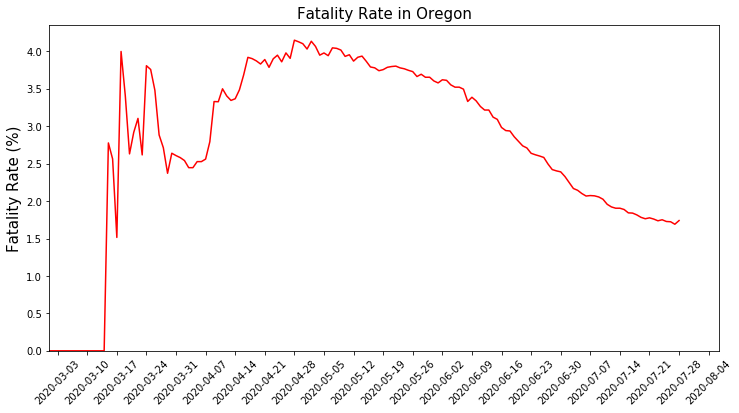

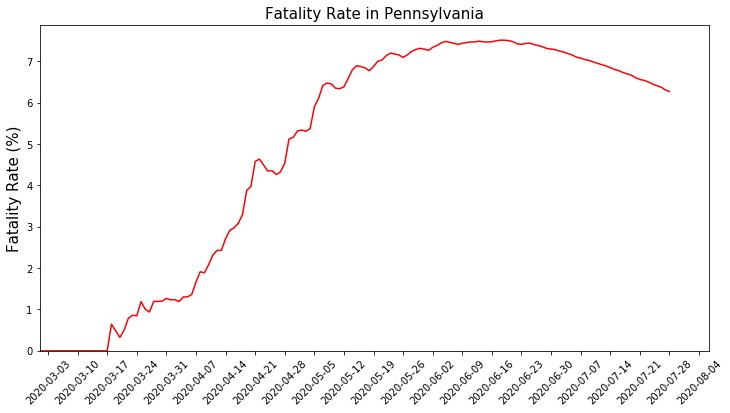

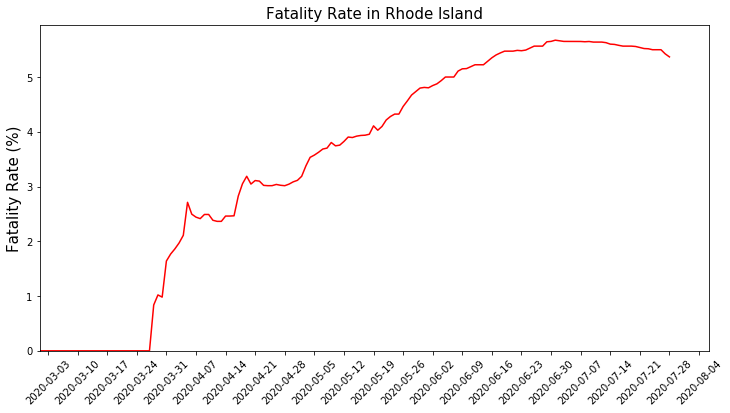

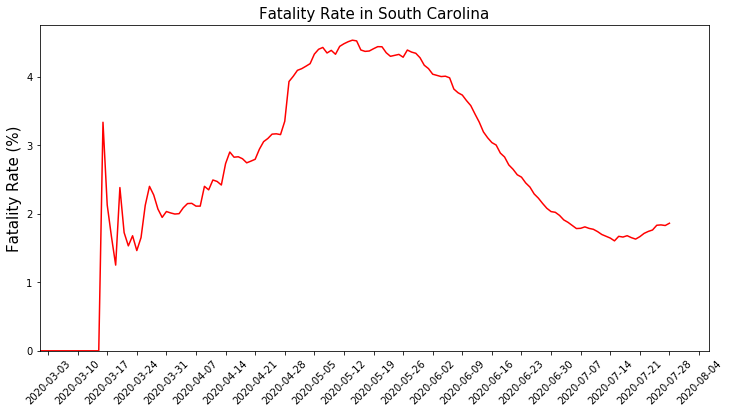

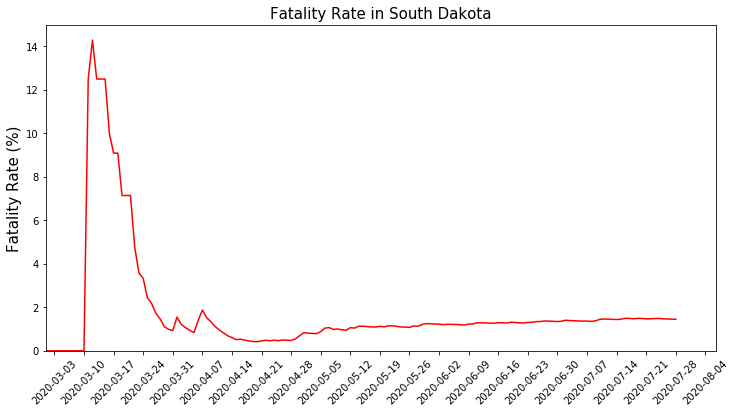

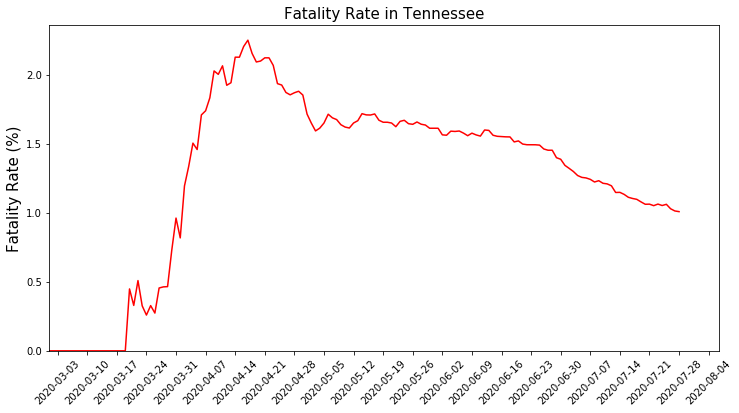

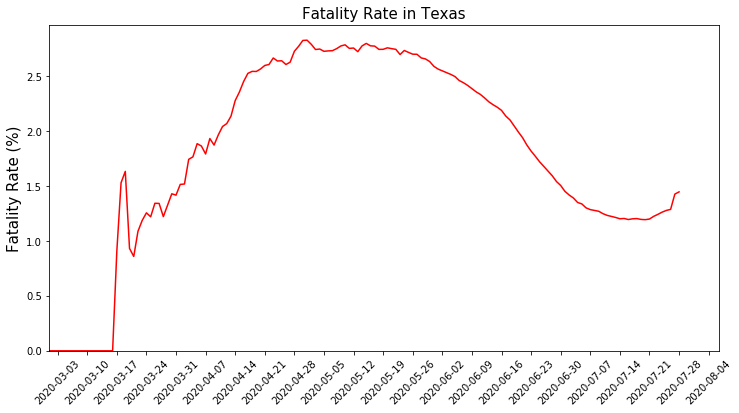

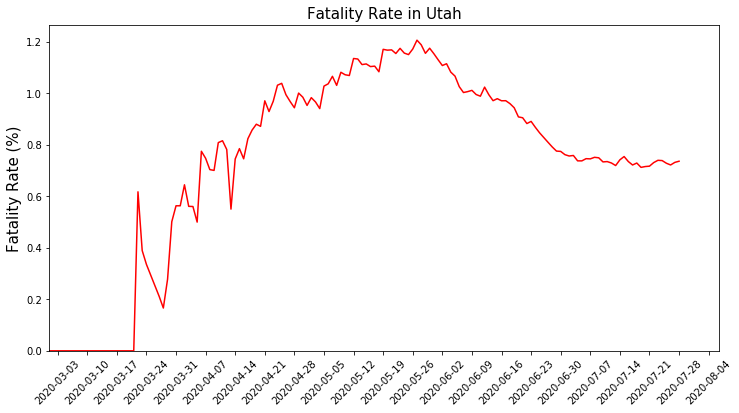

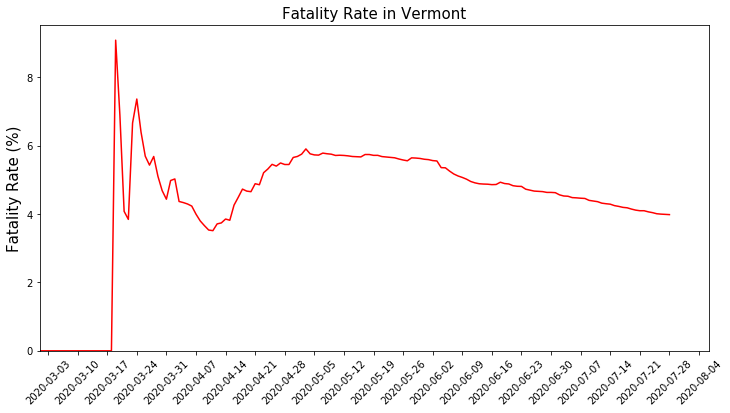

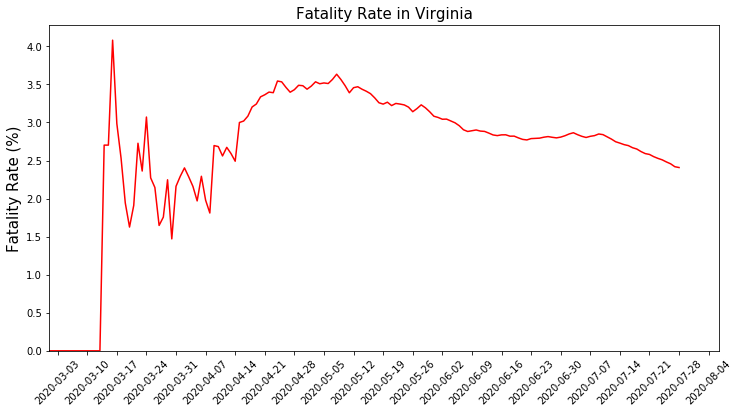

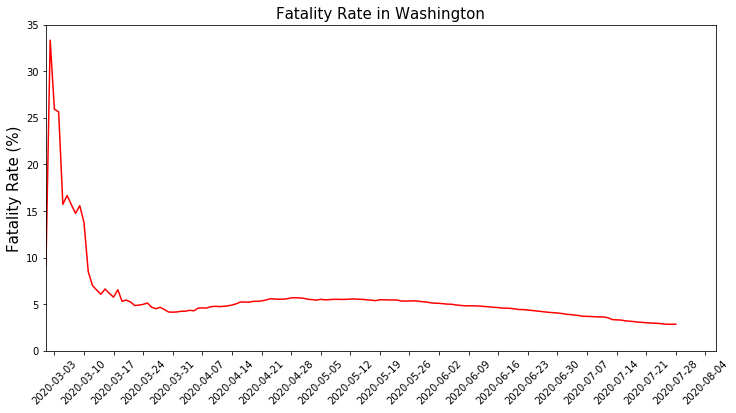

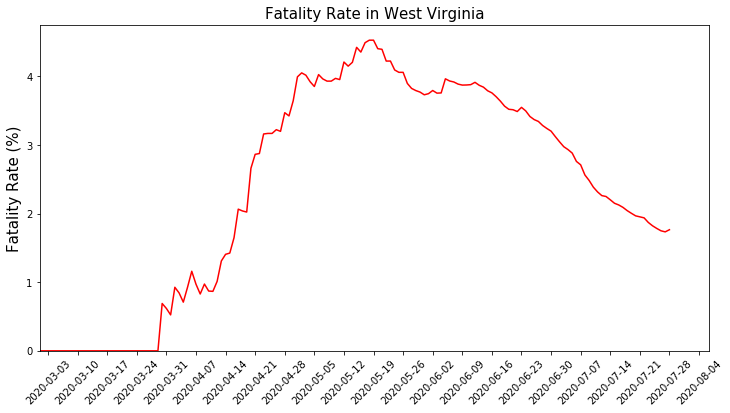

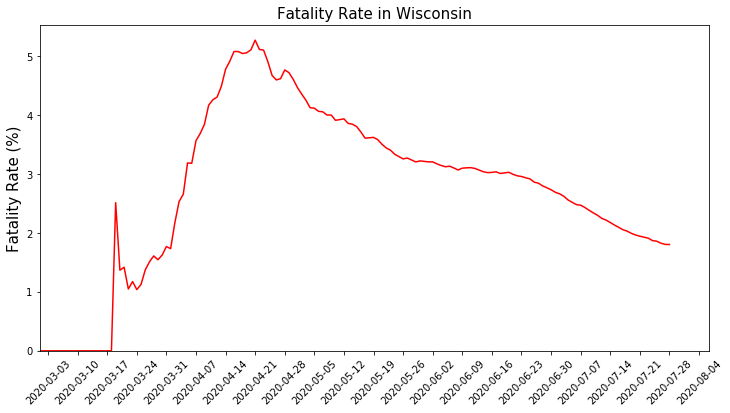

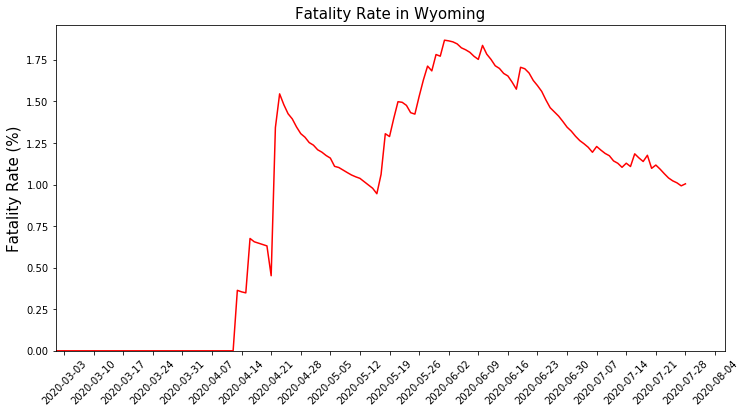

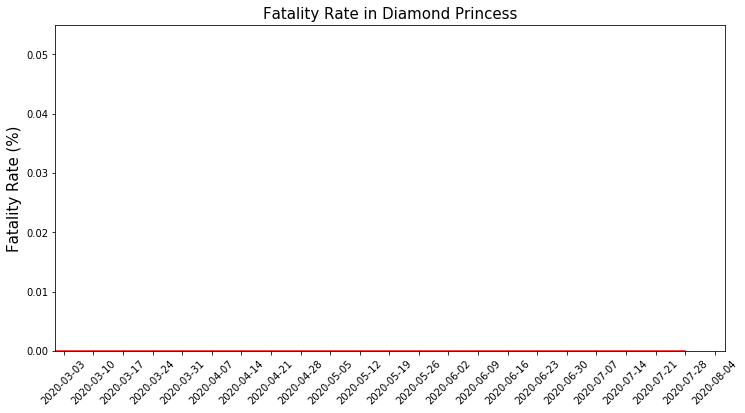

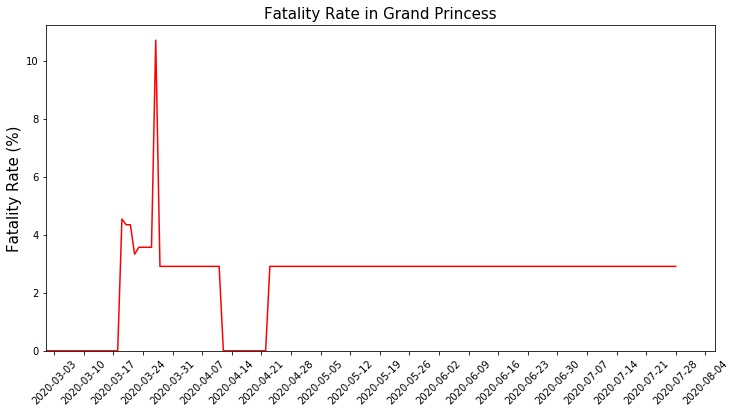

In [10]:
for state in states:
    fig,ax = plt.subplots(figsize = (12,6))
    ax.plot(data['%s' % state]['Date'], data['%s' % state]['Fatality'], 'r-')
    ax.tick_params(axis = 'x',labelrotation = 45)
    ax.set_xlim(datetime.date(2020, 3, 1))
    ax.set_ylim(0)
    ax.set_ylabel('Fatality Rate (%)', fontsize = 15)
    ax.set_title('Fatality Rate in %s' % state, fontsize = 15)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1));